In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os,glob
import seaborn as sns
from open_ephys.analysis import Session

from pynwb import NWBHDF5IO, NWBFile
from pynwb.file import Subject

from datetime import datetime
from dateutil.tz import tzlocal

from jlh_ephys.analysis import Analysis
from jlh_ephys.utils import choose_stim_parameter, OE
from jlh_ephys.psth_raster import psth_arr 
#from jlh_ephys import spatial_tools as st  ## compatability issues maybe need to install from allensdk.core.mouse_connectivity_cache import MouseConnectivityCache in its own env 
from jlh_ephys.raw import find_artifact_start, align_data, raw_heatmap

from ccf_3D.tools import herbs_processing as hp
from ccf_3D.tools.metrics import distance

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

from scipy.ndimage import gaussian_filter1d

In [2]:
jlh31 = Analysis('jlh31', '2023-01-24') # all probes, many params and sites
jlh32 = Analysis('jlh32', '2023-02-18') # all probes, many params and sites
jlh33 = Analysis('jlh33', '2023-02-22') # probe B and C, many params and trains in diff recordings
jlh34 = Analysis('jlh34', '2023-05-15') # all 3 many params
jlh39 = Analysis('jlh39', '2023-08-16') # 3 probes for bi, no A for mono
jlh40 = Analysis('jlh40', '2023-08-21') # probeB and probe C only: monopolar -- with diff pulse width
jlh48 = Analysis('jlh48', '2024-11-05') # bb test, sorted only no bb portion (full bi and mono)
jlh49 = Analysis('jlh49v1', '2024-07-11') # bb test, just no bb portion (full bi only)
jlh53 = Analysis('jlh53concat', '2024-09-03') # regular, all 3 probes, probe A broke sometime. 

recordings = [jlh31, jlh32, jlh33, jlh34, jlh39, jlh40, jlh48, jlh49, jlh53]
slope_path = r"C:\Users\jordan\Documents\combined_figs\single_unit\unit_qual"
for r in recordings:
    r.get_brain_regs()
    r.get_electrode_coords()
    r.get_fs_rs(plot = False)
    slope_npy = glob.glob(os.path.join(slope_path, f'*{r.mouse}*'))[0]
    slope_outliers = np.load(slope_npy)
    r.units['slope_outlier'] = slope_outliers
    r.units['unit_id'] = r.units['probe'] + r.units['unit_id']
    

nn_contacts_labels = [6,11,3,14,1,16,2,15,5,12,4,13,7,10,8,9]

EP_path = r"C:\Users\jordan\Documents\combined_figs\evoked_potentials"

amp_alphas = {5: 0.3, 25: 0.5, 50: 0.7, 100: 1.0}
bipolar_color = '#82A69D'
cathodal_color = '#161943'
anodal_color = '#D99551'


c:\Users\jordan\AppData\Local\anaconda3\Lib\site-packages\hdmf\spec\namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


NWB found. Trials and Units loaded


c:\Users\jordan\AppData\Local\anaconda3\Lib\site-packages\hdmf\spec\namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


NWB found. Trials and Units loaded


c:\Users\jordan\AppData\Local\anaconda3\Lib\site-packages\hdmf\spec\namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


NWB found. Trials and Units loaded


c:\Users\jordan\AppData\Local\anaconda3\Lib\site-packages\hdmf\spec\namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


NWB found. Trials and Units loaded


c:\Users\jordan\AppData\Local\anaconda3\Lib\site-packages\hdmf\spec\namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


NWB found. Trials and Units loaded


c:\Users\jordan\AppData\Local\anaconda3\Lib\site-packages\hdmf\spec\namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


NWB found. Trials and Units loaded


c:\Users\jordan\AppData\Local\anaconda3\Lib\site-packages\hdmf\spec\namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


NWB found. Trials and Units loaded


c:\Users\jordan\AppData\Local\anaconda3\Lib\site-packages\hdmf\spec\namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


NWB found. Trials and Units loaded


c:\Users\jordan\AppData\Local\anaconda3\Lib\site-packages\hdmf\spec\namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
INFO:root:Final adjusted brain regions loaded
INFO:root:Final adjusted coordinates loaded


NWB found. Trials and Units loaded


INFO:root:Final adjusted brain regions loaded
INFO:root:Final adjusted coordinates loaded
INFO:root:Final adjusted brain regions loaded
INFO:root:Final adjusted coordinates loaded
INFO:root:Final adjusted brain regions loaded
INFO:root:Final adjusted coordinates loaded
INFO:root:Final adjusted brain regions loaded
INFO:root:Final adjusted coordinates loaded
INFO:root:Final adjusted brain regions loaded
INFO:root:Final adjusted coordinates loaded
INFO:root:Final adjusted brain regions loaded
INFO:root:Final adjusted coordinates loaded
INFO:root:Final adjusted brain regions loaded
INFO:root:Final adjusted coordinates loaded
INFO:root:Final adjusted brain regions loaded
INFO:root:Final adjusted coordinates loaded


In [3]:
# load in intermediates (if you want to see how they're generated proceed to calculating direct response probabilities)

## main dataframe with probabilities and key single unit information
direct_df = pd.read_csv(r'intermediates\direct_df.csv')
# avert your eyes! nasty code bc i'm too lazy to change how one of my plots works 
# bipolar
bi_direct_df = direct_df.query("polarity == 'bipolar'")

bi_df5   = direct_df.query("polarity == 'bipolar' & amplitude == -5" )
bi_df25  = direct_df.query("polarity == 'bipolar' & amplitude == -25")
bi_df50  = direct_df.query("polarity == 'bipolar' & amplitude == -50")
bi_df100 = direct_df.query("polarity == 'bipolar' & amplitude == -100")

# cathodal
cat_direct_df = direct_df.query("polarity == 'cathodal'")
cat_df5   = direct_df.query("polarity == 'cathodal' & amplitude == -5" )
cat_df25  = direct_df.query("polarity == 'cathodal' & amplitude == -25")
cat_df50  = direct_df.query("polarity == 'cathodal' & amplitude == -50")
cat_df100 = direct_df.query("polarity == 'cathodal' & amplitude == -100")

# anodal
an_direct_df = direct_df.query("polarity == 'anodal'")
an_df5   = direct_df.query("polarity == 'anodal' & amplitude == 5" )
an_df25  = direct_df.query("polarity == 'anodal' & amplitude == 25")
an_df50  = direct_df.query("polarity == 'anodal' & amplitude == 50")
an_df100 = direct_df.query("polarity == 'anodal' & amplitude == 100")



In [4]:
# load in the EP spatial distance data from Figure 2 so we compare single units to evoked potentials 

dfs_list = {
    'cathodal': [cat_df5, cat_df25, cat_df50, cat_df100],
    'anodal': [an_df5, an_df25, an_df50, an_df100],
    'bipolar': [bi_df5, bi_df25, bi_df50, bi_df100]
}

# load the confines:: organized by polarity --> amplitude --> (lower_bound, upper_bound)
#pickle_path = r"C:\Users\jordan\Documents\combined_figs\evoked_potentials\EP_distances.pkl"

import pickle as pkl
with open(r'intermediates\EP_distances.pkl', 'rb') as file:
    EP_distances = pkl.load(file)

confines = {
            'bipolar': 
                        {   '5': (np.mean(EP_distances['bipolar'][-5][0]), np.mean(EP_distances['bipolar'][-5][1])), 
                            '25': (np.mean(EP_distances['bipolar'][-25][0]), np.mean(EP_distances['bipolar'][-25][1])),
                            '50': (np.mean(EP_distances['bipolar'][-50][0]), np.mean(EP_distances['bipolar'][-50][1])),
                            '100': (np.mean(EP_distances['bipolar'][-100][0]), np.mean(EP_distances['bipolar'][-100][1]))
                        },
            'cathodal':
                        {   '5': (np.mean(EP_distances['monopolar'][-5][0]), np.mean(EP_distances['monopolar'][-5][1])),
                            '25': (np.mean(EP_distances['monopolar'][-25][0]), np.mean(EP_distances['monopolar'][-25][1])),
                            '50': (np.mean(EP_distances['monopolar'][-50][0]), np.mean(EP_distances['monopolar'][-50][1])),
                            '100': (np.mean(EP_distances['monopolar'][-100][0]), np.mean(EP_distances['monopolar'][-100][1]))
                        },
            'anodal':
                        {   '5': (np.mean(EP_distances['monopolar'][5][0]), np.mean(EP_distances['monopolar'][5][1])),
                            '25': (np.mean(EP_distances['monopolar'][25][0]), np.mean(EP_distances['monopolar'][25][1])),
                            '50': (np.mean(EP_distances['monopolar'][50][0]), np.mean(EP_distances['monopolar'][50][1])),
                            '100': (np.mean(EP_distances['monopolar'][100][0]), np.mean(EP_distances['monopolar'][100][1]))
                        }
            }
confines_dfs = {'cathodal': [], 'anodal': [], 'bipolar': []}

# loop through the dfs_list and confines to create the subsets
for condition, dfs in dfs_list.items():
    for i, df in enumerate(dfs):
        key = str([5, 25, 50, 100][i])  # get the key for confines
        lower_bound, upper_bound = confines[condition][key]
        confine_df = df[(df['distance'] >= lower_bound) & (df['distance'] <= upper_bound)]
        confines_dfs[condition].append(confine_df)

# calculating direct response probabilities (within 2 ms)

The below sections of code generates dataframe(s) which contains direct response probabilities for single units and key single unit information. These probabilities will be the crux of many analyses and plots generated in Figures 4, 5 and 6. You can load the final dataframe above and do not need to run the below sections (unless you want!). 

In [4]:
## you can convert the below block back to code to run it... (converted to markdown so it doesn't run every time)

### defining some functions
def bin_spikes(units_df, bin_size=60):
    """ Bin spike times into intervals and calculate firing rates for all units over a common time window. """
    # determine the global minimum and maximum spike times across all units 
    all_spike_times = np.concatenate(units_df['spike_times'].values)
    global_min_time = all_spike_times.min()
    global_max_time = all_spike_times.max()

    # create bins based on the global time window
    bins = np.arange(global_min_time, global_max_time + bin_size, bin_size)

    binned_rates = []
    for spike_times in units_df['spike_times']:
        counts, _ = np.histogram(spike_times, bins)
        rates = counts / bin_size  # Firing rate = Counts per second
        binned_rates.append(rates)

    return binned_rates

for r in recordings:
    binned_rates = bin_spikes(r.units, bin_size=60)
    r.units['binned_rates'] = binned_rates
    r.units['mean_rate'] = r.units['binned_rates'].apply(np.mean)
    
    
def spike_probability(spike_times, stim_times, window = 0.002, min_spike_count = 0):
    # find how many spikes occur betwween the first stimulus and the last stimulus) 
    first_stim_time = stim_times[0]
    last_stim_time = stim_times[-1]
    spike_count = np.sum((spike_times >= first_stim_time) & (spike_times <= last_stim_time))
    
    if spike_count > min_spike_count:
        # Count spikes within 3 ms of any stim time
        spike_counts_within_window = sum(
            np.any((spike_times <= stim + window) & (spike_times >= stim)) for stim in stim_times
        )
        spike_counts_baseline = sum(
            np.any((spike_times <= stim - (0.003+window)) & (spike_times > stim - (0.005 + window))) for stim in stim_times
        )
        # Probability is the count of spikes within the window divided by the total number of stimulations
        probability = spike_counts_within_window / len(stim_times)
        probability_baseline = spike_counts_baseline / len(stim_times)
        norm_prob = probability - probability_baseline
        
    else:
        probability = np.nan
        probability_baseline = np.nan
        norm_prob = np.nan
    return probability, probability_baseline, norm_prob

### calculate distances for each contact for each recording
distances = {}
distances_norm = {}

for r in recordings:
    contact = r.trials.contact_negative[0]
    distances[r.mouse] = r.get_dists(contact)
    
    temp_norm_dist = {}
    for probe, dists in r.distances.items():
        # normalize min dist to 0 
        min = np.min(dists)
        dists_norm = dists - min
        
        
        # make prior to crossing point negative and after positive
        cross_index = np.where(dists_norm == 0)[0][0]  # this gives the first index where data is non-positive
        dists_norm[cross_index:] = -np.abs(dists_norm[cross_index:])
        temp_norm_dist[probe] = dists_norm

        dists[cross_index:] = -np.abs(dists[cross_index:])
        r.distances[probe] = dists
    
    distances_norm[r.mouse] = temp_norm_dist
    
###############################################################################
### now we can calculate the probabilties    
probability_dict = {} # keys are col_str (amp_polarity), unit dicts 
counter_string = []
amps = [-5, 5, -25, 25, -50, 50, -100, 100]
polarities = ['bipolar', 'monopolar']


for polarity in polarities:
    for amp in amps:
        col_str = f'{str(amp)}_{polarity}'
        results = []
        
        
        units_counter = 0 
        included_units_counter = 0 

        for r in recordings:
            stim_times = choose_stim_parameter(r.trials, amp = amp, pulse_number = 1, pulse_duration = 100, polarity = polarity)
            if len(stim_times) > 75:
                stim_times = stim_times[0:75]
            probe_list = [k for k in distances_norm[r.mouse].keys()]
            brain_regs = r.brain_regs
            
            good_units = r.units[(r.units.group == 'good') & (r.units.slope_outlier == False)]

            df_list = []
            if 'probeA' in probe_list:
                A_units = good_units.loc[r.units['probe'] == 'A']
                df_list.append(A_units)
            if 'probeB' in probe_list:
                B_units = good_units.loc[r.units['probe'] == 'B']
                df_list.append(B_units)
            if 'probeC' in probe_list:
                C_units = good_units.loc[r.units['probe'] == 'C']
                df_list.append(C_units)
            if len(stim_times) > 75:
                stim_times = stim_times[0:75] 
            if len(stim_times) > 0:
                for probe, df in zip(probe_list, df_list):
                    for id, unit in df.iterrows():
                        spike_times = np.array(unit.spike_times)  
                        ch = unit.ch
                        if ch > len(brain_regs[probe]) -1:
                            ch = len(brain_regs[probe]) - 1
                            print(f'ch: {ch} is out of range for recording {r.mouse} probe {probe}')
                        norm_distance = distances_norm[r.mouse][probe][ch] # reverse_distance[ch]  # Get the distance of the unit from the stim
                        distance = distances[r.mouse][probe][ch] 
                        reg = brain_regs[probe][ch]

                        # Count spikes within 2 ms of any stim time
                        probability, probability_baseline, norm_prob = spike_probability(spike_times, stim_times, window = 0.002)
                        units_counter +=1 
                        if not np.isnan(probability):
                            results.append({'recording': r.mouse, 'unit_id': unit.unit_id,'probe': unit.probe, 'ch': ch,
                                            'distance': distance, 'norm_distance': norm_distance,  'waveform_class': unit.waveform_class,'unit_amplitude': unit.KSamplitude, 
                                            'norm_prob': norm_prob, 'probability': probability, 'region': reg, 'fr': unit.mean_rate})
                            included_units_counter +=1
            
            probability_dict[col_str] = results
        counter_string.append(f'{col_str}: total units: {units_counter} included units = {included_units_counter}.')




### some wrangling of the data to make it easier to work with later on  
def map_region_to_group(region):
    if 'Primary visual area' in region:
        return 'Primary Visual Area'
    elif 'Anterior area' in region:
        return 'Higher Visual Area'
    elif 'Lateral visual area' in region:
        return 'Higher Visual Area'
    elif 'Rostrolateral visual area' in region:
        return 'Higher Visual Area'
    elif 'posteromedial area' in region:
        return 'Higher Visual Area'
    elif 'Anteromedial visual area' in region:
        return 'Higher Visual Area'
    elif 'Retrosplenial' in region:
        return 'Retrosplenial'
    elif 'optic radiation' in region:
        return 'Optic Radiation'
    elif 'corpus' in region:
        return 'Corpus Callosum'
    elif 'Unknown' in region:
        return 'Unknown'
    elif 'area' not in region:
        return 'subcortical' 

cat_df5 = pd.DataFrame(probability_dict['-5_monopolar'])
cat_df25 = pd.DataFrame(probability_dict['-25_monopolar'])
cat_df50 = pd.DataFrame(probability_dict['-50_monopolar'])
cat_df100 = pd.DataFrame(probability_dict['-100_monopolar'])

an_df5 = pd.DataFrame(probability_dict['5_monopolar'])
an_df25 = pd.DataFrame(probability_dict['25_monopolar'])
an_df50 = pd.DataFrame(probability_dict['50_monopolar'])
an_df100 = pd.DataFrame(probability_dict['100_monopolar'])

bi_df5 = pd.DataFrame(probability_dict['-5_bipolar'])
bi_df25 = pd.DataFrame(probability_dict['-25_bipolar'])
bi_df50 = pd.DataFrame(probability_dict['-50_bipolar'])
bi_df100 = pd.DataFrame(probability_dict['-100_bipolar'])


cat_df5['region_group'] = cat_df5['region'].apply(map_region_to_group)
cat_df25['region_group'] = cat_df25['region'].apply(map_region_to_group)
cat_df50['region_group'] = cat_df50['region'].apply(map_region_to_group)
cat_df100['region_group'] = cat_df100['region'].apply(map_region_to_group)

an_df5['region_group'] = an_df5['region'].apply(map_region_to_group)
an_df25['region_group'] = an_df25['region'].apply(map_region_to_group)
an_df50['region_group'] = an_df50['region'].apply(map_region_to_group)
an_df100['region_group'] = an_df100['region'].apply(map_region_to_group)

bi_df5['region_group'] = bi_df5['region'].apply(map_region_to_group)
bi_df25['region_group'] = bi_df25['region'].apply(map_region_to_group)
bi_df50['region_group'] = bi_df50['region'].apply(map_region_to_group)
bi_df100['region_group'] = bi_df100['region'].apply(map_region_to_group)


###################################################################################################
### Calculate proportion of high responders by 'recording' and 'region_group'
proportion_high_responders = cat_df50.groupby(['recording', 'region_group']).apply(
    lambda x: (x['norm_prob'] > 0.10).mean()
).reset_index(name='proportion_high_responders')

######## Calculate mean proportion for each 'recording'
mean_proportion_by_recording = proportion_high_responders.groupby('recording')['proportion_high_responders'].mean()

######## Plotting
mean_proportion_by_recording.plot(kind='bar', figsize=(4, 4))
plt.xlabel('Recording')
plt.ylabel('Mean Proportion of High Responders')
plt.title('Mean Proportion of High Responders by Recording')
plt.xticks(rotation=45) 

###################################################################################################
### Concatenate the dataframes for each polarity and amplitude for simplicity 
bi_direct = [bi_df5, bi_df25, bi_df50, bi_df100]
for df, amp in zip(bi_direct, [-5, -25, -50, -100]):
    df['polarity'] = 'bipolar'
    df['amplitude'] = amp

bi_direct_df = pd.concat(bi_direct)

cat_direct = [cat_df5, cat_df25, cat_df50, cat_df100]
for df, amp in zip(cat_direct, [-5, -25, -50, -100]):
    df['polarity'] = 'cathodal'
    df['amplitude'] = amp

cat_direct_df = pd.concat(cat_direct)

an_direct = [an_df5, an_df25, an_df50, an_df100]
for df, amp in zip(an_direct, [5, 25, 50, 100]):
    df['polarity'] = 'anodal'
    df['amplitude'] = amp

an_direct_df = pd.concat(an_direct)

direct_df = pd.concat([bi_direct_df, cat_direct_df, an_direct_df])

# stacked raster examples (used in Figures 4 and 5)

In [5]:
# for a single recording a stacked raster of all units
import matplotlib.ticker as mticker
def stacked_rasters(units_df, times, window_start=-0.01, window_end=0.02, 
                    color_by = 'brain_reg',
                    marker_size=1, c = 'blue', title = None, save = False, save_path = None):
    fig, ax1 = plt.subplots(figsize=(6, 6))
    #fig.patch.set_facecolor('white')
    #fig.patch.set_edgecolor('white')
    plot_spikes = []
    plot_units = []
    plot_colors = []
    

    if 'ccf_coordinates' in units_df.columns:
        # makes dv column from ccf coordinates (assumes ap, dv, ml structure) )
        units_df['dv'] = units_df['ccf_coordinates'].apply(lambda x: x[1] if isinstance(x, np.ndarray) and x.size > 1 else None)
        
        # for units with the same dv, provides an offset so they don't overlap
        grouped = units_df.groupby('dv')
        fraction_increment = 1 / (grouped['dv'].transform('count'))
        units_df['unique_dv'] = units_df['dv'] + fraction_increment * grouped.cumcount()
        units_df = units_df.sort_values(by = 'unique_dv')
        ccf = True
        ch = False
    else:
        # just uses channels if no DV
        grouped = units_df.groupby('ch')
        fraction_increment = 1 / (grouped['ch'].transform('count'))
        units_df['unique_ch'] = units_df['ch'] + fraction_increment * grouped.cumcount()
        units_df = units_df.sort_values(by = 'unique_ch')
        ch = True
        ccf = False

    brain_regions = units_df['brain_reg'].unique()
    if color_by == 'brain_reg':
        colors = plt.cm.viridis(np.linspace(0, 1, len(brain_regions)))
        color_map = dict(zip(brain_regions, colors))
    elif color_by == 'waveform_class':
        color_map = {
                    'fs': '#E8B820',
                    'rs': '#517383',
                    'axon': 'black',
                    'up': 'gray'
                    }

    # Plotting loop
    for _, unit in units_df.iterrows():
        spikes = np.array(unit['spike_times'])
        
        if ccf: y = unit['unique_dv']
        if ch: y = unit['unique_ch']

        if color_by == 'brain_reg':
            brain_region = unit['brain_reg']
            color = color_map[brain_region]
        elif color_by == 'waveform_class':
            waveform_class = unit['waveform_class'] 
            color = color_map[waveform_class]

        for trigger in times:
            relative_spikes = spikes - trigger
            spikes_in_window = relative_spikes[(relative_spikes >= window_start) & (relative_spikes <= window_end)]
            plot_spikes.extend(spikes_in_window)
            plot_units.extend([y] * len(spikes_in_window))
            plot_colors.extend([color] * len(spikes_in_window))

    ax1.scatter(plot_spikes, plot_units, c=plot_colors, s=marker_size, marker = '|')
    ax1.xaxis.set_major_formatter(
        mticker.FuncFormatter(lambda x, pos: f'{x*1e3:.0f}')  # seconds → ms
                            )
    ax1.set_xlabel('Time (ms)')
    tick_step_ms = 5                  # 5‑ms spacing
    ticks_s = np.arange(window_start*1e3,  # convert window to ms
                        window_end*1e3 + tick_step_ms,
                        tick_step_ms) / 1e3  # back to seconds for the axis
    ax1.set_xticks(ticks_s)
    ax1.set_ylabel('Depth (DV in CCF)')
    ax1.set_title(title)
    ax1.invert_yaxis()
    
    
    # create a secondary y-axis for brain region labels
    ax2 = ax1.twinx()
    ax2.set_ylim(ax1.get_ylim())  # ensure both y-axes have the same scale

    # determine positions for brain region labels
    for brain_region in brain_regions:
        median_dv = units_df[units_df['brain_reg'] == brain_region]['dv'].median()
        ax2.text(window_end + 0.001, median_dv, brain_region, verticalalignment='center', fontsize = 4)

    ax2.set_yticks([])  # Hide the y-ticks on the secondary axis
    
    plt.tight_layout()
    if save == True:
        plt.savefig(save_path+'.pdf', format='pdf', bbox_inches='tight', facecolor=fig.get_facecolor())
        #plt.savefig(save_path+'.png', format='png', bbox_inches='tight', facecolor=fig.get_facecolor())
    #plt.close()

# just a little specific tool for looping through and saving out stacked rasters for multiple conditions 
def create_mouse_save_path(base_dir, mouse, probe, polarity, amp, save_str, post):
    window = int(post*1000)
    save_dir = os.path.join(base_dir, mouse, f'probe{probe}', polarity, f'{str(amp)}ua,' f'{str(window)}ms_window')
    os.makedirs(save_dir, exist_ok=True)
    save_path = os.path.join(save_dir, f'{mouse}_probe{probe}_{save_str}_stacked_raster_{polarity}_amp{amp}_{window}ms')
    return save_path


    

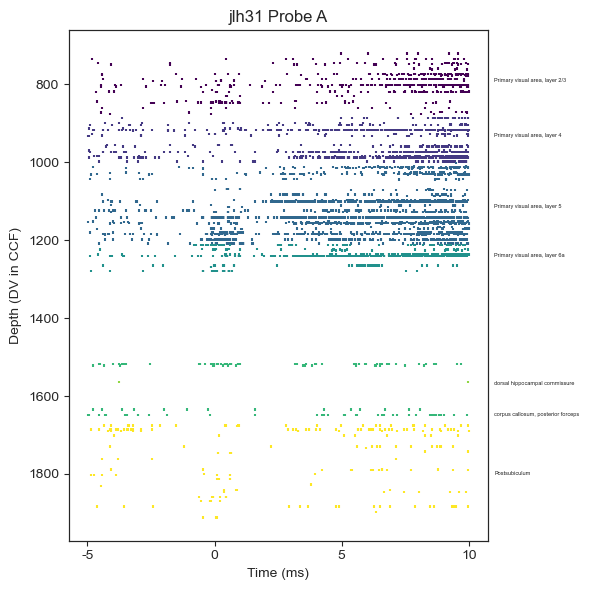

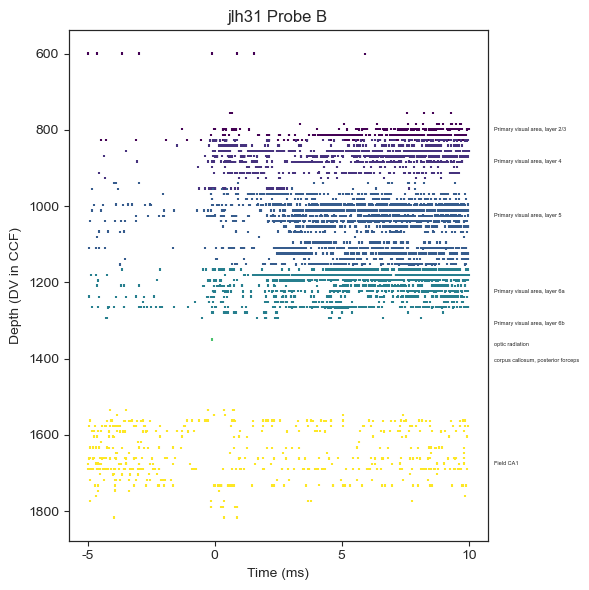

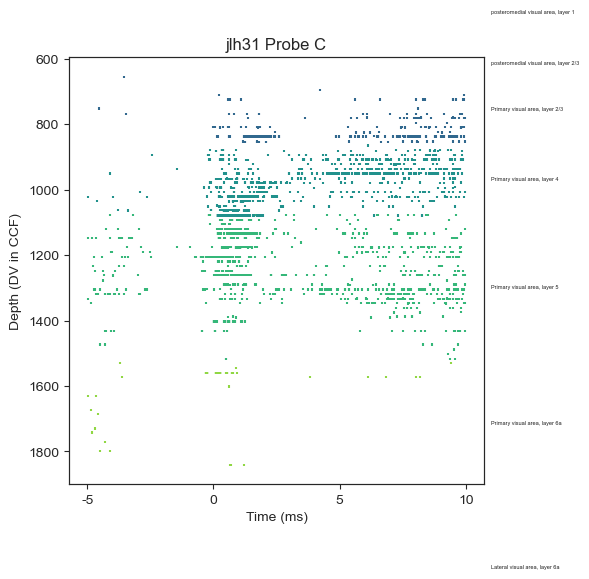

In [6]:
pre = -0.005 # 5 ms 
post = 0.01 # 10 ms

r = jlh31 # example 

units_A = r.units[(r.units.probe == 'A')].copy()
units_B = r.units[(r.units.probe == 'B')].copy()
units_C = r.units[(r.units.probe == 'C')].copy()

stim_times = choose_stim_parameter(r.trials, amp = -100, polarity = 'monopolar')

stacked_rasters(units_A, stim_times, window_start=pre, window_end=post, marker_size=3, 
                                        title= r.mouse + ' Probe A', save=False)

stacked_rasters(units_B, stim_times, window_start=pre, window_end=post, marker_size=3, 
                                        title= r.mouse + ' Probe B', save=False)
stacked_rasters(units_C, stim_times, window_start=pre, window_end=post, marker_size=3, 
                                        title= r.mouse + ' Probe C', save=False)

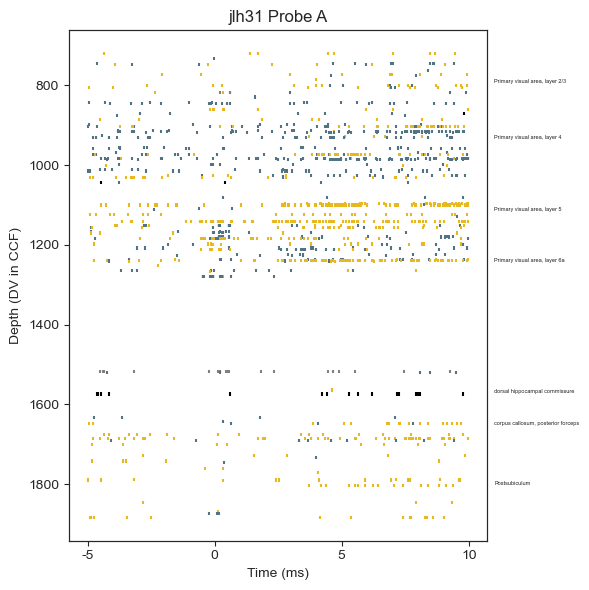

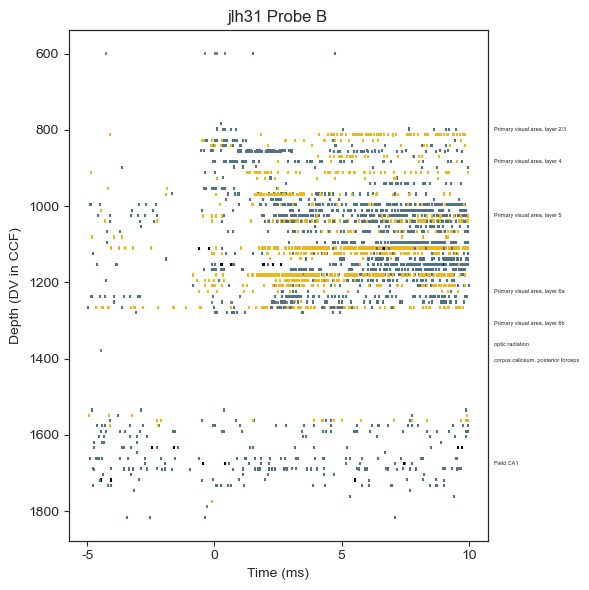

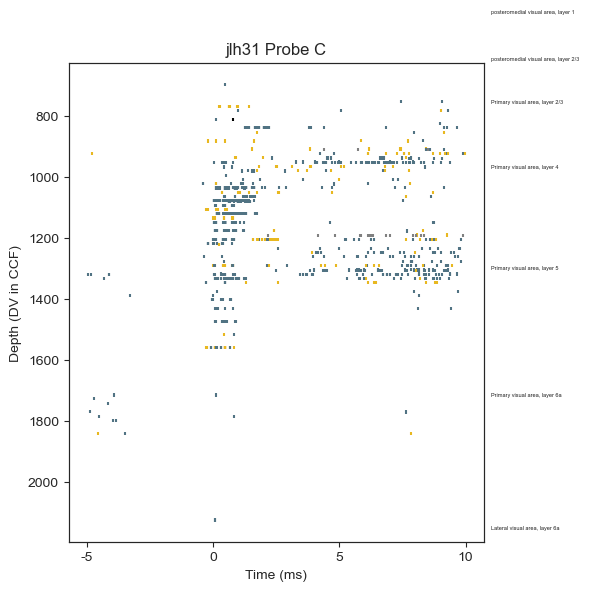

In [7]:
pre = -0.005 # 5 ms 
post = 0.01 # 10 ms

r = jlh31 # example 

units_A = r.units[(r.units.probe == 'A')].copy()
units_B = r.units[(r.units.probe == 'B')].copy()
units_C = r.units[(r.units.probe == 'C')].copy()

stim_times = choose_stim_parameter(r.trials, amp = -50, polarity = 'monopolar')[0:75]

stacked_rasters(units_A, stim_times, window_start=pre, window_end=post, 
                color_by = 'waveform_class', 
                marker_size=5, title= r.mouse + ' Probe A', save=False)

stacked_rasters(units_B, stim_times, window_start=pre, window_end=post, 
                color_by = 'waveform_class',
                marker_size=5, 
                title= r.mouse + ' Probe B', save=False)
stacked_rasters(units_C, stim_times, window_start=pre, window_end=post, 
                color_by = 'waveform_class',
                marker_size=5, 
                title= r.mouse + ' Probe C', save=False)

In [8]:
def stacked_rasters_combined(combined_df, recordings, params, window_start=-0.01, window_end=0.02, 
                             color_by = 'brain_reg',
                             marker_size=0.2, title = None, save = None, 
                             save_path = None):
    
    fig, ax1 = plt.subplots(figsize=(6, 6))
    fig.patch.set_facecolor('white')
    fig.patch.set_edgecolor('white')
    
    plot_spikes = []
    plot_units = []
    plot_colors = []

    # Create a color map for brain regions

    
    combined_df['dv'] = combined_df['ccf_coordinates'].apply(lambda x: x[1] if isinstance(x, np.ndarray) and x.size > 1 else None)
    grouped = combined_df.groupby('dv')
    fraction_increment = 1 / (grouped['dv'].transform('count'))
    combined_df['unique_dv'] = combined_df['dv'] + fraction_increment * grouped.cumcount()
    combined_df = combined_df.sort_values(by = 'unique_dv')

    brain_regions = combined_df['brain_reg'].unique()
    if color_by == 'brain_reg':
        colors = plt.cm.viridis(np.linspace(0, 1, len(brain_regions)))
        color_map = dict(zip(brain_regions, colors))
    elif color_by == 'waveform_class':
        color_map = {
                    'fs': '#E8B820',
                    'rs': '#517383',
                    'axon': 'black',
                    'up': 'gray'
                    }
    # Plotting loop
    for r in recordings:
        units_df = combined_df.loc[combined_df.recording == r.mouse]
        times = choose_stim_parameter(r.trials, amp = params['amp'], pulse_number = params['pulse_number'], pulse_duration = params['pulse_duration'], polarity = params['polarity'])
        for _, unit in units_df.iterrows():
            spikes = np.array(unit['spike_times'])
            dv = unit['unique_dv']
            brain_region = unit['brain_reg']
            if color_by == 'brain_reg':
                color = color_map[brain_region]
            else:
                color = color_map[unit['waveform_class']]
            for trigger in times:
                relative_spikes = spikes - trigger
                spikes_in_window = relative_spikes[(relative_spikes >= window_start) & (relative_spikes <= window_end)]
                plot_spikes.extend(spikes_in_window)
                plot_units.extend([dv] * len(spikes_in_window))
                plot_colors.extend([color] * len(spikes_in_window))

    ax1.scatter(plot_spikes, plot_units, c=plot_colors, s=marker_size, marker = '|')
    ax1.set_xlabel('Time (s)')
    ax1.scatter(plot_spikes, plot_units, c=plot_colors, s=marker_size, marker = '|')
    ax1.xaxis.set_major_formatter(
        mticker.FuncFormatter(lambda x, pos: f'{x*1e3:.0f}')  # seconds → ms
                            )
    ax1.set_xlabel('Time (ms)')
    tick_step_ms = 5                  # 5‑ms spacing
    ticks_s = np.arange(window_start*1e3,  # convert window to ms
                        window_end*1e3 + tick_step_ms,
                        tick_step_ms) / 1e3  # back to seconds for the axis
    ax1.set_xticks(ticks_s)
    
    ax1.set_ylabel('Depth (DV in CCF)')
    
    
    ax1.set_title(title)
    ax1.invert_yaxis()
    # Create a secondary y-axis for brain region labels
    ax2 = ax1.twinx()
    ax2.set_ylim(ax1.get_ylim())  # Ensure both y-axes have the same scale

    # Determine positions for brain region labels
    for brain_region in brain_regions:
        median_dv = combined_df[combined_df['brain_reg'] == brain_region]['dv'].median()
        ax2.text(window_end + 0.001, median_dv, brain_region, 
                 verticalalignment='center', color = 'gray',
                 fontsize = 4) #color_map[brain_region])

    ax2.set_yticks([])  # Hide the y-ticks on the secondary axis
    plt.tight_layout()
    if save == True:
        plt.savefig(save_path+'.pdf')
        plt.savefig(save_path+'.png')

C:\Users\jordan\AppData\Local\Temp\ipykernel_162228\1777398015.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df['dv'] = combined_df['ccf_coordinates'].apply(lambda x: x[1] if isinstance(x, np.ndarray) and x.size > 1 else None)
C:\Users\jordan\AppData\Local\Temp\ipykernel_162228\1777398015.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df['unique_dv'] = combined_df['dv'] + fraction_increment * grouped.cumcount()


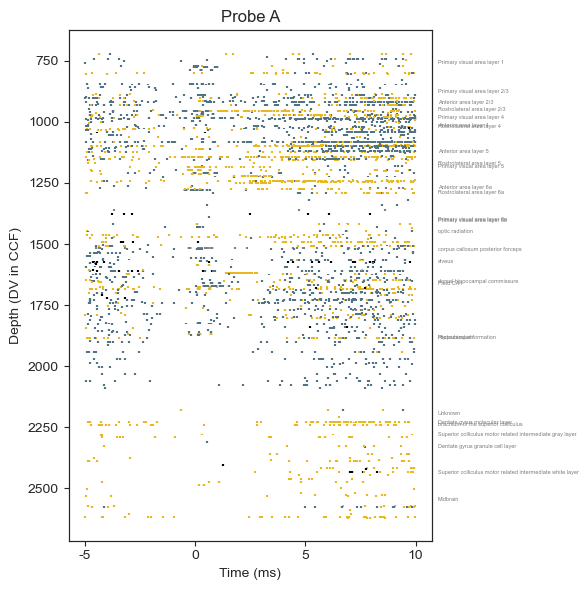

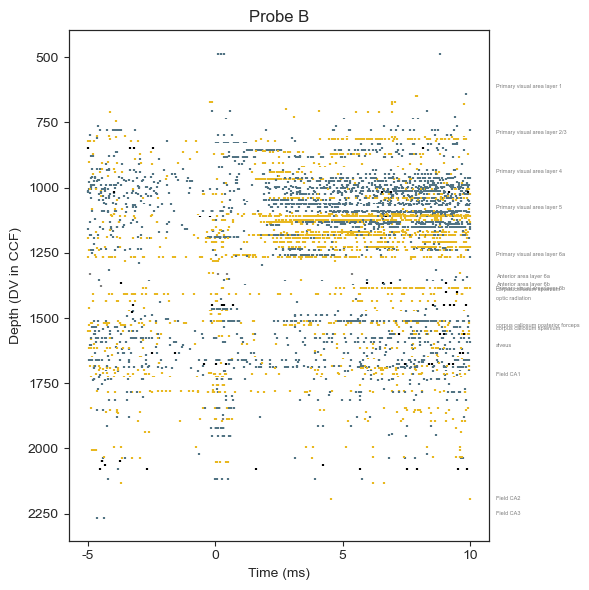

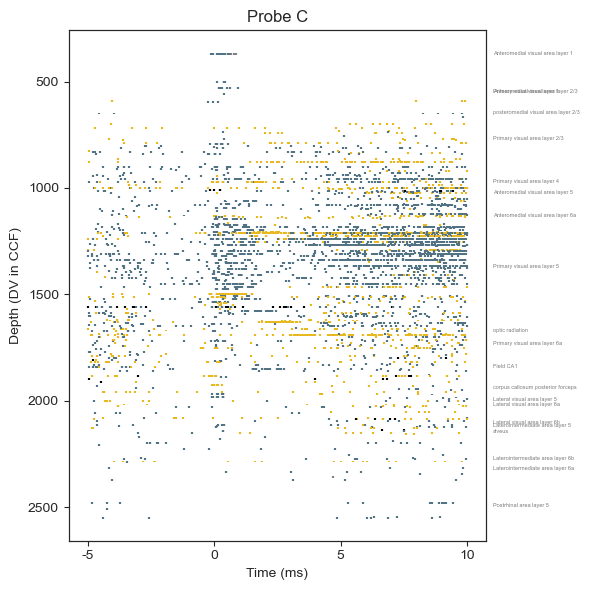

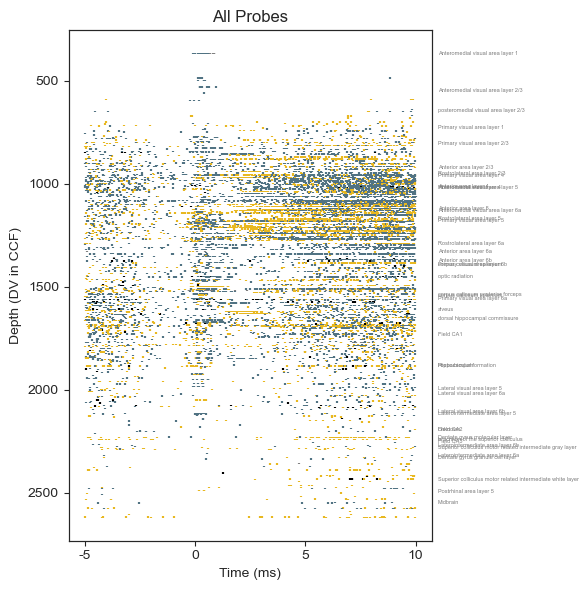

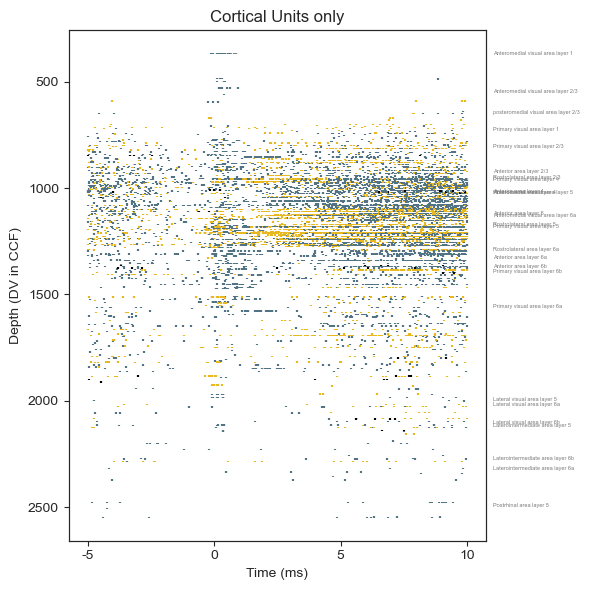

In [9]:
for r in recordings:
    r.units['recording'] = r.mouse

concat_units = pd.concat([r.units for r in recordings]).reset_index()
concat_units['brain_reg'] = concat_units['brain_reg'].str.replace(',', '')


concat_units_A = concat_units.loc[concat_units.probe == 'A'].loc[concat_units.group == 'good'].copy()
concat_units_B = concat_units.loc[concat_units.probe == 'B'].loc[concat_units.group == 'good'].copy()
concat_units_C = concat_units.loc[concat_units.probe == 'C'].loc[concat_units.group == 'good'].copy()
concat_units_good = concat_units.loc[concat_units.group == 'good'].copy()

mask = concat_units_good['brain_reg'].str.contains('area', case=False, na=False)
concat_units_cortical = concat_units_good.loc[mask]

amp = -50
polarity = 'monopolar'

params = {'amp': amp, 'pulse_number': 1, 'pulse_duration': 100, 'polarity': polarity}

stacked_rasters_folder = r"C:\Users\jordan\Documents\combined_figs\single_units\stacked_rasters\waveform_class"
os.makedirs(stacked_rasters_folder, exist_ok=True)
stacked_rasters_combined(concat_units_A, recordings, params, window_start=pre, window_end=post, 
                        color_by = 'waveform_class', 
                        marker_size= 2, 
                        title='Probe A', save=False,
                        save_path = os.path.join(stacked_rasters_folder, 
                                                 f'allrecordings_probeA_{polarity}_{amp}ua_{int(post*1000)}ms_window'))

stacked_rasters_combined(concat_units_B, recordings, params, window_start=pre, window_end=post,
                        color_by = 'waveform_class', 
                        marker_size= 2, 
                        title='Probe B', save=False,
                        save_path = os.path.join(stacked_rasters_folder,
                                                 f'allrecordings_probeB_{polarity}_{amp}ua_{int(post*1000)}ms_window'))
stacked_rasters_combined(concat_units_C, recordings, params, window_start=pre, window_end=post,
                        color_by = 'waveform_class',
                        marker_size= 2, 
                        title='Probe C', save=False,
                        save_path = os.path.join(stacked_rasters_folder,
                                                 f'allrecordings_probeC_{polarity}_{amp}ua_{int(post*1000)}ms_window'))

stacked_rasters_combined(concat_units_good, recordings, params, window_start=pre, window_end=post,
                        color_by = 'waveform_class',
                        marker_size = 1, 
                        title='All Probes', save=False,
                        save_path = os.path.join(stacked_rasters_folder,
                                                 f'allrecordings_allprobes_{polarity}_{amp}ua_{int(post*1000)}ms_window'))

stacked_rasters_combined(concat_units_cortical, recordings, params, window_start=pre, window_end=post,
                        color_by = 'waveform_class',
                        marker_size = 1,
                        title='Cortical Units only', save=False,
                        save_path = os.path.join(stacked_rasters_folder,
                                                 f'allrecordings_cortical_{polarity}_{amp}ua_{int(post*1000)}ms_window'))


# example single unit rasters (used in Figures 4, 5 and 6)

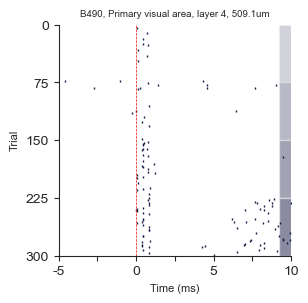

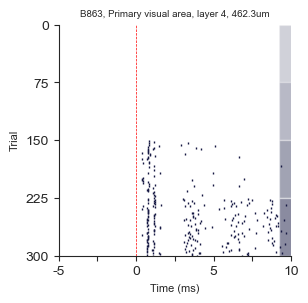

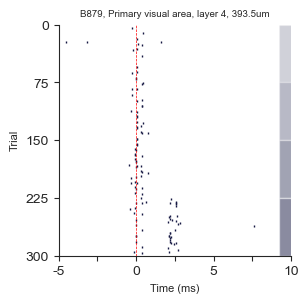

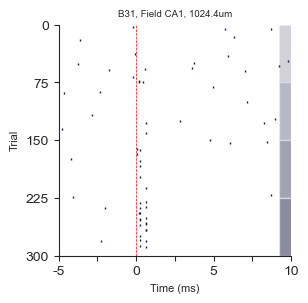

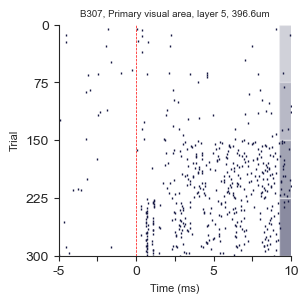

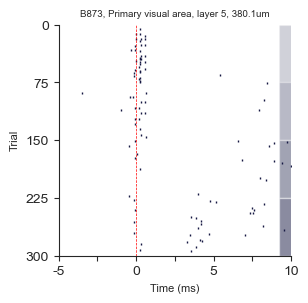

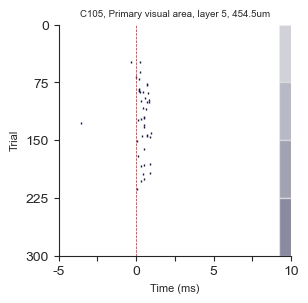

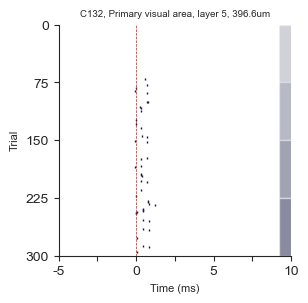

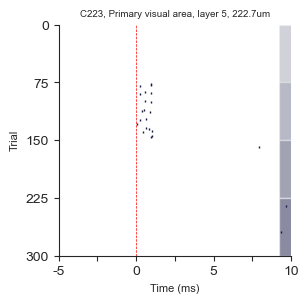

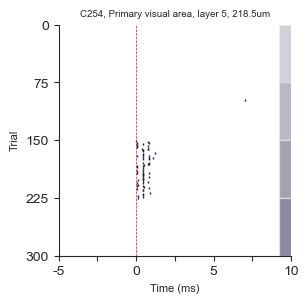

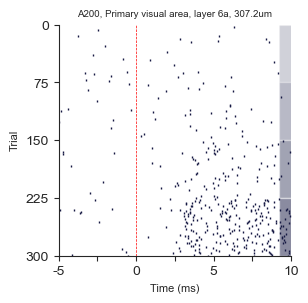

In [10]:
from jlh_ephys.plotter import raster

pre = 0.005
post = 0.01

r = jlh31
for unit_id in ['B490', "B863", "B879", "B31", "B307", "B873", "C105", "C132", "C223", "C254", "A200"]:
    
    # unit details 
    unit_row = r.units[r.units.unit_id == unit_id]
    spike_times = unit_row.spike_times.values[0]
    unit_ccf = unit_row.ccf_coordinates.values[0]
    unit_brain_reg = unit_row.brain_reg.values[0]
    
    
    stim_times_5 = choose_stim_parameter(r.trials, amp = -5, pulse_duration = 100, polarity = 'monopolar')
    stim_times_25 = choose_stim_parameter(r.trials, amp = -25, pulse_duration = 100, polarity = 'monopolar')[0:75]
    stim_times_50 = choose_stim_parameter(r.trials, amp = -50, pulse_duration = 100, polarity = 'monopolar')[0:75]
    stim_times_100 = choose_stim_parameter(r.trials, amp = -100, pulse_duration = 100, polarity = 'monopolar')[0:75]
    #buffer = np.zeros(10)

    stim_times = np.concatenate([stim_times_5, stim_times_25, stim_times_50, stim_times_100])
    stim_contact_ccf = r.trials.contact_negative_coords.values[0]
    
    
    distance_from_stim = np.linalg.norm(unit_ccf - stim_contact_ccf) # distance in microns
    
    fig, ax = plt.subplots(figsize = (3,3))
    raster(spike_times, stim_times, pre = pre, post = post, 
        color = cathodal_color, linewidth = 0.6, labelsize = 8, 
        axis_labelsize = 10, marker = '|', marker_size = 2,
        axes = ax)

    
    #xlabels = [-5, 0, 5, 10]#np.round(np.linspace(-pre, post, 5) * 1000, 1)
    #xlabels = xlabels.astype(int)
    #ax.set_xticklabels(xlabels)
    
    num_trials  = len(stim_times)
    chunk_size  = 75                 # change if you ever use a different batch size
    base_alpha  = 0.2               # starting transparency
    alpha_step  = 0.1               # how much darker each block gets
    
    ax.set_xticks(np.linspace(-pre, post, 7), ['-5', '', '0', '', '5', '', '10'])

    for i, start in enumerate(range(0, num_trials, chunk_size)):
        end   = start + chunk_size
        shade = base_alpha + i * alpha_step
        ax.axhspan(start,   # a little padding so the band lines up
                end,
                xmin = 0.95,
                xmax = 1.1,
                facecolor=cathodal_color,
                alpha=shade,
                zorder=0)     
    
    ax.set_title(f'{unit_id}, {unit_brain_reg}, {distance_from_stim:.1f}um', fontsize = 7)
    ax.set_yticks([0, 75, 150, 225, 300])
    save_folder = r"C:\Users\jordan\Documents\combined_figs\single_unit\selected_rasters\jlh31"
    if not os.path.exists(save_folder):
        os.makedirs(save_folder)
    #fig.savefig(os.path.join(save_folder, f'{unit_id}_cathodal_raster.pdf'))
    #fig.savefig(os.path.join(save_folder, f'{unit_id}_cathodal_raster.png'))

These are the multiple unique cathodal [16 10]
Returning the first one: 16
These are the multiple unique cathodal [16 10]
Returning the first one: 16
These are the multiple unique cathodal [16 10]
Returning the first one: 16
These are the multiple unique cathodal [16 10]
Returning the first one: 16
These are the multiple unique cathodal [16 10]
Returning the first one: 16
These are the multiple unique cathodal [16 10]
Returning the first one: 16
These are the multiple unique cathodal [16 10]
Returning the first one: 16
These are the multiple unique cathodal [16 10]
Returning the first one: 16
These are the multiple unique cathodal [16 10]
Returning the first one: 16
These are the multiple unique cathodal [16 10]
Returning the first one: 16
These are the multiple unique cathodal [16 10]
Returning the first one: 16
These are the multiple unique cathodal [16 10]
Returning the first one: 16
These are the multiple unique cathodal [16 10]
Returning the first one: 16
These are the multiple un

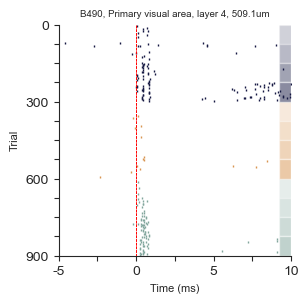

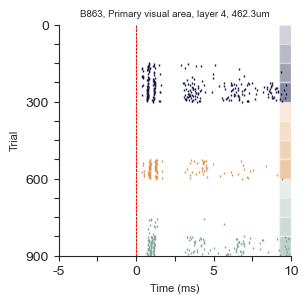

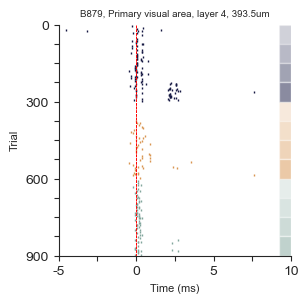

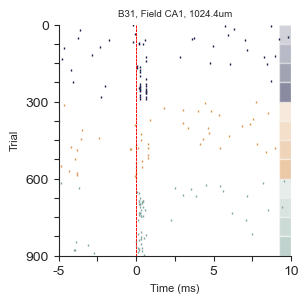

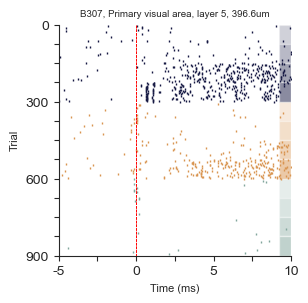

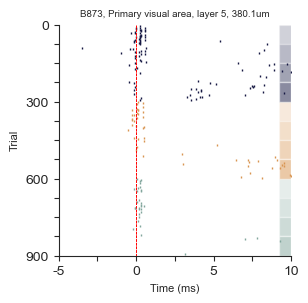

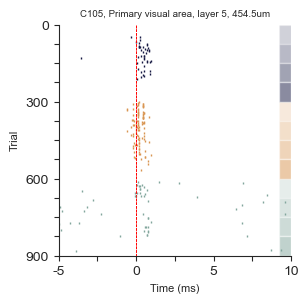

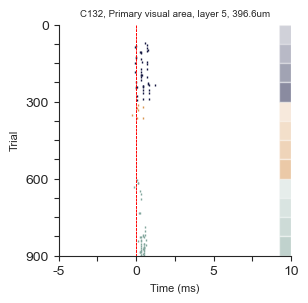

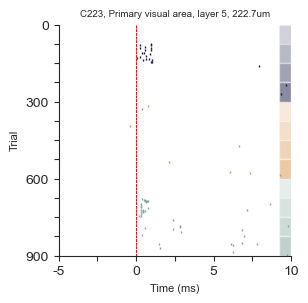

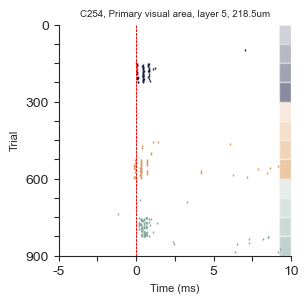

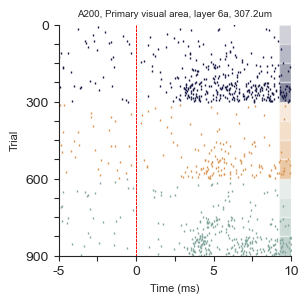

In [11]:
r = jlh31
for unit_id in ['B490', "B863", "B879", "B31", "B307", "B873", "C105", "C132", "C223", "C254", "A200"]:
    
    # unit details 
    unit_row = r.units[r.units.unit_id == unit_id]
    spike_times = unit_row.spike_times.values[0]
    unit_ccf = unit_row.ccf_coordinates.values[0]
    unit_brain_reg = unit_row.brain_reg.values[0]
    
    
    stim_times_5c = choose_stim_parameter(r.trials, amp = -5, pulse_duration = 100, polarity = 'monopolar')[0:75]
    stim_times_25c = choose_stim_parameter(r.trials, amp = -25, pulse_duration = 100, polarity = 'monopolar')[0:75]
    stim_times_50c = choose_stim_parameter(r.trials, amp = -50, pulse_duration = 100, polarity = 'monopolar')[0:75]
    stim_times_100c = choose_stim_parameter(r.trials, amp = -100, pulse_duration = 100, polarity = 'monopolar')[0:75]


    stim_times_5a = choose_stim_parameter(r.trials, amp = 5, pulse_duration = 100, polarity = 'monopolar')[0:75]
    stim_times_25a = choose_stim_parameter(r.trials, amp = 25, pulse_duration = 100, polarity = 'monopolar')[0:75]
    stim_times_50a = choose_stim_parameter(r.trials, amp = 50, pulse_duration = 100, polarity = 'monopolar')[0:75]
    stim_times_100a = choose_stim_parameter(r.trials, amp = 100, pulse_duration = 100, polarity = 'monopolar')[0:75]
    
    stim_times_5b = choose_stim_parameter(r.trials, amp = -5, pulse_duration = 100, polarity = 'bipolar')[0:75]
    stim_times_25b = choose_stim_parameter(r.trials, amp = -25, pulse_duration = 100, polarity = 'bipolar')[0:75]
    stim_times_50b = choose_stim_parameter(r.trials, amp = -50, pulse_duration = 100, polarity = 'bipolar')[0:75]
    stim_times_100b = choose_stim_parameter(r.trials, amp = -100, pulse_duration = 100, polarity = 'bipolar')[0:75]

    buffer = np.zeros(75*4)

    stim_timesc = np.concatenate([stim_times_5c, stim_times_25c, stim_times_50c, stim_times_100c, buffer, buffer])
    stim_timesa = np.concatenate([buffer, stim_times_5a, stim_times_25a, stim_times_50a, stim_times_100a, buffer])
    stim_timesb = np.concatenate([buffer, buffer, stim_times_5b, stim_times_25b, stim_times_50b, stim_times_100b])
    
    stim_contact_ccf = r.trials.contact_negative_coords.values[0]
    
    
    distance_from_stim = np.linalg.norm(unit_ccf - stim_contact_ccf) # distance in microns
    
    fig, ax = plt.subplots(figsize = (3,3))
    
    # raster for cathodal
    raster(spike_times, stim_timesc, pre = pre, post = post, 
        color = cathodal_color, linewidth = 0.6, labelsize = 8, 
        axis_labelsize = 10, marker = '|', marker_size = 2,
        axes = ax)
    
    # raster for anodal
    raster(spike_times, stim_timesa, pre = pre, post = post, 
        color = anodal_color, linewidth = 0.6, labelsize = 8, 
        axis_labelsize = 10, marker = '|', marker_size = 2,
        axes = ax)
    
    # raster for bipolar 
    raster(spike_times, stim_timesb, pre = pre, post = post, 
        color = bipolar_color, linewidth = 0.6, labelsize = 8, 
        axis_labelsize = 10, marker = '|', marker_size = 2,
        axes = ax)
    
    #xlabels = [-5, 0, 5, 10]#np.round(np.linspace(-pre, post, 5) * 1000, 1)
    #xlabels = xlabels.astype(int)
    #ax.set_xticklabels(xlabels)
    ax.set_xticks(np.linspace(-pre, post, 7), ['-5', '', '0', '', '5', '', '10'])
    
    
    # cathodal shading 
    num_trials  = 75*4
    start = 0
    end = num_trials + start 
    chunk_size  = 75                 # change if you ever use a different batch size
    base_alpha  = 0.2               # starting transparency
    alpha_step  = 0.1               # how much darker each block gets
    
    for i, start in enumerate(range(0, num_trials, chunk_size)):
        end   = start + chunk_size
        shade = base_alpha + i * alpha_step
        ax.axhspan(start,  
                end,
                xmin = 0.95,
                xmax = 1.0,
                facecolor=cathodal_color,
                alpha=shade,
                zorder=0)     
    
    # anodal shading 
    num_trials  = 75*4
    start = 75*4
    end = num_trials + start
    for i, start in enumerate(range(75*4, num_trials + 75*4, chunk_size)):
        end   = start + chunk_size
        shade = base_alpha + i * alpha_step
        ax.axhspan(start,  
                end,
                xmin = 0.95,
                xmax = 1.0,
                facecolor=anodal_color,
                alpha=shade,
                zorder=0)
        
    # bipolar shading
    num_trials  = 75*4
    start = 75*4 * 2
    end = num_trials + start
    for i, start in enumerate(range(75*4 * 2, num_trials + 75*4 * 2, chunk_size)):
        end   = start + chunk_size
        shade = base_alpha + i * alpha_step
        ax.axhspan(start,   
                end,
                xmin = 0.95,
                xmax = 1.0,
                facecolor=bipolar_color,
                alpha=shade,
                zorder=0)
        
    ax.set_title(f'{unit_id}, {unit_brain_reg}, {distance_from_stim:.1f}um', fontsize = 7)
    ax.set_yticks([0, 75, 150, 225, 300, 375, 450, 525, 600, 675, 750, 825, 900],
                [0, '', '', '', 300, '', '', '', 600, '', '', '', 900])
    
    save_folder = fr"C:\Users\jordan\Documents\combined_figs\single_unit\polarity_amp_rasters\{r.mouse}\10ms"
    if not os.path.exists(save_folder):
        os.makedirs(save_folder)
    #plt.savefig(os.path.join(save_folder, f'{unit_id}_raster.pdf'))
    #plt.savefig(os.path.join(save_folder, f'{unit_id}_raster.png'))

from jlh_ephys.plotter import raster
from tqdm.notebook import tqdm
pre = 0.005
post = 0.01

for r in tqdm(recordings, desc='Processing recordings'):
    good_units = r.units[(r.units.group == 'good') & (r.units.slope_outlier == False)]
    
    for i, unit_row in good_units.iterrows():
        
        # unit details 
        unit_id = unit_row.unit_id
        spike_times = unit_row.spike_times
        unit_ccf = unit_row.ccf_coordinates
        unit_brain_reg = unit_row.brain_reg
        
        
        stim_times_5c = choose_stim_parameter(r.trials, amp = -5, pulse_duration = 100, polarity = 'monopolar')[0:75]
        stim_times_25c = choose_stim_parameter(r.trials, amp = -25, pulse_duration = 100, polarity = 'monopolar')[0:75]
        stim_times_50c = choose_stim_parameter(r.trials, amp = -50, pulse_duration = 100, polarity = 'monopolar')[0:75]
        stim_times_100c = choose_stim_parameter(r.trials, amp = -100, pulse_duration = 100, polarity = 'monopolar')[0:75]
    

        stim_times_5a = choose_stim_parameter(r.trials, amp = 5, pulse_duration = 100, polarity = 'monopolar')[0:75]
        stim_times_25a = choose_stim_parameter(r.trials, amp = 25, pulse_duration = 100, polarity = 'monopolar')[0:75]
        stim_times_50a = choose_stim_parameter(r.trials, amp = 50, pulse_duration = 100, polarity = 'monopolar')[0:75]
        stim_times_100a = choose_stim_parameter(r.trials, amp = 100, pulse_duration = 100, polarity = 'monopolar')[0:75]
        
        stim_times_5b = choose_stim_parameter(r.trials, amp = -5, pulse_duration = 100, polarity = 'bipolar')[0:75]
        stim_times_25b = choose_stim_parameter(r.trials, amp = -25, pulse_duration = 100, polarity = 'bipolar')[0:75]
        stim_times_50b = choose_stim_parameter(r.trials, amp = -50, pulse_duration = 100, polarity = 'bipolar')[0:75]
        stim_times_100b = choose_stim_parameter(r.trials, amp = -100, pulse_duration = 100, polarity = 'bipolar')[0:75]
    
        buffer = np.zeros(75*4)

        stim_timesc = np.concatenate([stim_times_5c, stim_times_25c, stim_times_50c, stim_times_100c, buffer, buffer])
        stim_timesa = np.concatenate([buffer, stim_times_5a, stim_times_25a, stim_times_50a, stim_times_100a, buffer])
        stim_timesb = np.concatenate([buffer, buffer, stim_times_5b, stim_times_25b, stim_times_50b, stim_times_100b])
        
        stim_contact_ccf = r.trials.contact_negative_coords.values[0]
        
        
        distance_from_stim = np.linalg.norm(unit_ccf - stim_contact_ccf) # distance in microns
        
        fig, ax = plt.subplots(figsize = (3,3))
        
        # raster for cathodal
        raster(spike_times, stim_timesc, pre = pre, post = post, 
            color = cathodal_color, linewidth = 0.6, labelsize = 8, 
            axis_labelsize = 10, marker = '|', marker_size = 2,
            axes = ax)
        
        # raster for anodal
        raster(spike_times, stim_timesa, pre = pre, post = post, 
            color = anodal_color, linewidth = 0.6, labelsize = 8, 
            axis_labelsize = 10, marker = '|', marker_size = 2,
            axes = ax)
        
        # raster for bipolar 
        raster(spike_times, stim_timesb, pre = pre, post = post, 
            color = bipolar_color, linewidth = 0.6, labelsize = 8, 
            axis_labelsize = 10, marker = '|', marker_size = 2,
            axes = ax)
        
        #xlabels = [-5, 0, 5, 10]#np.round(np.linspace(-pre, post, 5) * 1000, 1)
        #xlabels = xlabels.astype(int)
        #ax.set_xticklabels(xlabels)
        ax.set_xticks(np.linspace(-pre, post, 7), ['-5', '', '0', '', '5', '', '10'])
        
        
        # cathodal shading 
        num_trials  = 75*4
        start = 0
        end = num_trials + start 
        chunk_size  = 75                 # change if you ever use a different batch size
        base_alpha  = 0.2               # starting transparency
        alpha_step  = 0.1               # how much darker each block gets
        
        for i, start in enumerate(range(0, num_trials, chunk_size)):
            end   = start + chunk_size
            shade = base_alpha + i * alpha_step
            ax.axhspan(start,  
                    end,
                    xmin = 0.95,
                    xmax = 1.0,
                    facecolor=cathodal_color,
                    alpha=shade,
                    zorder=0)     
        
        # anodal shading 
        num_trials  = 75*4
        start = 75*4
        end = num_trials + start
        for i, start in enumerate(range(75*4, num_trials + 75*4, chunk_size)):
            end   = start + chunk_size
            shade = base_alpha + i * alpha_step
            ax.axhspan(start,  
                    end,
                    xmin = 0.95,
                    xmax = 1.0,
                    facecolor=anodal_color,
                    alpha=shade,
                    zorder=0)
            
        # bipolar shading
        num_trials  = 75*4
        start = 75*4 * 2
        end = num_trials + start
        for i, start in enumerate(range(75*4 * 2, num_trials + 75*4 * 2, chunk_size)):
            end   = start + chunk_size
            shade = base_alpha + i * alpha_step
            ax.axhspan(start,   
                    end,
                    xmin = 0.95,
                    xmax = 1.0,
                    facecolor=bipolar_color,
                    alpha=shade,
                    zorder=0)
            
        ax.set_title(f'{unit_id}, {unit_brain_reg}, {distance_from_stim:.1f}um', fontsize = 7)
        ax.set_yticks([0, 75, 150, 225, 300, 375, 450, 525, 600, 675, 750, 825, 900],
                    [0, '', '', '', 300, '', '', '', 600, '', '', '', 900])
        
        save_folder = fr"C:\Users\jordan\Documents\combined_figs\single_unit\polarity_amp_rasters\{r.mouse}\10ms"
        if not os.path.exists(save_folder):
            os.makedirs(save_folder)
        plt.savefig(os.path.join(save_folder, f'{unit_id}_raster.pdf'))
        plt.savefig(os.path.join(save_folder, f'{unit_id}_raster.png'))
        plt.close()

# Figure 4 -- direct response (spatial properties)

## Figure 4c -- spike histograms (first spike latencies)

In [100]:
from tqdm.notebook import tqdm
from scipy.stats import truncnorm


max_lat = 0.5
polarity_settings = [
    ('cathodal', [-5, -25, -50, -100], 'monopolar', 0, cathodal_color),
    ('anodal',   [5, 25, 50, 100],     'monopolar', 1, anodal_color),
    ('bipolar',  [-5, -25, -50, -100],     'bipolar',   2, bipolar_color),
]


######## Create empty structure for latencies per condition
latencies_by_pol_amp = {pol: {amp: [] for amp in amps} for pol, amps, *_ in polarity_settings}

####### Compute latencies by polarity and amplitude
for pol, amps, poltype, _, _ in polarity_settings:
    for amp in amps:
        for r in tqdm(recordings, desc=f'Recordings ({pol} {amp})'):
            stim_times = choose_stim_parameter(r.trials, amp=amp, polarity=poltype)
            good_units = r.units[r.units['group'] == 'good']
            for i, unit in tqdm(good_units.iterrows(), total=len(good_units), desc='Units', leave=False):
                spike_times = np.array(unit['spike_times'])
                for t in stim_times:
                    post_spikes = spike_times[(spike_times >= t) & (spike_times < t + max_lat)]
                    if len(post_spikes) > 0:
                        latency = post_spikes[0] - t
                        latencies_by_pol_amp[pol][amp].append(latency * 1000)  # convert to ms

Recordings (cathodal -5):   0%|          | 0/9 [00:00<?, ?it/s]

Units:   0%|          | 0/409 [00:00<?, ?it/s]

Units:   0%|          | 0/403 [00:00<?, ?it/s]

Units:   0%|          | 0/175 [00:00<?, ?it/s]

Units:   0%|          | 0/263 [00:00<?, ?it/s]

Units:   0%|          | 0/209 [00:00<?, ?it/s]

Units:   0%|          | 0/200 [00:00<?, ?it/s]

Units:   0%|          | 0/321 [00:00<?, ?it/s]

Units:   0%|          | 0/459 [00:00<?, ?it/s]

Units:   0%|          | 0/391 [00:00<?, ?it/s]

Recordings (cathodal -25):   0%|          | 0/9 [00:00<?, ?it/s]

Units:   0%|          | 0/409 [00:00<?, ?it/s]

Units:   0%|          | 0/403 [00:00<?, ?it/s]

Units:   0%|          | 0/175 [00:00<?, ?it/s]

Units:   0%|          | 0/263 [00:00<?, ?it/s]

Units:   0%|          | 0/209 [00:00<?, ?it/s]

Units:   0%|          | 0/200 [00:00<?, ?it/s]

Units:   0%|          | 0/321 [00:00<?, ?it/s]

Units:   0%|          | 0/459 [00:00<?, ?it/s]

Units:   0%|          | 0/391 [00:00<?, ?it/s]

Recordings (cathodal -50):   0%|          | 0/9 [00:00<?, ?it/s]

Units:   0%|          | 0/409 [00:00<?, ?it/s]

Units:   0%|          | 0/403 [00:00<?, ?it/s]

Units:   0%|          | 0/175 [00:00<?, ?it/s]

Units:   0%|          | 0/263 [00:00<?, ?it/s]

Units:   0%|          | 0/209 [00:00<?, ?it/s]

Units:   0%|          | 0/200 [00:00<?, ?it/s]

Units:   0%|          | 0/321 [00:00<?, ?it/s]

Units:   0%|          | 0/459 [00:00<?, ?it/s]

Units:   0%|          | 0/391 [00:00<?, ?it/s]

Recordings (cathodal -100):   0%|          | 0/9 [00:00<?, ?it/s]

Units:   0%|          | 0/409 [00:00<?, ?it/s]

Units:   0%|          | 0/403 [00:00<?, ?it/s]

Units:   0%|          | 0/175 [00:00<?, ?it/s]

Units:   0%|          | 0/263 [00:00<?, ?it/s]

Units:   0%|          | 0/209 [00:00<?, ?it/s]

Units:   0%|          | 0/200 [00:00<?, ?it/s]

Units:   0%|          | 0/321 [00:00<?, ?it/s]

Units:   0%|          | 0/459 [00:00<?, ?it/s]

Units:   0%|          | 0/391 [00:00<?, ?it/s]

Recordings (anodal 5):   0%|          | 0/9 [00:00<?, ?it/s]

Units:   0%|          | 0/409 [00:00<?, ?it/s]

Units:   0%|          | 0/403 [00:00<?, ?it/s]

Units:   0%|          | 0/175 [00:00<?, ?it/s]

Units:   0%|          | 0/263 [00:00<?, ?it/s]

Units:   0%|          | 0/209 [00:00<?, ?it/s]

Units:   0%|          | 0/200 [00:00<?, ?it/s]

Units:   0%|          | 0/321 [00:00<?, ?it/s]

Units:   0%|          | 0/459 [00:00<?, ?it/s]

Units:   0%|          | 0/391 [00:00<?, ?it/s]

Recordings (anodal 25):   0%|          | 0/9 [00:00<?, ?it/s]

Units:   0%|          | 0/409 [00:00<?, ?it/s]

Units:   0%|          | 0/403 [00:00<?, ?it/s]

Units:   0%|          | 0/175 [00:00<?, ?it/s]

Units:   0%|          | 0/263 [00:00<?, ?it/s]

Units:   0%|          | 0/209 [00:00<?, ?it/s]

Units:   0%|          | 0/200 [00:00<?, ?it/s]

Units:   0%|          | 0/321 [00:00<?, ?it/s]

Units:   0%|          | 0/459 [00:00<?, ?it/s]

Units:   0%|          | 0/391 [00:00<?, ?it/s]

Recordings (anodal 50):   0%|          | 0/9 [00:00<?, ?it/s]

Units:   0%|          | 0/409 [00:00<?, ?it/s]

Units:   0%|          | 0/403 [00:00<?, ?it/s]

Units:   0%|          | 0/175 [00:00<?, ?it/s]

Units:   0%|          | 0/263 [00:00<?, ?it/s]

Units:   0%|          | 0/209 [00:00<?, ?it/s]

Units:   0%|          | 0/200 [00:00<?, ?it/s]

Units:   0%|          | 0/321 [00:00<?, ?it/s]

Units:   0%|          | 0/459 [00:00<?, ?it/s]

Units:   0%|          | 0/391 [00:00<?, ?it/s]

Recordings (anodal 100):   0%|          | 0/9 [00:00<?, ?it/s]

Units:   0%|          | 0/409 [00:00<?, ?it/s]

Units:   0%|          | 0/403 [00:00<?, ?it/s]

Units:   0%|          | 0/175 [00:00<?, ?it/s]

Units:   0%|          | 0/263 [00:00<?, ?it/s]

Units:   0%|          | 0/209 [00:00<?, ?it/s]

Units:   0%|          | 0/200 [00:00<?, ?it/s]

Units:   0%|          | 0/321 [00:00<?, ?it/s]

Units:   0%|          | 0/459 [00:00<?, ?it/s]

Units:   0%|          | 0/391 [00:00<?, ?it/s]

Recordings (bipolar -5):   0%|          | 0/9 [00:00<?, ?it/s]

These are the multiple unique cathodal [16 10]
Returning the first one: 16


Units:   0%|          | 0/409 [00:00<?, ?it/s]

Units:   0%|          | 0/403 [00:00<?, ?it/s]

Units:   0%|          | 0/175 [00:00<?, ?it/s]

These are the multiple unique cathodal [15 11]
Returning the first one: 15


Units:   0%|          | 0/263 [00:00<?, ?it/s]

Units:   0%|          | 0/209 [00:00<?, ?it/s]

Units:   0%|          | 0/200 [00:00<?, ?it/s]

Units:   0%|          | 0/321 [00:00<?, ?it/s]

Units:   0%|          | 0/459 [00:00<?, ?it/s]

These are the multiple unique cathodal [16  7  4]
Returning the first one: 16


Units:   0%|          | 0/391 [00:00<?, ?it/s]

Recordings (bipolar -25):   0%|          | 0/9 [00:00<?, ?it/s]

These are the multiple unique cathodal [16 10]
Returning the first one: 16


Units:   0%|          | 0/409 [00:00<?, ?it/s]

Units:   0%|          | 0/403 [00:00<?, ?it/s]

These are the multiple unique cathodal [ 5 15  2]
Returning the first one: 5


Units:   0%|          | 0/175 [00:00<?, ?it/s]

These are the multiple unique cathodal [15 11]
Returning the first one: 15


Units:   0%|          | 0/263 [00:00<?, ?it/s]

Units:   0%|          | 0/209 [00:00<?, ?it/s]

Units:   0%|          | 0/200 [00:00<?, ?it/s]

Units:   0%|          | 0/321 [00:00<?, ?it/s]

Units:   0%|          | 0/459 [00:00<?, ?it/s]

These are the multiple unique cathodal [16  4]
Returning the first one: 16


Units:   0%|          | 0/391 [00:00<?, ?it/s]

Recordings (bipolar -50):   0%|          | 0/9 [00:00<?, ?it/s]

These are the multiple unique cathodal [16 10]
Returning the first one: 16


Units:   0%|          | 0/409 [00:00<?, ?it/s]

Units:   0%|          | 0/403 [00:00<?, ?it/s]

These are the multiple unique cathodal [ 5 15  2]
Returning the first one: 5


Units:   0%|          | 0/175 [00:00<?, ?it/s]

These are the multiple unique cathodal [15 11]
Returning the first one: 15


Units:   0%|          | 0/263 [00:00<?, ?it/s]

Units:   0%|          | 0/209 [00:00<?, ?it/s]

Units:   0%|          | 0/200 [00:00<?, ?it/s]

Units:   0%|          | 0/321 [00:00<?, ?it/s]

Units:   0%|          | 0/459 [00:00<?, ?it/s]

These are the multiple unique cathodal [16  4]
Returning the first one: 16


Units:   0%|          | 0/391 [00:00<?, ?it/s]

Recordings (bipolar -100):   0%|          | 0/9 [00:00<?, ?it/s]

Units:   0%|          | 0/409 [00:00<?, ?it/s]

Units:   0%|          | 0/403 [00:00<?, ?it/s]

These are the multiple unique cathodal [ 5 15  2]
Returning the first one: 5


Units:   0%|          | 0/175 [00:00<?, ?it/s]

These are the multiple unique cathodal [15 11]
Returning the first one: 15


Units:   0%|          | 0/263 [00:00<?, ?it/s]

Units:   0%|          | 0/209 [00:00<?, ?it/s]

Units:   0%|          | 0/200 [00:00<?, ?it/s]

Units:   0%|          | 0/321 [00:00<?, ?it/s]

Units:   0%|          | 0/459 [00:00<?, ?it/s]

These are the multiple unique cathodal [16  4]
Returning the first one: 16


Units:   0%|          | 0/391 [00:00<?, ?it/s]

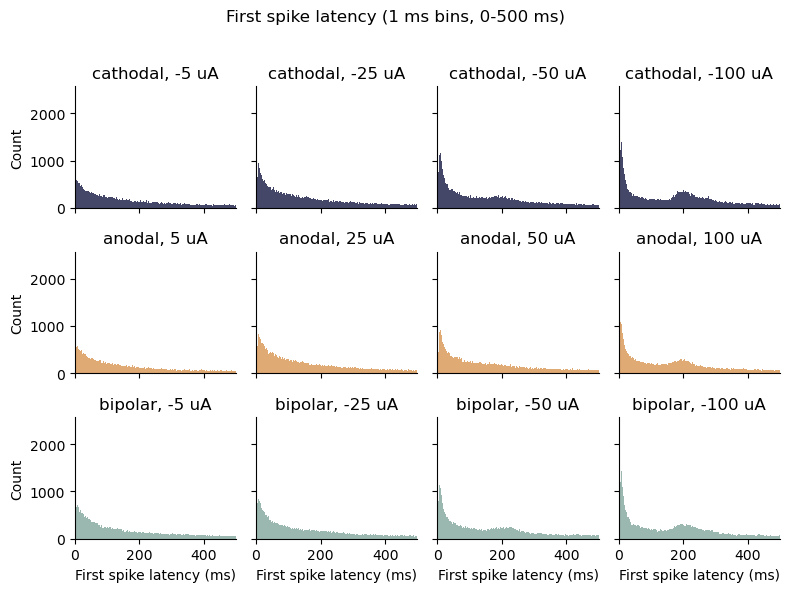

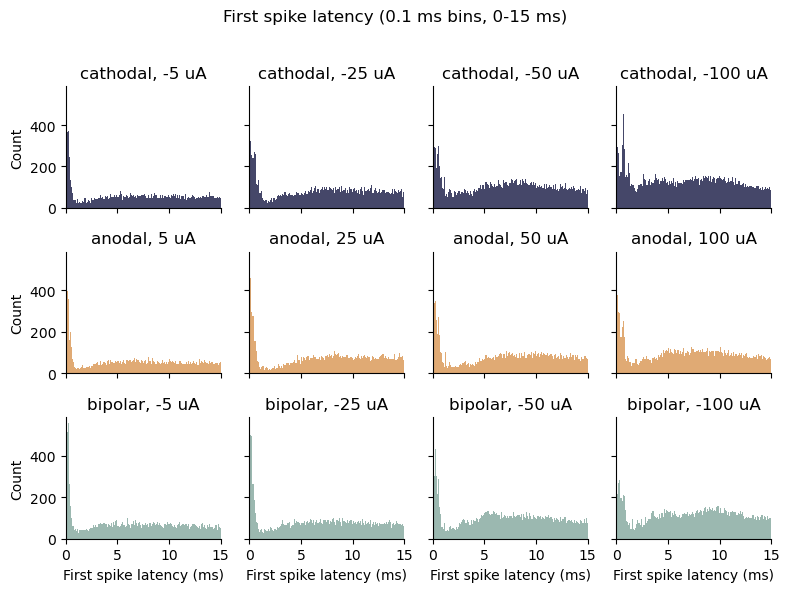

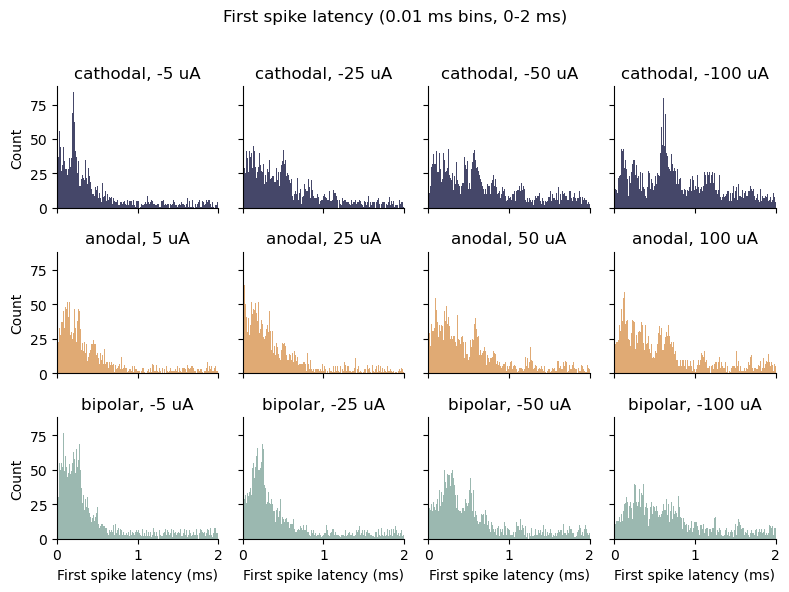

In [137]:
def plot_lat_hist_grid(latencies_by_pol_amp, polarity_settings, bins, xlim, xlabel, title):
    fig, axs = plt.subplots(3, 4, figsize=(8, 6), sharex=True, sharey=True)
    for pol_idx, (pol, amps, _, row, color) in enumerate(polarity_settings):
        for col, amp in enumerate(amps):
            ax = axs[row, col]
            lats = np.array(latencies_by_pol_amp[pol][amp])
            ax.hist(lats, bins=bins, color=color, alpha=0.8)
            ax.set_xlim(*xlim)
            ax.set_title(f'{pol}, {amp} uA')
            ax.spines[['top', 'right']].set_visible(False)
            if col == 0:
                ax.set_ylabel('Count')
            if row == 2:
                ax.set_xlabel(xlabel)
    plt.suptitle(title)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    
    
#### Full 500 ms, 1 ms bins
hist_bins_1ms = np.arange(0, 501, 1)
##### First 15 ms, 0.1 ms bins
hist_bins_01ms = np.arange(0, 15.1, 0.1)
##### First 2 ms, 0.01 ms bins (already used before)
hist_bins_10us = np.arange(0, 2.01, 0.01)

#### 1. Full 500 ms
plot_lat_hist_grid(
    latencies_by_pol_amp, 
    polarity_settings, 
    bins=hist_bins_1ms, 
    xlim=(0, 500), 
    xlabel='First spike latency (ms)', 
    title='First spike latency (1 ms bins, 0-500 ms)'
)

#### 2. First 15 ms
plot_lat_hist_grid(
    latencies_by_pol_amp, 
    polarity_settings, 
    bins=hist_bins_01ms, 
    xlim=(0, 15), 
    xlabel='First spike latency (ms)', 
    title='First spike latency (0.1 ms bins, 0-15 ms)'
)

#### 3. First 2 ms 
plot_lat_hist_grid(
    latencies_by_pol_amp, 
    polarity_settings, 
    bins=hist_bins_10us, 
    xlim=(0, 2), 
    xlabel='First spike latency (ms)', 
    title='First spike latency (0.01 ms bins, 0-2 ms)'
)

In [228]:
def find_trough_minimum(latencies, bins, search_range=(0.5, 5)):
    """
    Finds the latency bin with the minimum count within a specified range.

    Returns:
    - time of minimum bin center
    - count at that bin
    """
    counts, bin_edges = np.histogram(latencies, bins=bins)
    bin_centers = bin_edges[:-1] + np.diff(bin_edges)/2
    
    # restrict to search range
    mask = (bin_centers >= search_range[0]) & (bin_centers <= search_range[1])
    restricted_counts = counts[mask]
    restricted_centers = bin_centers[mask]

    if len(restricted_counts) == 0:
        return np.nan, np.nan

    min_idx = np.argmin(restricted_counts)
    return restricted_centers[min_idx], restricted_counts[min_idx]

latencies = np.array(latencies_by_pol_amp['cathodal'][-50])  # for example
min_latency, min_count = find_trough_minimum(latencies, hist_bins_01ms, search_range=(0.5, 5))
print(f"Minimum at {min_latency:.3f} ms with count {min_count}")


Minimum at 1.950 ms with count 51


In [231]:
for pol, amps, _, row, color in polarity_settings:
    for amp in amps:
        lats = np.array(latencies_by_pol_amp[pol][amp])
        min_time, min_count = find_trough_minimum(lats, hist_bins_01ms, search_range=(0.5, 5))
        print(f'{pol}, {amp} µA: trough min at {min_time:.3f} ms, count = {min_count}')


np.median([1.950, 1.950, 1.750, 1950]), np.std([1.950, 1.950, 1.750, 1.950])

cathodal, -5 µA: trough min at 1.950 ms, count = 23
cathodal, -25 µA: trough min at 1.750 ms, count = 25
cathodal, -50 µA: trough min at 1.950 ms, count = 51
cathodal, -100 µA: trough min at 1.950 ms, count = 76
anodal, 5 µA: trough min at 1.050 ms, count = 22
anodal, 25 µA: trough min at 1.450 ms, count = 17
anodal, 50 µA: trough min at 1.450 ms, count = 27
anodal, 100 µA: trough min at 1.450 ms, count = 34
bipolar, -5 µA: trough min at 1.250 ms, count = 29
bipolar, -25 µA: trough min at 1.350 ms, count = 29
bipolar, -50 µA: trough min at 1.550 ms, count = 36
bipolar, -100 µA: trough min at 1.750 ms, count = 42


(np.float64(1.95), np.float64(0.08660254037844384))

## Figure 4e, supplemental --  Norm probability scatters by distance from stim with EP overlays 

In [5]:
# load in the EP spatial distance data from Figure 2 so we compare single units to evoked potentials 

dfs_list = {
    'cathodal': [cat_df5, cat_df25, cat_df50, cat_df100],
    'anodal': [an_df5, an_df25, an_df50, an_df100],
    'bipolar': [bi_df5, bi_df25, bi_df50, bi_df100]
}

# load the confines:: organized by polarity --> amplitude --> (lower_bound, upper_bound)
#pickle_path = r"C:\Users\jordan\Documents\combined_figs\evoked_potentials\EP_distances.pkl"

import pickle as pkl
with open(r'intermediates\EP_distances.pkl', 'rb') as file:
    EP_distances = pkl.load(file)

confines = {
            'bipolar': 
                        {   '5': (np.mean(EP_distances['bipolar'][-5][0]), np.mean(EP_distances['bipolar'][-5][1])), 
                            '25': (np.mean(EP_distances['bipolar'][-25][0]), np.mean(EP_distances['bipolar'][-25][1])),
                            '50': (np.mean(EP_distances['bipolar'][-50][0]), np.mean(EP_distances['bipolar'][-50][1])),
                            '100': (np.mean(EP_distances['bipolar'][-100][0]), np.mean(EP_distances['bipolar'][-100][1]))
                        },
            'cathodal':
                        {   '5': (np.mean(EP_distances['monopolar'][-5][0]), np.mean(EP_distances['monopolar'][-5][1])),
                            '25': (np.mean(EP_distances['monopolar'][-25][0]), np.mean(EP_distances['monopolar'][-25][1])),
                            '50': (np.mean(EP_distances['monopolar'][-50][0]), np.mean(EP_distances['monopolar'][-50][1])),
                            '100': (np.mean(EP_distances['monopolar'][-100][0]), np.mean(EP_distances['monopolar'][-100][1]))
                        },
            'anodal':
                        {   '5': (np.mean(EP_distances['monopolar'][5][0]), np.mean(EP_distances['monopolar'][5][1])),
                            '25': (np.mean(EP_distances['monopolar'][25][0]), np.mean(EP_distances['monopolar'][25][1])),
                            '50': (np.mean(EP_distances['monopolar'][50][0]), np.mean(EP_distances['monopolar'][50][1])),
                            '100': (np.mean(EP_distances['monopolar'][100][0]), np.mean(EP_distances['monopolar'][100][1]))
                        }
            }
confines_dfs = {'cathodal': [], 'anodal': [], 'bipolar': []}

# loop through the dfs_list and confines to create the subsets
for condition, dfs in dfs_list.items():
    for i, df in enumerate(dfs):
        key = str([5, 25, 50, 100][i])  # get the key for confines
        lower_bound, upper_bound = confines[condition][key]
        confine_df = df[(df['distance'] >= lower_bound) & (df['distance'] <= upper_bound)]
        confines_dfs[condition].append(confine_df)

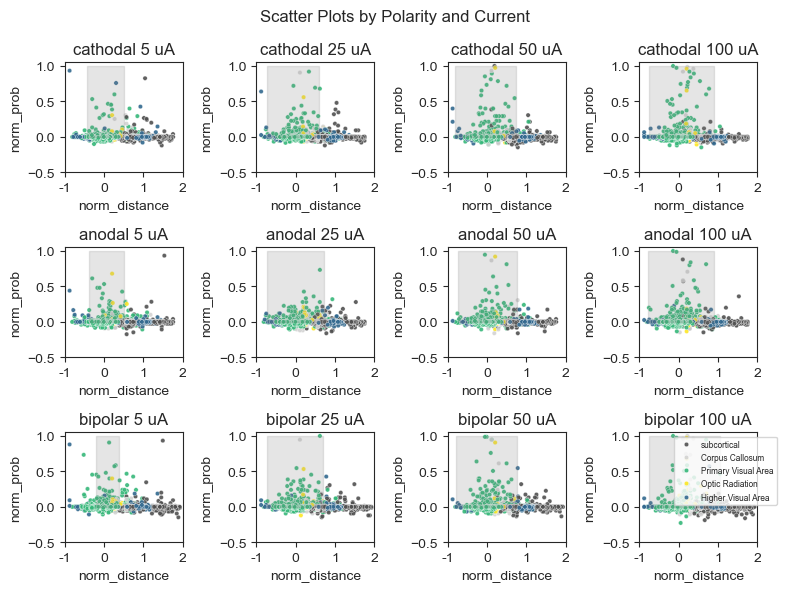

In [13]:
# distance
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors

x = 'norm_distance'
y = 'norm_prob'
hue = 'region_group'
prob_threshold = -0.5

size = 10
alpha = 0.9

# define the order of your labels and create a Viridis colormap
labels = ['Retrosplenial', 'Higher Visual Area', 'Primary Visual Area', 'Optic Radiation', 'Corpus Callosum', 'subcortical']
viridis = plt.get_cmap('viridis', len(labels) - 2)  # Exclude two for custom colors
colors = [mcolors.rgb2hex(viridis(i)) for i in range(viridis.N)]
custom_palette = dict(zip(labels[:-2], colors))
# custom colors for 'Corpus Callosum' and 'subcortical'
custom_palette['Corpus Callosum'] = '#D3D3D3'  # Light gray
custom_palette['subcortical'] = '#505050'  # Dark gray

# Create a 3x4 grid for subplots (rows for polarities, columns for current amplitudes)
fig, axs = plt.subplots(3, 4, figsize=(8, 6))
#fig.subplots_adjust(hspace=0.2, wspace=0.2)  

polarities = ['cathodal', 'anodal', 'bipolar']
dfs_list = {
    'cathodal': [cat_df5, cat_df25, cat_df50, cat_df100],
    'anodal': [an_df5, an_df25, an_df50, an_df100],
    'bipolar': [bi_df5, bi_df25, bi_df50, bi_df100]
}

for row, polarity in enumerate(polarities):
    dfs = dfs_list[polarity]

    # apply probability threshold filtering and filter out 'Unknown' and None for each DataFrame
    dfs = [df[(df[y] > prob_threshold) & (df['region_group'].isin(labels))] for df in dfs]

    for col, df in enumerate(dfs):
        sns.scatterplot(data=df, x=x, y=y, hue=hue, ax=axs[row, col], alpha=alpha, s=size, palette=custom_palette) #, legend=None)
        if axs[row, col] != axs[2, 3]:
            axs[row, col].get_legend().remove()
        else:
            axs[row, col].legend(loc='upper right', bbox_to_anchor=(1.2, 1), fontsize = 6)
            
        axs[row, col].set_title(f'{polarity} { [5, 25, 50, 100][col] } uA')
        axs[row, col].set_ylim(-0.5, 1.05)
        axs[row, col].set_xlim(-1000, 2000)
        axs[row, col].set_xticks([-1000, 0, 1000, 2000])
        axs[row, col].set_xticklabels([-1, 0, 1, 2])
        axs[row, col].set_yticks([-0.5, 0, 0.5, 1])

        # add shaded box region for the electric field confines
        current = [5, 25, 50, 100][col]
        lower_bound, upper_bound = confines[polarity][str(current)]
        axs[row, col].fill_betweenx([0, 1], lower_bound, upper_bound, color='gray', alpha=0.2)

        # Set common labels and title
        axs[row, col].set(xlabel=x, ylabel=y)

# adjust the legend on the last plot
#handles, labels = axs[row, 3].get_legend_handles_labels()
#fig.legend(handles, labels, loc='upper right')

plt.suptitle('Scatter Plots by Polarity and Current', size=12)
plt.tight_layout()

save_path = r'C:\Users\jordan\Documents\combined_figs\single_unit\direct_response\2ms\single_unit_scatters'
if not os.path.exists(save_path):
    os.makedirs(save_path)
#plt.savefig(os.path.join(save_path, 'distance_scatter_fieldsoverlay_legend_norm_largerylim.pdf'))
#plt.savefig(os.path.join(save_path, 'distance_scatter_fieldsoverlay_legend_norm_largerylim.png'))



In [311]:
# calculate the proportion of single units within the evoked potential bounds for each polarity and amplitude 
from collections import defaultdict

# rest of the variables above
amplitudes = [-5, -25, -50, -100]
# store proportions in a nested dict
proportions = defaultdict(dict)

for polarity in polarities:
    df = direct_df.copy()
    df_pol = df[df['polarity'] == polarity]

    for i, current in enumerate(amplitudes):
        if polarity == 'anodal':
            current = np.abs(current)
        
        df_pol_amp = df_pol[df_pol['amplitude'] == current]
        df_filtered = df_pol_amp[(df_pol_amp['norm_prob'] > 0.15)]
        
        lower_bound, upper_bound = confines[polarity][str(np.abs(current))]
        
        total = len(df_filtered)
        if total == 0:
            proportions[polarity][current] = np.nan
            continue

        within = df_filtered[(df_filtered['norm_distance'] >= lower_bound) & (df_filtered['norm_distance'] <= upper_bound)]
        prop_within = len(within) / total

        proportions[polarity][current] = prop_within

# Convert to DataFrame for easy viewing
proportions_df = pd.DataFrame(proportions).T  # polarities as rows, amplitudes as columns
print("Proportion of points within evoked potential bounds:")
print(proportions_df.round(3))



Proportion of points within evoked potential bounds:
           -5     -25    -50    -100    5      25     50     100
cathodal  0.483  0.765  0.889  1.000    NaN    NaN    NaN    NaN
anodal      NaN    NaN    NaN    NaN  0.657  0.812  0.868  0.956
bipolar   0.410  0.870  0.907  0.981    NaN    NaN    NaN    NaN


## Figure 4f, g -- direct responder density heatmaps and distribution statistics

In [7]:
df.head()

recording unit_id probe  ch     distance  norm_distance waveform_class  \
18258     jlh31     A18     A  12  1215.900844    1056.768824             fs   
18259     jlh31     A19     A  12  1215.900844    1056.768824             rs   
18260     jlh31     A29     A  15  1218.966347    1059.834326             rs   
18261     jlh31     A32     A  16  1176.267754    1017.135734             fs   
18262     jlh31     A33     A  17  1178.568030    1019.436010             rs   

       unit_amplitude  norm_prob  probability         region        fr  \
18258          1126.2        0.0          0.0  Postsubiculum  0.199700   
18259          1136.3        0.0          0.0  Postsubiculum  0.588438   
18260          1522.9        0.0          0.0  Postsubiculum  2.017417   
18261          2065.5        0.0          0.0  Postsubiculum  0.923123   
18262          1161.3        0.0          0.0  Postsubiculum  1.140991   

      region_group  norm_unit_amplitude   norm_fr polarity  amplitude  
18258  subcortical             0.097833  0.003588   anodal          5  
18259  subcortical             0.099233  0.011033   anodal          5  
18260  subcortical             0.152836  0.038397   anodal          5  
18261  subcortical             0.228069  0.017442   anodal          5  
18262  subcortical             0.102700  0.021614   anodal          5

bipolar -5 uA: 6.5±5.3 responders, total distance: 1272.5±616.7 µm, responders/mm: 5.389±3.140
bipolar -25 uA: 5.8±4.0 responders, total distance: 1003.0±509.1 µm, responders/mm: 7.225±5.695
bipolar -50 uA: 6.8±3.7 responders, total distance: 964.6±439.0 µm, responders/mm: 8.005±5.120
bipolar -100 uA: 7.4±3.2 responders, total distance: 853.9±238.9 µm, responders/mm: 9.137±4.392
cathodal -5 uA: 4.8±3.0 responders, total distance: 1179.5±558.6 µm, responders/mm: 4.962±2.885
cathodal -25 uA: 5.7±3.5 responders, total distance: 883.7±652.4 µm, responders/mm: 13.169±11.060
cathodal -50 uA: 7.5±5.7 responders, total distance: 867.6±670.6 µm, responders/mm: 16.784±11.467
cathodal -100 uA: 6.4±5.2 responders, total distance: 522.4±313.2 µm, responders/mm: 11.871±5.765
anodal 5 uA: 5.0±3.1 responders, total distance: 1238.7±533.4 µm, responders/mm: 5.806±5.618
anodal 25 uA: 5.3±3.0 responders, total distance: 1259.2±674.0 µm, responders/mm: 6.227±4.143
anodal 50 uA: 7.6±3.2 responders, total d

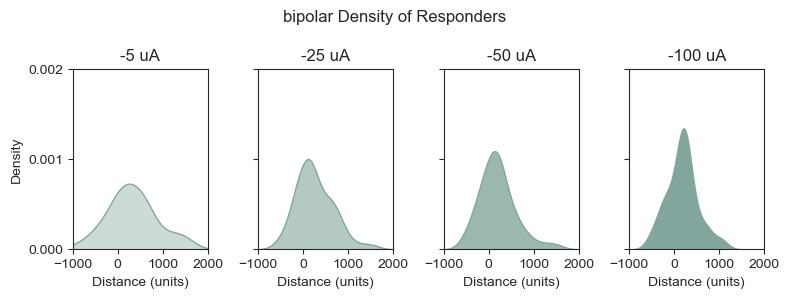

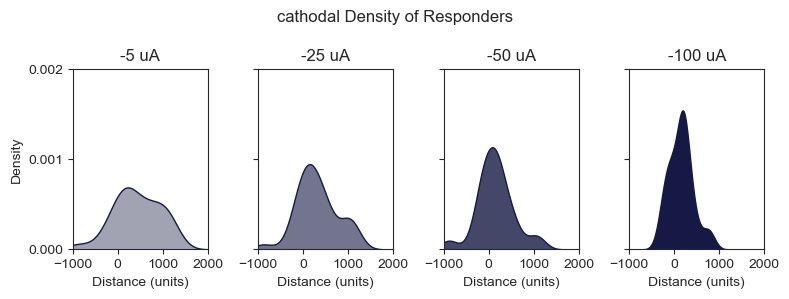

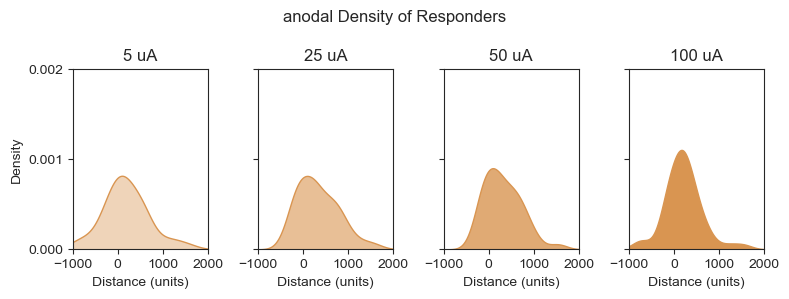

In [8]:
 # bipolar: '#82A69D' cathodal: '#161943' anodal: '#D99551' 
colors = ['#82A69D','#161943', '#D99551']
pols = ['bipolar', 'cathodal', 'anodal']
for x, df in enumerate([bi_direct_df, cat_direct_df, an_direct_df]):
    color = colors[x]
    fig, ax = plt.subplots(1, 4, figsize=(8, 3), sharey=True)
    axs = ax.ravel()
    alphas = [0.4, 0.6, 0.8, 1]

    for i, amp in enumerate(df.amplitude.unique()):
        alpha = alphas[i]
        amp_df = df[df['amplitude'] == amp]

        # compute per-recording stats
        stats = []
        for rec, rec_df in amp_df.groupby('recording'):
            rec_res = rec_df[rec_df['norm_prob'] > 0.15]
            distances = rec_res['norm_distance'].values
            if len(distances) == 0:
                continue
            max_distance = np.max(distances)
            min_distance = np.min(distances)
            total_distance = np.abs(min_distance) + max_distance
            n_responders = len(rec_res)
            resp_per_mm = n_responders / total_distance if total_distance > 0 else 0
            stats.append((n_responders, total_distance, resp_per_mm * 1000))  # scale to per mm

        if len(stats) > 0:
            stats = np.array(stats)
            n_mean, n_std = stats[:, 0].mean(), stats[:, 0].std()
            dist_mean, dist_std = stats[:, 1].mean(), stats[:, 1].std()
            resp_mean, resp_std = stats[:, 2].mean(), stats[:, 2].std()
            print(f"{pols[x]} {amp} uA: {n_mean:.1f}±{n_std:.1f} responders, "
                  f"total distance: {dist_mean:.1f}±{dist_std:.1f} µm, "
                  f"responders/mm: {resp_mean:.3f}±{resp_std:.3f}")
        else:
            print(f"{pols[x]} {amp} uA: no valid data")

        # plot violin/kde
        amp_df_res = amp_df[amp_df['norm_prob'] > 0.15]
        sns.kdeplot(data=amp_df_res, x='norm_distance', fill=True,
                    ax=axs[i], color=color, alpha=alpha)

        axs[i].set_xlabel('Distance (units)', fontsize=10)
        axs[i].set_ylabel('Density', fontsize=10)
        axs[i].set_ylim(0, 0.0020)
        axs[i].set_title(f'{amp} uA', fontsize=12)
        axs[i].set_xlim(-1000, 2000)
        axs[i].set_xticks([-1000, 0, 1000, 2000])
        axs[i].set_yticks([0, 0.001, 0.002])

    plt.suptitle(f'{pols[x]} Density of Responders', fontsize=12)
    plt.tight_layout()

    #plt.savefig(f'C:\\Users\\jordan\\Documents\\combined_figs\\single_unit\\direct_response\\2ms\\{pols[x]}_density_responders.png')
    #plt.savefig(f'C:\\Users\\jordan\\Documents\\combined_figs\\single_unit\\direct_response\\2ms\\{pols[x]}_density_responders.pdf')

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

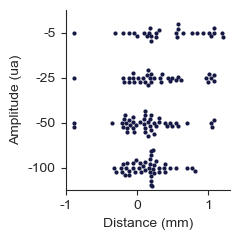

In [16]:
from scipy.stats import sem
df = cat_direct_df
fig, ax = plt.subplots(figsize = (2.5,2.5))

dists_dict = {}
for amp in df.amplitude.unique():
    
    amp_df = df[df['amplitude'] == amp]
    amp_df_res = amp_df[amp_df['norm_prob'] > 0.15]
    dists = amp_df_res.norm_distance.values
    
    dists_dict[amp] = dists
    sns.swarmplot(data=amp_df_res, x='norm_distance', y='amplitude', ax=ax, orient='h', color=cathodal_color, alpha=1, size = 3)
    ax.set_xticks([-1000, 0, 1000], ['-1', '0', '1'])
    ax.set_xlabel('Distance (mm)')
    ax.set_ylabel('Amplitude (ua)')
    median_dist = np.median(dists)
    sem_dist = sem(dists)
    
    ax.set_title(f'')
    ax.spines[['top', 'right']].set_visible(False)
plt.tight_layout()

In [318]:
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

dist5 = dists_dict[-5]
dist25 = dists_dict[-25]
dist50 = dists_dict[-50]
dist100 = dists_dict[-100]
data_list = [dist5, dist25, dist50, dist100]
print(f"5 uA: {np.mean(dist5):.3f} ± {np.std(dist5):.3f}, "
      f"25 uA: {np.mean(dist25):.3f} ± {np.std(dist25):.3f}, "
      f"50 uA: {np.mean(dist50):.3f} ± {np.std(dist50):.3f}, "
      f"100 uA: {np.mean(dist100):.3f} ± {np.std(dist100):.3f}")
# 1) Prepare data in long-form for statsmodels
labels = ['5 ua'] * len(dist5) + ['25 ua'] * len(dist25) + ['50 ua'] * len(dist50) + ['100 ua'] * len(dist100)
values = np.concatenate([dist5, dist25, dist50, dist100])
df = pd.DataFrame({'amplitude': labels, 'value': values})

# 2) One-way ANOVA
model = ols('value ~ amplitude', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

# 3) Post-hoc: Tukey's HSD
tukey = pairwise_tukeyhsd(df['value'], df['amplitude'], alpha=0.05)
print(tukey)

5 uA: 426.191 ± 500.035, 25 uA: 300.376 ± 436.522, 50 uA: 137.376 ± 394.108, 100 uA: 146.108 ± 260.533
                 sum_sq     df         F    PR(>F)
amplitude  1.987281e+06    3.0  4.151713  0.007378
Residual   2.377371e+07  149.0       NaN       NaN
  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower    upper   reject
--------------------------------------------------------
100 ua  25 ua  154.2678 0.3275  -81.5659 390.1015  False
100 ua   5 ua  280.0835 0.0194   32.9403 527.2267   True
100 ua  50 ua   -8.7323 0.9996 -227.5321 210.0674  False
 25 ua   5 ua  125.8157 0.5986 -136.5275  388.159  False
 25 ua  50 ua -163.0001 0.2794 -398.8339  72.8336  False
  5 ua  50 ua -288.8159 0.0148 -535.9591 -41.6727   True
--------------------------------------------------------


Kruskal–Wallis H=10.101, p=1.773e-02
          1         2         3         4
1  1.000000  0.458306  0.033204  0.044787
2  0.458306  1.000000  0.334920  0.355569
3  0.033204  0.334920  1.000000  0.854648
4  0.044787  0.355569  0.854648  1.000000


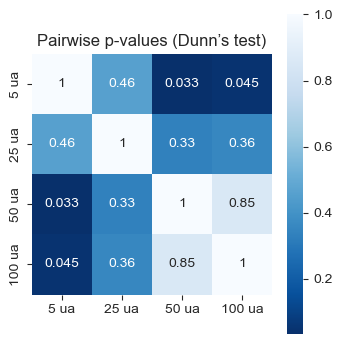

In [18]:
## non parametric ANOVA (kinda gets at distribution but also differences... maybe want to do KS tests )
import scipy.stats as stats
import scikit_posthocs as sp

dist5 = dists_dict[-5]
dist25 = dists_dict[-25]
dist50 = dists_dict[-50]
dist100 = dists_dict[-100]
data_list = [dist5, dist25, dist50, dist100]

# 1) Kruskal–Wallis for overall difference
H, p = stats.kruskal(*data_list)
print(f"Kruskal–Wallis H={H:.3f}, p={p:.3e}")

# 2) only interpret if p < alpha -- post-hoc Dunn’s test
posthoc = sp.posthoc_dunn(data_list, p_adjust='holm-sidak')
print(posthoc)

# 3) visualize pairwise p-values in a heatmap
fig = plt.figure(figsize=(3.54, 3.54))
sns.heatmap(posthoc, annot=True, cmap='Blues_r', vmax=1, square=True,
            xticklabels=['5 ua','25 ua','50 ua','100 ua'],
            yticklabels=['5 ua','25 ua','50 ua','100 ua'])
plt.title('Pairwise p-values (Dunn’s test)')
plt.tight_layout()

In [19]:
# pairwise KS tests for initial exploration
dist5 = dists_dict[-5]
dist25 = dists_dict[-25]
dist50 = dists_dict[-50]
dist100 = dists_dict[-100]

_, p5_25 = stats.ks_2samp(dist5, dist25)  # compare 5 and 25
print(f"KS test between 5 and 25 uA: p={p5_25:.3}")
_, p5_50 = stats.ks_2samp(dist5, dist50)
print(f"KS test between 5 and 50 uA: p={p5_50:.3}")
_, p5_100 = stats.ks_2samp(dist5, dist100)
print(f"KS test between 5 and 100 uA: p={p5_100:.3}")
_, p25_50 = stats.ks_2samp(dist25, dist50)
print(f"KS test between 25 and 50 uA: p={p25_50:.3}")
_, p25_100 = stats.ks_2samp(dist25, dist100)
print(f"KS test between 25 and 100 uA: p={p25_100:.3}")
_, p50_100 = stats.ks_2samp(dist50, dist100)
print(f"KS test between 50 and 100 uA: p={p50_100:.3}")


KS test between 5 and 25 uA: p=0.243
KS test between 5 and 50 uA: p=0.0105
KS test between 5 and 100 uA: p=0.00275
KS test between 25 and 50 uA: p=0.258
KS test between 25 and 100 uA: p=0.106
KS test between 50 and 100 uA: p=0.825


In [20]:
from statsmodels.stats.multitest import multipletests
p_vals = [
    p5_25, p5_50, p5_100,
    p25_50, p25_100,
    p50_100
]
p_labels = [
    '5 vs 25 uA', '5 vs 50 uA', '5 vs 100 uA',
    '25 vs 50 uA', '25 vs 100 uA', '50 vs 100 uA']

# Holm–Šidák correction
reject, p_corrected, _, _ = multipletests(p_vals, method='holm-sidak')

for lab, p in zip(p_labels, p_corrected):
    print(f'{lab}: p_corrected={p:.3f}, reject={reject[p_labels.index(lab)]}')

5 vs 25 uA: p_corrected=0.566, reject=False
5 vs 50 uA: p_corrected=0.052, reject=False
5 vs 100 uA: p_corrected=0.016, reject=True
25 vs 50 uA: p_corrected=0.566, reject=False
25 vs 100 uA: p_corrected=0.363, reject=False
50 vs 100 uA: p_corrected=0.825, reject=False


## Figure 4h -- proportion of direct responders

C:\Users\jordan\AppData\Local\Temp\ipykernel_60236\1190694615.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_within_confines['high_responder'] = (df_within_confines['norm_prob'] > 0.10).astype(int)
C:\Users\jordan\AppData\Local\Temp\ipykernel_60236\1190694615.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_within_confines['polarity'] = polarity
C:\Users\jordan\AppData\Local\Temp\ipykernel_60236\1190694615.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a


Mean ± SD proportion of high responders:
cathodal   5 µA : 0.019 ± 0.138
cathodal  25 µA : 0.033 ± 0.178
cathodal  50 µA : 0.035 ± 0.183
cathodal 100 µA : 0.037 ± 0.190

cathodal ANOVA with linear amplitude term:
               sum_sq      df         F    PR(>F)
amplitude    0.182619     1.0  6.064121  0.013825
Residual   173.249874  5753.0       NaN       NaN

Mean ± SD proportion of high responders:
anodal   5 µA : 0.031 ± 0.173
anodal  25 µA : 0.036 ± 0.186
anodal  50 µA : 0.039 ± 0.194
anodal 100 µA : 0.042 ± 0.200

anodal ANOVA with linear amplitude term:
               sum_sq      df         F    PR(>F)
amplitude    0.080331     1.0  2.268573  0.132077
Residual   201.236116  5683.0       NaN       NaN

Mean ± SD proportion of high responders:
bipolar   5 µA : 0.028 ± 0.165
bipolar  25 µA : 0.032 ± 0.175
bipolar  50 µA : 0.033 ± 0.180
bipolar 100 µA : 0.034 ± 0.181

bipolar ANOVA with linear amplitude term:
               sum_sq      df         F    PR(>F)
amplitude    0.032251  

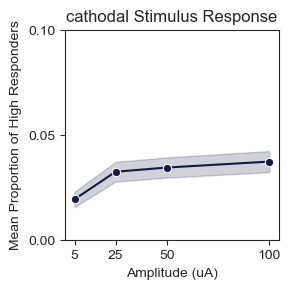

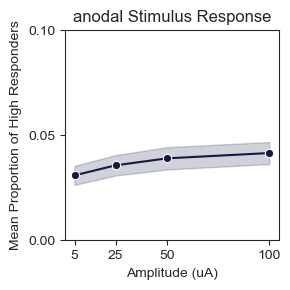

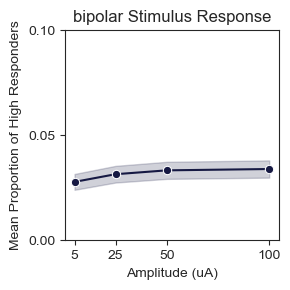

In [23]:
amplitudes = [5, 25, 50, 100]
polarity = 'cathodal'

for polarity in ['cathodal', 'anodal', 'bipolar']:
    combined_df = pd.DataFrame()
    for amplitude, df in zip(amplitudes, dfs_list[polarity]):
        lower_bound, upper_bound = confines[polarity]['100']#str(amplitude)]
        df_within_confines = df[(df['distance'] >= lower_bound) & (df['distance'] <= upper_bound)]
        df_within_confines['high_responder'] = (df_within_confines['norm_prob'] > 0.10).astype(int)
        df_within_confines['polarity'] = polarity
        df_within_confines['amplitude'] = amplitude
        combined_df = pd.concat([combined_df, df_within_confines], ignore_index=True)

    # Set up the plot
    fig, ax = plt.subplots(1, 1, figsize=(3, 3))


    sns.lineplot(data=combined_df[combined_df['polarity'] == polarity], x='amplitude', y='high_responder', 
                color=cathodal_color,
                marker='o', err_style="band", errorbar = 'se', ax=ax)

    # Configure plot aesthetics
    ax.set_title(f'{polarity} Stimulus Response')
    ax.set_xlabel('Amplitude (uA)')
    ax.set_ylabel('Mean Proportion of High Responders')
    ax.set_ylim(0, 0.1)
    ax.set_yticks([0, 0.05, 0.1])
    ax.set_xticks(amplitudes)

    plt.tight_layout()
    #plt.savefig(rf'C:\Users\jordan\Documents\combined_figs\single_unit\direct_response\2ms\{polarity}_mean_proportion_high_responders.png')
    #plt.savefig(rf'C:\Users\jordan\Documents\combined_figs\single_unit\direct_response\2ms\{polarity}_mean_proportion_high_responders.pdf')

    import statsmodels.api as sm
    from statsmodels.formula.api import ols

    # 1) summary stats
    stats_tbl = (
        combined_df
        .groupby('amplitude')['high_responder']
        .agg(['mean', 'std'])
        .round(4)
    )
    print("\nMean ± SD proportion of high responders:")
    for amp, row in stats_tbl.iterrows():
        print(f"{polarity} {amp:3d} µA : {row['mean']:.3f} ± {row['std']:.3f}")

    # 2) linear‑term ANOVA  (OLS with amplitude as a continuous variable)
    combined_df['amplitude'] = combined_df['amplitude'].astype(float)
    model = ols('high_responder ~ amplitude', data=combined_df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print(f"\n{polarity} ANOVA with linear amplitude term:")
    print(anova_table)


### probabiltiy of "responders" -- units that are responsive to any amplitude within a stimulation condition

C:\Users\jordan\AppData\Local\Temp\ipykernel_60236\594299034.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unique_id'] = df['unit_id'] + '_' + df['recording']


              sum_sq     df          F    PR(>F)
amplitude   0.774426    1.0  12.779023  0.000394
Residual   23.876932  394.0        NaN       NaN

 cathodal Mean ± SD of norm_prob per amplitude:
   5 µA : 0.1162 ± 0.2013
  25 µA : 0.1417 ± 0.2075
  50 µA : 0.1937 ± 0.2525
 100 µA : 0.2327 ± 0.3097


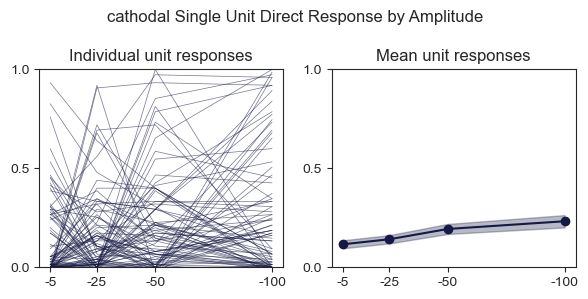

In [27]:
from scipy.stats import sem
import numpy as np
import matplotlib.pyplot as plt

# setup
amplitudes = [-5, -25, -50, -100]
amplitudes_abs = np.abs(amplitudes)

df = cat_direct_df 
color = cathodal_color
polarity = 'cathodal'

# create unique IDs for each unit across recordings
df['unique_id'] = df['unit_id'] + '_' + df['recording']

# get only units that pass threshold at any amplitude
cat_ids = df[df['norm_prob'] > 0.15].unique_id.unique()


norm_probs = []
valid_ids = []

# loop over IDs and collect norm_prob curves
for uid in cat_ids:
    unit_df = df[cat_direct_df['unique_id'] == uid]
    unit_df = unit_df.sort_values('amplitude', key=lambda x: np.abs(x))  # sort by abs amplitude
    
    if len(unit_df) == 4:
        norm_probs.append(unit_df['norm_prob'].values)
        valid_ids.append(uid)

# Convert to array
norm_probs = np.array(norm_probs)


fig, ax = plt.subplots(1, 2, figsize=(6, 3))

# Left plot: individual curves
for row in norm_probs:
    ax[0].plot(amplitudes_abs, row, lw=0.5, color=color, alpha=0.6)

# Right plot: mean ± SEM
mean_vals = np.mean(norm_probs, axis=0)
sem_vals = sem(norm_probs, axis=0)

ax[1].plot(amplitudes_abs, mean_vals, marker='o', color=color)
ax[1].fill_between(amplitudes_abs, mean_vals - sem_vals, mean_vals + sem_vals,
                   color=color, alpha=0.3)

# Formatting
for a in ax:
    a.set_ylim(0, 1)
    a.set_xticks(amplitudes_abs, [str(a) for a in amplitudes])
    a.set_yticks([0, 0.5, 1])

ax[0].set_title('Individual unit responses')
ax[1].set_title('Mean unit responses')
plt.suptitle(f'{polarity} Single Unit Direct Response by Amplitude')
plt.tight_layout()

#plt.savefig(rf'C:\Users\jordan\Documents\combined_figs\single_unit\direct_response\2ms\{polarity}_responder_prob_amps.png')
#plt.savefig(rf'C:\Users\jordan\Documents\combined_figs\single_unit\direct_response\2ms\{polarity}_responder_prob_amps.pdf')

amplitudes = [-5, -25, -50, -100]
amplitudes_abs = np.abs(amplitudes)

# Build a long-form DataFrame
unit_ids = []
amp_list = []
prob_list = []

for uid, probs in zip(valid_ids, norm_probs):
    for amp, prob in zip(amplitudes_abs, probs):
        unit_ids.append(uid)
        amp_list.append(amp)
        prob_list.append(prob)

anova_df = pd.DataFrame({
    'unit': unit_ids,
    'amplitude': amp_list,
    'norm_prob': prob_list
})

# Fit linear model: norm_prob ~ amplitude
model = ols('norm_prob ~ amplitude', data=anova_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

summary = (
    anova_df
    .groupby('amplitude')['norm_prob']
    .agg(['mean', 'std'])
    .round(4)
)

print(f"\n {polarity} Mean ± SD of norm_prob per amplitude:")
for amp, row in summary.iterrows():
    print(f"{amp:4.0f} µA : {row['mean']:.4f} ± {row['std']:.4f}")

C:\Users\jordan\AppData\Local\Temp\ipykernel_60236\3640377122.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unique_id'] = df['unit_id'] + '_' + df['recording']


              sum_sq     df          F    PR(>F)
amplitude   0.449481    1.0  11.363902  0.000832
Residual   13.843694  350.0        NaN       NaN

 anodal Mean ± SD of norm_prob per amplitude:
   5 µA : 0.1133 ± 0.1836
  25 µA : 0.1117 ± 0.1349
  50 µA : 0.1708 ± 0.2147
 100 µA : 0.1998 ± 0.2459


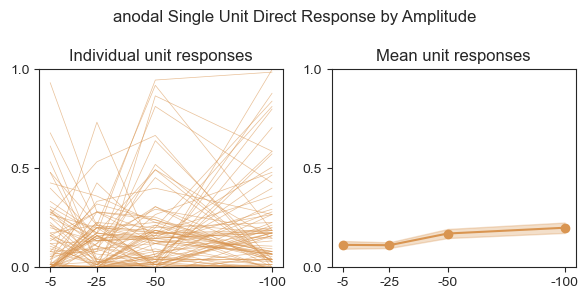

In [34]:
from scipy.stats import sem
import numpy as np
import matplotlib.pyplot as plt

# setup
amplitudes = [-5, -25, -50, -100]
amplitudes_abs = np.abs(amplitudes)

df = an_direct_df 
color = anodal_color
polarity = 'anodal'

# create unique IDs for each unit across recordings
df['unique_id'] = df['unit_id'] + '_' + df['recording']

# get only units that pass threshold at any amplitude
cat_ids = df[df['norm_prob'] > 0.15].unique_id.unique()


norm_probs = []
valid_ids = []

# loop over IDs and collect norm_prob curves
for uid in cat_ids:
    unit_df = df[df['unique_id'] == uid]
    unit_df = unit_df.sort_values('amplitude', key=lambda x: np.abs(x))  # sort by abs amplitude
    
    if len(unit_df) == 4:
        norm_probs.append(unit_df['norm_prob'].values)
        valid_ids.append(uid)

# Convert to array
norm_probs = np.array(norm_probs)


fig, ax = plt.subplots(1, 2, figsize=(6, 3))

# Left plot: individual curves
for row in norm_probs:
    ax[0].plot(amplitudes_abs, row, lw=0.5, color=color, alpha=0.6)

# Right plot: mean ± SEM
mean_vals = np.mean(norm_probs, axis=0)
sem_vals = sem(norm_probs, axis=0)

ax[1].plot(amplitudes_abs, mean_vals, marker='o', color=color)
ax[1].fill_between(amplitudes_abs, mean_vals - sem_vals, mean_vals + sem_vals,
                   color=color, alpha=0.3)

# Formatting
for a in ax:
    a.set_ylim(0, 1)
    a.set_xticks(amplitudes_abs, [str(a) for a in amplitudes])
    a.set_yticks([0, 0.5, 1])

ax[0].set_title('Individual unit responses')
ax[1].set_title('Mean unit responses')
plt.suptitle(f'{polarity} Single Unit Direct Response by Amplitude')
plt.tight_layout()

#plt.savefig(rf'C:\Users\jordan\Documents\combined_figs\single_unit\direct_response\2ms\{polarity}_responder_prob_amps.png')
#plt.savefig(rf'C:\Users\jordan\Documents\combined_figs\single_unit\direct_response\2ms\{polarity}_responder_prob_amps.pdf')

amplitudes = [-5, -25, -50, -100]
amplitudes_abs = np.abs(amplitudes)

# Build a long-form DataFrame
unit_ids = []
amp_list = []
prob_list = []

for uid, probs in zip(valid_ids, norm_probs):
    for amp, prob in zip(amplitudes_abs, probs):
        unit_ids.append(uid)
        amp_list.append(amp)
        prob_list.append(prob)

anova_df = pd.DataFrame({
    'unit': unit_ids,
    'amplitude': amp_list,
    'norm_prob': prob_list
})

# Fit linear model: norm_prob ~ amplitude
model = ols('norm_prob ~ amplitude', data=anova_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

summary = (
    anova_df
    .groupby('amplitude')['norm_prob']
    .agg(['mean', 'std'])
    .round(4)
)

print(f"\n {polarity} Mean ± SD of norm_prob per amplitude:")
for amp, row in summary.iterrows():
    print(f"{amp:4.0f} µA : {row['mean']:.4f} ± {row['std']:.4f}")

C:\Users\jordan\AppData\Local\Temp\ipykernel_60236\1843154344.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unique_id'] = df['unit_id'] + '_' + df['recording']


              sum_sq     df         F    PR(>F)
amplitude   0.276889    1.0  5.956104  0.015035
Residual   21.849525  470.0       NaN       NaN

 bipolar Mean ± SD of norm_prob per amplitude:
   5 µA : 0.1227 ± 0.2034
  25 µA : 0.1250 ± 0.1747
  50 µA : 0.1652 ± 0.2222
 100 µA : 0.1823 ± 0.2553


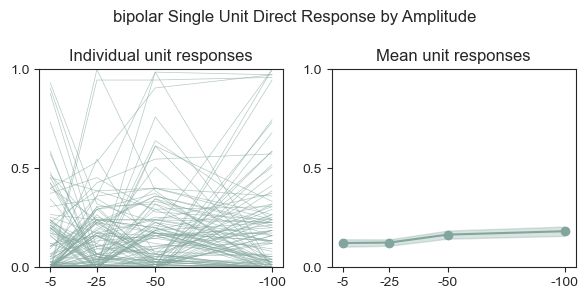

In [32]:
from scipy.stats import sem
import numpy as np
import matplotlib.pyplot as plt

# setup
amplitudes = [-5, -25, -50, -100]
amplitudes_abs = np.abs(amplitudes)

df = bi_direct_df 
color = bipolar_color
polarity = 'bipolar'

# create unique IDs for each unit across recordings
df['unique_id'] = df['unit_id'] + '_' + df['recording']

# get only units that pass threshold at any amplitude
cat_ids = df[df['norm_prob'] > 0.15].unique_id.unique()


norm_probs = []
valid_ids = []

# loop over IDs and collect norm_prob curves
for uid in cat_ids:
    unit_df = df[df['unique_id'] == uid]
    unit_df = unit_df.sort_values('amplitude', key=lambda x: np.abs(x))  # sort by abs amplitude
    
    if len(unit_df) == 4:
        norm_probs.append(unit_df['norm_prob'].values)
        valid_ids.append(uid)

# Convert to array
norm_probs = np.array(norm_probs)


fig, ax = plt.subplots(1, 2, figsize=(6, 3))

# Left plot: individual curves
for row in norm_probs:
    ax[0].plot(amplitudes_abs, row, lw=0.5, color=color, alpha=0.6)

# Right plot: mean ± SEM
mean_vals = np.mean(norm_probs, axis=0)
sem_vals = sem(norm_probs, axis=0)

ax[1].plot(amplitudes_abs, mean_vals, marker='o', color=color)
ax[1].fill_between(amplitudes_abs, mean_vals - sem_vals, mean_vals + sem_vals,
                   color=color, alpha=0.3)

# Formatting
for a in ax:
    a.set_ylim(0, 1)
    a.set_xticks(amplitudes_abs, [str(a) for a in amplitudes])
    a.set_yticks([0, 0.5, 1])

ax[0].set_title('Individual unit responses')
ax[1].set_title('Mean unit responses')
plt.suptitle(f'{polarity} Single Unit Direct Response by Amplitude')
plt.tight_layout()

#plt.savefig(rf'C:\Users\jordan\Documents\combined_figs\single_unit\direct_response\2ms\{polarity}_responder_prob_amps.png')
#plt.savefig(rf'C:\Users\jordan\Documents\combined_figs\single_unit\direct_response\2ms\{polarity}_responder_prob_amps.pdf')

amplitudes = [-5, -25, -50, -100]
amplitudes_abs = np.abs(amplitudes)

# Build a long-form DataFrame
unit_ids = []
amp_list = []
prob_list = []

for uid, probs in zip(valid_ids, norm_probs):
    for amp, prob in zip(amplitudes_abs, probs):
        unit_ids.append(uid)
        amp_list.append(amp)
        prob_list.append(prob)

anova_df = pd.DataFrame({
    'unit': unit_ids,
    'amplitude': amp_list,
    'norm_prob': prob_list
})

# Fit linear model: norm_prob ~ amplitude
model = ols('norm_prob ~ amplitude', data=anova_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

summary = (
    anova_df
    .groupby('amplitude')['norm_prob']
    .agg(['mean', 'std'])
    .round(4)
)

print(f"\n {polarity} Mean ± SD of norm_prob per amplitude:")
for amp, row in summary.iterrows():
    print(f"{amp:4.0f} µA : {row['mean']:.4f} ± {row['std']:.4f}")

# Figure 6 -- direct response by cell type (FS/RS)

## figure 6a -- waveform shape

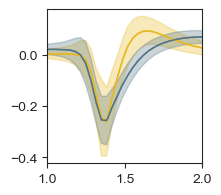

In [36]:
units_combined = pd.concat([r.units for r in recordings]).reset_index()

fs_color = '#E8B820'
rs_color = '#517383'

rs_df = units_combined[units_combined['waveform_class'] == 'rs']
fs_df = units_combined[units_combined['waveform_class'] == 'fs']

fs_waveforms = np.array(fs_df.waveform.values)
rs_waveforms = np.array(rs_df.waveform.values)

mean_fs_wave = np.mean(fs_waveforms, axis = 0)
mean_rs_wave = np.mean(rs_waveforms, axis = 0)

std_fs = np.std(fs_waveforms, axis = 0)
std_rs = np.std(rs_waveforms, axis = 0)

sem_fs = sem(fs_waveforms, axis = 0) 
sem_rs = sem(rs_waveforms, axis = 0) 

time = np.linspace(0, 82/30, 82)

fig, ax = plt.subplots(figsize = (2,2))

ax.plot(time, mean_fs_wave, color = fs_color, lw =1)
ax.plot(time, mean_rs_wave, color = rs_color, lw =1)

ax.fill_between(time, mean_fs_wave - std_fs, mean_fs_wave + std_fs, color = fs_color, alpha = 0.3)
ax.fill_between(time, mean_rs_wave - std_rs, mean_rs_wave + std_rs, color = rs_color, alpha = 0.3)

ax.set_xlim(1, 2)
ax.fill_between(time, mean_fs_wave - sem_fs, mean_fs_wave + sem_fs, color = fs_color, alpha = 0.5)
ax.fill_between(time, mean_rs_wave - sem_rs, mean_rs_wave + sem_rs, color = rs_color, alpha = 0.5)

save_path = r'C:\Users\jordan\Documents\combined_figs\single_unit\direct_response\2ms\fs_rs'
if not os.path.exists(save_path):
    os.makedirs(save_path)
#plt.savefig(os.path.join(save_path, f'waveforms_FSRS.pdf'))
#plt.savefig(os.path.join(save_path, f'waveforms_FSRS.png'))



## figure 6b -- waveform clustering

c:\Users\jordan\AppData\Local\anaconda3\Lib\site-packages\dlab\utils.py:264: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[2].legend(loc='upper right')


Error plotting waveform classification: 6


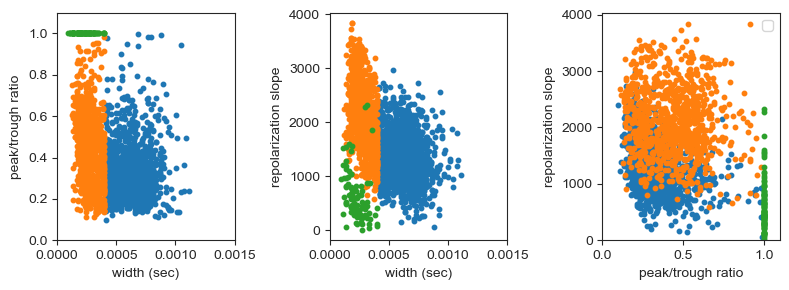

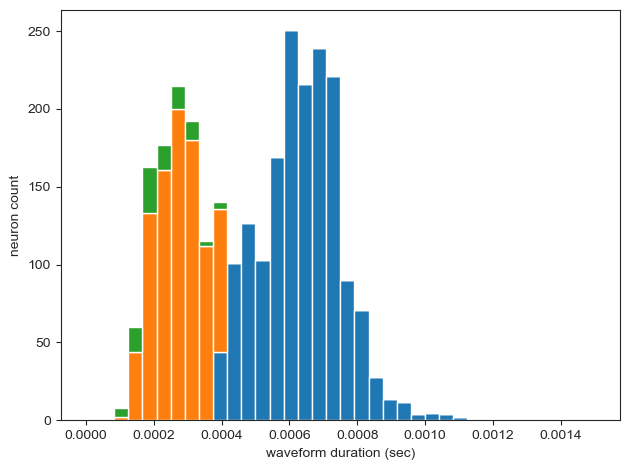

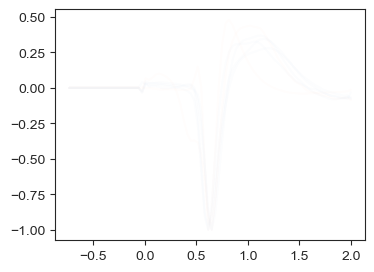

In [42]:
from dlab import utils
units_combined = units_combined[(units_combined.slope_outlier == 0) & (units_combined.group == 'good')]
wave_ = []
for i,template in units_combined.template.items():
    wave_.append(utils.get_peak_waveform_from_template(np.array(template)))
#units_combined['waveform']=wave_

df = utils.classify_waveform_shape(units_combined, plots=False, save_plots = False, kmeans=0, basepath = r"C:\Users\jordan\Documents\combined_figs\single_unit\fs_rs")

durations = np.array(df.waveform_duration)
PTratio = np.array(df.waveform_PTratio)
repolarizationslope = np.array(df.waveform_repolarizationslope)
try:
    utils.plot_waveform_classification(durations, PTratio, repolarizationslope, df,save_plots=False, basepath = r"C:\Users\jordan\Documents\combined_figs\single_unit\fs_rs")
except Exception as e:
    print(f"Error plotting waveform classification: {e}")


## Figure 6c -- distance scatters for FS/RS 

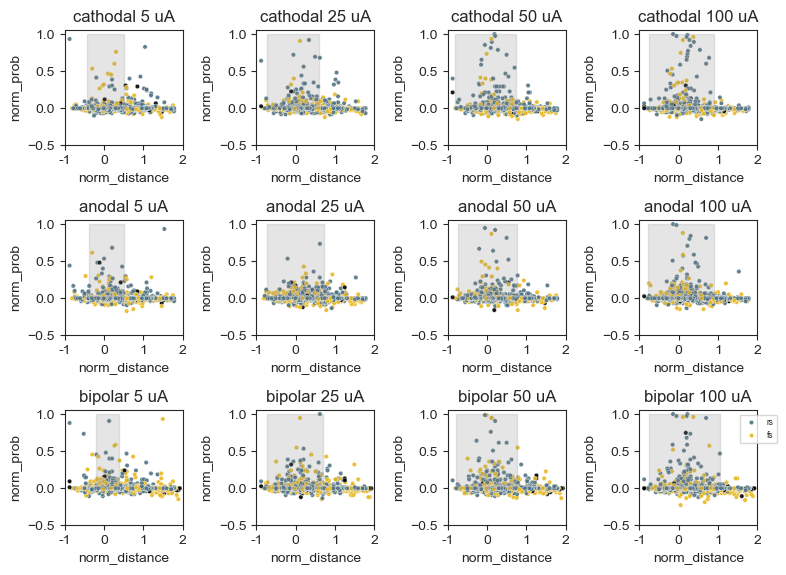

In [ ]:
x = 'norm_distance'
y = 'norm_prob'
hue = 'waveform_class'
prob_threshold = -0.5

size = 10
alpha = 0.9

palette = {'rs': '#517383', 
           'fs': '#E8B820'}  


# Create a 3x4 grid for subplots
fig, axs = plt.subplots(3, 4, figsize=(8, 6))
#fig.subplots_adjust(hspace=0.2, wspace=0.2)  # Adjust space as needed

polarities = ['cathodal', 'anodal', 'bipolar']
amps = [-5, -25, -50, -100]


for row, polarity in enumerate(polarities):
    pol_df = direct_df[direct_df['polarity'] == polarity]
    
    for col, amp in enumerate(amps):
        if polarity == 'anodal':
            amp = np.abs(amp)
        df = pol_df[pol_df['amplitude'] == amp]
        
        sns.scatterplot(data=df, x=x, y=y, hue=hue, hue_order = ['rs', 'fs'], palette = palette,
                        ax=axs[row, col], alpha=alpha, s=size) #, legend=None)
        if axs[row, col] != axs[2, 3]:
            axs[row, col].get_legend().remove()
        else:
            axs[row, col].legend(loc='upper right', bbox_to_anchor=(1.2, 1), fontsize = 6)
            
        axs[row, col].set_title(f'{polarity} { [5, 25, 50, 100][col] } uA')
        axs[row, col].set_ylim(-0.5, 1.05)
        axs[row, col].set_xlim(-1000, 2000)
        axs[row, col].set_xticks([-1000, 0, 1000, 2000])
        axs[row, col].set_xticklabels([-1, 0, 1, 2])
        axs[row, col].set_yticks([-0.5, 0, 0.5, 1])

        # Add shaded box region for the electric field confines
        current = [5, 25, 50, 100][col]
        lower_bound, upper_bound = confines[polarity][str(current)]
        axs[row, col].fill_betweenx([0, 1], lower_bound, upper_bound, color='gray', alpha=0.2)

        # Set common labels and title
        axs[row, col].set(xlabel=x, ylabel=y)

# Adjust the legend on the last plot
#handles, labels = axs[row, 3].get_legend_handles_labels()
#fig.legend(handles, labels, loc='upper right')

plt.suptitle(f'', size=20)
plt.tight_layout()
save_path = r'C:\Users\jordan\Documents\combined_figs\single_unit\direct_response\2ms\fs_rs'
if not os.path.exists(save_path):
    os.makedirs(save_path)
#plt.savefig(os.path.join(save_path, f'distance_scatter_fsrscomb.pdf'))
#plt.savefig(os.path.join(save_path, f'distance_scatter_fsrscomb.png'))


In [284]:
df.head()

recording unit_id probe  ch     distance  norm_distance waveform_class  \
16187     jlh31     A18     A  12  1215.900844    1056.768824             fs   
16188     jlh31     A19     A  12  1215.900844    1056.768824             rs   
16189     jlh31     A29     A  15  1218.966347    1059.834326             rs   
16190     jlh31     A32     A  16  1176.267754    1017.135734             fs   
16191     jlh31     A33     A  17  1178.568030    1019.436010             rs   

       unit_amplitude  norm_prob  probability         region        fr  \
16187          1126.2   0.000000     0.000000  Postsubiculum  0.199700   
16188          1136.3   0.000000     0.000000  Postsubiculum  0.588438   
16189          1522.9  -0.026667     0.000000  Postsubiculum  2.017417   
16190          2065.5   0.013333     0.013333  Postsubiculum  0.923123   
16191          1161.3   0.000000     0.013333  Postsubiculum  1.140991   

      region_group  norm_unit_amplitude   norm_fr  polarity  amplitude  
16187  subcortical             0.097833  0.003545  cathodal       -100  
16188  subcortical             0.099233  0.010990  cathodal       -100  
16189  subcortical             0.152836  0.038355  cathodal       -100  
16190  subcortical             0.228069  0.017399  cathodal       -100  
16191  subcortical             0.102700  0.021572  cathodal       -100

In [291]:
prob_threshold

-0.5

In [293]:
confines

{'bipolar': {'5': (np.float64(-217.87520911891826),
   np.float64(385.2210451388359)),
  '25': (np.float64(-731.1961891393805), np.float64(686.000414226956)),
  '50': (np.float64(-792.4798941381808), np.float64(773.1535480388675)),
  '100': (np.float64(-756.9131388957812), np.float64(1042.2580398407401))},
 'cathodal': {'5': (np.float64(-424.2056034439459),
   np.float64(510.4148604016902)),
  '25': (np.float64(-724.9555900745474), np.float64(604.6581991196845)),
  '50': (np.float64(-812.4560245537704), np.float64(747.0806675691153)),
  '100': (np.float64(-750.408506023625), np.float64(887.7120027346333))},
 'anodal': {'5': (np.float64(-395.68547479144695),
   np.float64(502.01609835837365)),
  '25': (np.float64(-737.4206991417636), np.float64(733.9291812623541)),
  '50': (np.float64(-738.9617999047179), np.float64(762.4708422458988)),
  '100': (np.float64(-775.0029474220647), np.float64(890.737696906246))}}

In [307]:
y

'norm_prob'

In [ ]:
# calculate the proportion of single units within the evoked potential bounds for each polarity and amplitude and waveform class
from collections import defaultdict

# rest of the variables above
amplitudes = [-5, -25, -50, -100]
polarities = ['cathodal', 'anodal', 'bipolar']
# store proportions in a nested dict
proportions = defaultdict(dict)

for ws in ['rs', 'fs']:
    for polarity in polarities:
        df = direct_df.copy()
        df_pol = df[df['polarity'] == polarity]

        for i, current in enumerate(amplitudes):
            if polarity == 'anodal':
                current = np.abs(current)
            
            df_pol_amp = df_pol[df_pol['amplitude'] == current]
            df_filtered = df_pol_amp[(df_pol_amp['norm_prob'] > 0.15) & (df_pol_amp['waveform_class'] == ws)]
            
            lower_bound, upper_bound = confines[polarity][str(np.abs(current))]
            
            total = len(df_filtered)
            if total == 0:
                proportions[polarity][current] = np.nan
                continue

            within = df_filtered[(df_filtered['norm_distance'] >= lower_bound) & (df_filtered['norm_distance'] <= upper_bound)]
            prop_within = len(within) / total

            proportions[polarity][current] = prop_within

    # Convert to DataFrame for easy viewing
    proportions_df = pd.DataFrame(proportions).T  # polarities as rows, amplitudes as columns
    print(f"{ws}: Proportion of units within evoked potential bounds:")
    print(proportions_df.round(3))

rs: Proportion of units within evoked potential bounds:
           -5     -25    -50    -100   5     25    50     100
cathodal  0.333  0.741  0.882  1.000   NaN   NaN   NaN    NaN
anodal      NaN    NaN    NaN    NaN  0.65  0.85  0.88  0.968
bipolar   0.400  0.862  0.939  0.973   NaN   NaN   NaN    NaN
fs: Proportion of units within evoked potential bounds:
           -5     -25   -50   -100    5     25     50     100
cathodal  0.750  0.833   1.0   1.0    NaN   NaN    NaN    NaN
anodal      NaN    NaN   NaN   NaN  0.667   0.7  0.833  0.929
bipolar   0.412  0.875   0.9   1.0    NaN   NaN    NaN    NaN


bipolar -5 uA rs: 20 responders, total distance: 2237.98 um, responders/mm: 8.9366
bipolar -5 uA fs: 17 responders, total distance: 1916.36 um, responders/mm: 8.8710
bipolar -25 uA rs: 29 responders, total distance: 1363.54 um, responders/mm: 21.2681
bipolar -25 uA fs: 16 responders, total distance: 1991.42 um, responders/mm: 8.0345
bipolar -50 uA rs: 33 responders, total distance: 1440.56 um, responders/mm: 22.9077
bipolar -50 uA fs: 20 responders, total distance: 1991.42 um, responders/mm: 10.0431
bipolar -100 uA rs: 37 responders, total distance: 1516.27 um, responders/mm: 24.4020
bipolar -100 uA fs: 14 responders, total distance: 1275.91 um, responders/mm: 10.9725
cathodal -5 uA rs: 15 responders, total distance: 2078.75 um, responders/mm: 7.2159
cathodal -5 uA fs: 12 responders, total distance: 1068.25 um, responders/mm: 11.2334
cathodal -25 uA rs: 27 responders, total distance: 1965.35 um, responders/mm: 13.7380
cathodal -25 uA fs: 6 responders, total distance: 1118.57 um, respon

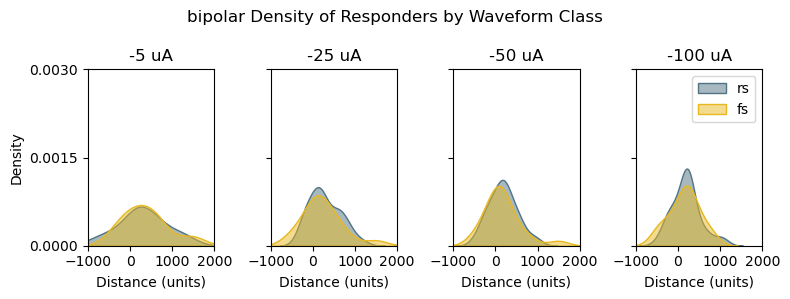

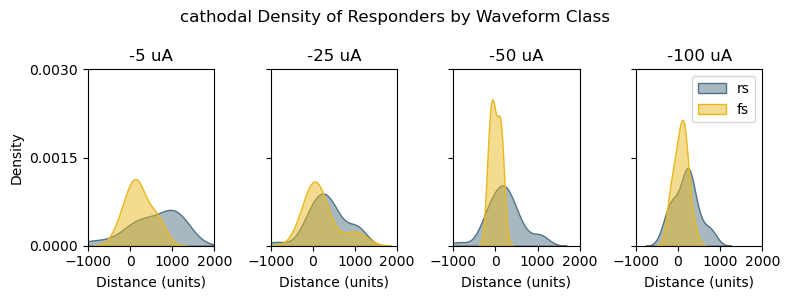

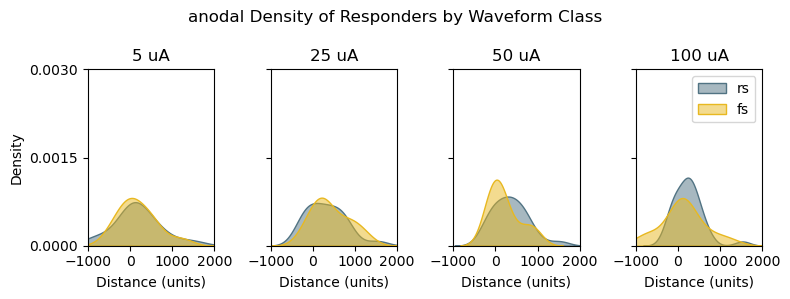

In [312]:
colors = ['#82A69D','#161943', '#D99551']
pols = ['bipolar', 'cathodal', 'anodal']
alphas = [0.4,0.6,0.8,1]
for x, df in enumerate([bi_direct_df, cat_direct_df, an_direct_df]):
    color = colors[x]
    fig, ax = plt.subplots(1,4, figsize = (8, 3), sharey = True)
    axs = ax.ravel()
    for i, amp in enumerate(df.amplitude.unique()):
        alpha = alphas[i]
        amp_df = df[df['amplitude'] == amp]
        amp_df_res = amp_df[amp_df['norm_prob'] > 0.15]
        fs_res = amp_df_res[amp_df_res['waveform_class'] == 'fs']
        rs_res = amp_df_res[amp_df_res['waveform_class'] == 'rs']
        
        # violin plot for distance
        sns.kdeplot(data=rs_res, x='norm_distance', fill=True, ax = axs[i], color = rs_color,  alpha = 0.5)
        sns.kdeplot(data=fs_res, x='norm_distance', fill=True, ax = axs[i], color = fs_color,  alpha = 0.5)
        
        ## desnity calculations for fs and rs responders 
        distances_rs = rs_res['norm_distance'].values
        max_distance_rs = np.max(distances_rs)
        min_distance_rs = np.min(distances_rs)
        total_distance_rs = np.abs(min_distance_rs) + max_distance_rs
        n_responders_rs = len(rs_res)
        resp_per_mm_rs = n_responders_rs / total_distance_rs if total_distance_rs > 0 else 0
        
        print(f'{pols[x]} {amp} uA rs: {n_responders_rs} responders, total distance: {total_distance_rs:.2f} um, responders/mm: {resp_per_mm_rs*1000:.4f}')
        distances_fs = fs_res['norm_distance'].values
        max_distance_fs = np.max(distances_fs)
        min_distance_fs = np.min(distances_fs)
        total_distance_fs = np.abs(min_distance_fs) + max_distance_fs
        n_responders_fs = len(fs_res)
        resp_per_mm_fs = n_responders_fs / total_distance_fs if total_distance_fs > 0 else 0
        print(f'{pols[x]} {amp} uA fs: {n_responders_fs} responders, total distance: {total_distance_fs:.2f} um, responders/mm: {resp_per_mm_fs*1000:.4f}')
        
        axs[i].set_xlabel('Distance (units)', fontsize=10)
        axs[i].set_ylabel('Density', fontsize=10)
        axs[i].set_ylim(0,0.0030)
        axs[i].set_title(f'{amp} uA', fontsize=12)
        axs[i].set_xlim(-1000, 2000)
        axs[i].set_xticks([-1000, 0, 1000, 2000])
        axs[i].set_yticks([0, 0.0015, 0.0030])
        if i == 3:
            axs[i].legend(['rs', 'fs'])
    plt.suptitle(f'{pols[x]} Density of Responders by Waveform Class', fontsize=12)
    plt.tight_layout()
    #plt.savefig(f'C:\\Users\\jordan\\Documents\\combined_figs\\single_unit\\direct_response\\2ms\\fs_rs\\{pols[x]}_density_responders_ws.png')
    #plt.savefig(f'C:\\Users\\jordan\\Documents\\combined_figs\\single_unit\\direct_response\\2ms\\fs_rs\\{pols[x]}_density_responders_ws.pdf')

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

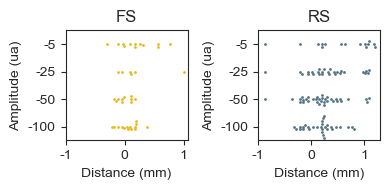

In [44]:
from scipy.stats import sem
df = cat_direct_df
fig, ax = plt.subplots(1, 2, figsize = (4,2))

fs_dists_dict = {}
rs_dists_dict = {}
for amp in df.amplitude.unique():
    
    amp_df = df[df['amplitude'] == amp]
    amp_df_res = amp_df[amp_df['norm_prob'] > 0.15]
    
    fs_df = amp_df_res[amp_df_res['waveform_class'] == 'fs']
    rs_df = amp_df_res[amp_df_res['waveform_class'] == 'rs']
    
    fs_dists = fs_df.norm_distance.values
    rs_dists = rs_df.norm_distance.values
    
    fs_dists_dict[amp] = fs_dists
    rs_dists_dict[amp] = rs_dists
    sns.swarmplot(data=fs_df, x='norm_distance', y='amplitude', ax=ax[0], orient='h', color=fs_color, alpha=1, size = 2)
    sns.swarmplot(data=rs_df, x='norm_distance', y='amplitude', ax=ax[1], orient='h', color=rs_color, alpha=1, size = 2)
    ax[0].set_xticks([-1000, 0, 1000], ['-1', '0', '1'])
    ax[0].set_xlabel('Distance (mm)')
    ax[0].set_ylabel('Amplitude (ua)')
    ax[0].set_title(f'FS')
    ax[1].set_xticks([-1000, 0, 1000], ['-1', '0', '1'])
    ax[1].set_xlabel('Distance (mm)')
    ax[1].set_ylabel('Amplitude (ua)')
    ax[1].set_title(f'RS')
    
plt.tight_layout()

In [320]:
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

fs5 = fs_dists_dict[-5]
rs5 = rs_dists_dict[-5]

fs25 = fs_dists_dict[-25]
rs25 = rs_dists_dict[-25]

fs50 = fs_dists_dict[-50]
rs50 = rs_dists_dict[-50]

fs100 = fs_dists_dict[-100]
rs100 = rs_dists_dict[-100]


# ---------- 1. build a long‑form DataFrame ----------
amplitudes = [5, 25, 50, 100]          # positive values are clearer
cell_types = ["FS", "RS"]

dist_dict = {                      # your distance arrays
    5:  {"FS": fs5,   "RS": rs5},
    25: {"FS": fs25,  "RS": rs25},
    50: {"FS": fs50,  "RS": rs50},
    100:{"FS": fs100, "RS": rs100},
}

records = []
for amp in amplitudes:
    for ct in cell_types:
        for val in dist_dict[amp][ct]:
            records.append({"amplitude": amp,
                            "cell_type": ct,
                            "value": val})

df_long = pd.DataFrame(records)

# ---------- 2. two‑way ANOVA ----------
model = ols('value ~ C(amplitude) * C(cell_type)', data=df_long).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\nTwo‑way ANOVA:")
print(anova_table)

# ---------- 3. post‑hoc: Tukey on every amplitude × cell‑type combo ----------
df_long["group"] = df_long["amplitude"].astype(str) + "_" + df_long["cell_type"]
tukey = pairwise_tukeyhsd(df_long["value"], df_long["group"], alpha=0.05)
print("\nTukey HSD (all pairs):")
print(tukey)

# ---------- 4. (optional) mean ± SD table ----------
summary = df_long.groupby(["amplitude","cell_type"])["value"]\
                 .agg(["mean","std"]).round(2)
print("\nMean ± SD distance:")
print(summary)




Two‑way ANOVA:
                                 sum_sq     df         F    PR(>F)
C(amplitude)               1.836780e+06    3.0  4.103293  0.007951
C(cell_type)               1.200138e+06    1.0  8.043180  0.005245
C(amplitude):C(cell_type)  2.502362e+05    3.0  0.559018  0.642949
Residual                   2.088966e+07  140.0       NaN       NaN

Tukey HSD (all pairs):
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower     upper   reject
---------------------------------------------------------
100_FS 100_RS   124.897 0.9739 -259.8494  509.6434  False
100_FS  25_FS  143.7737 0.9947 -436.2534  723.8007  False
100_FS  25_RS  277.0126 0.3717 -114.4758   668.501  False
100_FS  50_FS  -62.3969 0.9999 -554.5662  429.7723  False
100_FS  50_RS  148.1668 0.9284 -229.3098  525.6434  False
100_FS   5_FS  145.1006 0.9798 -322.5321  612.7334  False
100_FS   5_RS   506.705 0.0128   64.9696  948.4405   True
100_RS  25_FS   18.8767    1.0 -512.7269  550

## Figure 6e -- stacked rasters for fs/rs

C:\Users\jordan\AppData\Local\Temp\ipykernel_162228\1777398015.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df['dv'] = combined_df['ccf_coordinates'].apply(lambda x: x[1] if isinstance(x, np.ndarray) and x.size > 1 else None)
C:\Users\jordan\AppData\Local\Temp\ipykernel_162228\1777398015.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df['unique_dv'] = combined_df['dv'] + fraction_increment * grouped.cumcount()


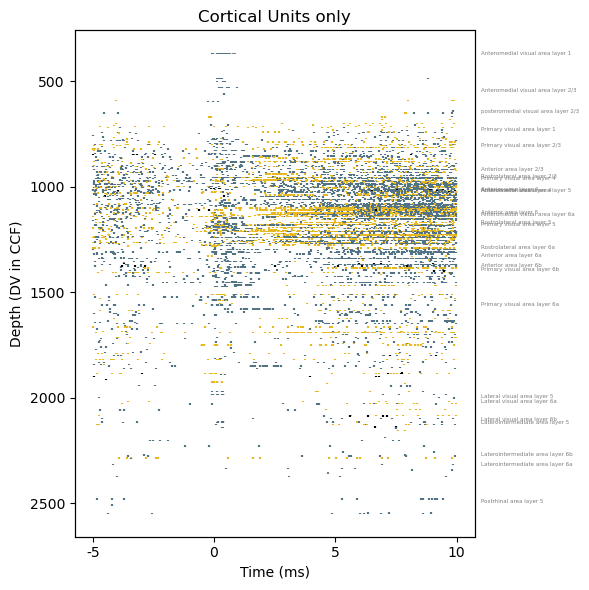

In [227]:
pre = -0.005
post = 0.01
for r in recordings:
    r.units['recording'] = r.mouse

concat_units = pd.concat([r.units for r in recordings]).reset_index()
concat_units['brain_reg'] = concat_units['brain_reg'].str.replace(',', '')


concat_units_A = concat_units.loc[concat_units.probe == 'A'].loc[concat_units.group == 'good'].copy()
concat_units_B = concat_units.loc[concat_units.probe == 'B'].loc[concat_units.group == 'good'].copy()
concat_units_C = concat_units.loc[concat_units.probe == 'C'].loc[concat_units.group == 'good'].copy()
concat_units_good = concat_units.loc[concat_units.group == 'good'].copy()

mask = concat_units_good['brain_reg'].str.contains('area', case=False, na=False)
concat_units_cortical = concat_units_good.loc[mask]


polarity = 'monopolar'


amp = -50
params = {'amp': amp, 'pulse_number': 1, 'pulse_duration': 100, 'polarity': polarity}

stacked_rasters_folder = r"C:\Users\jordan\Documents\combined_figs\single_unit\stacked_rasters\waveform_class"
os.makedirs(stacked_rasters_folder, exist_ok=True)


stacked_rasters_combined(concat_units_cortical, recordings, params, window_start=pre, window_end=post,
                        color_by = 'waveform_class',
                        marker_size = 1,
                        title='Cortical Units only', save=False,
                        save_path = os.path.join(stacked_rasters_folder,
                                                f'allrecordings_cortical_{polarity}_{amp}ua_{int(post*1000)}ms_window'))


## Figure 6F -- PSTHs of FS and RS cells

In [191]:

def psth(spike_times, stim_times, pre, post, bin_size=0.005, var = 'sem', plot=True, plot_type='line', color = 'blue', alpha = 1, scale = 1,  ax=None):
    """
    Computes the Peri-Stimulus Time Histogram (PSTH), optionally plots it.
    
    Parameters:
    - spike_times: array-like, spike times for a single unit.
    - stim_times: array-like, times of stimulus delivery.
    - pre: float, time before stimulus to start window (negative value).
    - post: float, time after stimulus to end window.
    - bin_size: float, width of bins for histogram.
    - plot: bool, whether to plot the PSTH.
    - plot_type: str, 'histogram' or 'line'.
    - ax: matplotlib.axes.Axes, optional axis for plotting.
    
    Returns:
    - ax: matplotlib.axes.Axes, the axis with the plot if plot=True.
    """
    bins = np.arange(pre, post + bin_size, bin_size)
    counts_per_trial = []

    for stim_time in stim_times:
        relative_spike_times = spike_times - stim_time
        trial_spikes = relative_spike_times[(relative_spike_times >= pre) & (relative_spike_times <= post)]
        counts, _ = np.histogram(trial_spikes, bins=bins)
        counts_per_trial.append(counts)
    
    counts_per_trial_array = np.array(counts_per_trial)
    psth = np.mean(counts_per_trial_array, axis=0)
    
    if var == 'variance':
        variance = np.var(counts_per_trial_array, axis=0)
    elif var == 'sem':
        variance = np.std(counts_per_trial_array, axis=0) / np.sqrt(len(counts_per_trial_array))
    elif var == 'std':
        variance = np.std(counts_per_trial_array, axis=0)
    
    # ---- optional extra scaling
    psth     = psth / scale
    variance = variance / scale
    if plot:
        if ax is None:
            fig, ax = plt.subplots()
        plot_psth(psth, variance, bins[:-1] + bin_size / 2, plot_type = plot_type, color = color, scale = scale, ax = ax)
        return ax
    else:
        return psth, variance, counts_per_trial

def plot_psth(psth_arr, variance, bin_centers, plot_type='line', color = 'blue', alpha = 1, scale = 1, ax=None):
    """
    Plots the PSTH with variance, with time represented in milliseconds (ms).
    
    Parameters:
    - psth: array, averaged firing rate per bin.
    - variance: array, variance of firing rate per bin.
    - bin_centers: array, centers of the bins.
    - plot_type: str, 'histogram' or 'line'.
    - ax: matplotlib.axes.Axes, axis for plotting.
    """
    if ax is None:
        fig, ax = plt.subplots()
    
    # Convert bin_centers from seconds to milliseconds
    bin_centers_ms = bin_centers * 1000
    
    if plot_type == 'histogram':
        # Adjust the width proportionally if necessary
        width_ms = np.diff(bin_centers_ms)[0] if len(bin_centers_ms) > 1 else 1
        ax.bar(bin_centers_ms, psth_arr, width=width_ms, alpha=0.6, label='Mean Firing Rate')
    elif plot_type == 'line':
        var = variance # variance specified from psth function (sem, std, or var)
        ax.plot(bin_centers_ms, psth_arr, color = color,  label='Mean PSTH')
        ax.fill_between(bin_centers_ms, psth_arr - var, psth_arr + var, alpha=0.3, color = color)
    else:
        print("Invalid plot type. Choose 'histogram' or 'line'.")
        return
    
    ax.set_xlabel('Time from Stimulus (ms)')
    ax.set_ylabel('Average Firing Rate (Hz)')
    ax.set_title('PSTH (' + plot_type.capitalize() + ')')
    ax.legend()


INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'MATH': 38 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'A', 'F', 'R', 'S', 'T', 'a', 'e', 'eight', 'f', 'five', 'four', 'h', 'hyphen', 'i', 'j', 'l', 'm', 'minus', 'mu', 'n', 'nonmarkingreturn', 'o', 'one', 'parenleft', 'parenright', 'period', 'r', 's', 'seven', 'space', 't', 'three', 'two', 'u', 'uni202F', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 11, 12, 16, 17, 19, 20, 21, 22, 23, 24, 26, 27, 36, 41, 53, 54, 55, 68, 72, 73, 75, 76, 77, 79, 80, 81, 82, 85, 86, 87, 88, 119, 2833, 3228]
INFO:fontTools.subset:Closed glyph list over 'MAT

Error plotting PSTH/Raster for jlh39 fs at -5 µA: x and y must have same first dimension, but have shapes (15,) and (1,)
Error plotting PSTH/Raster for jlh39 rs at -5 µA: x and y must have same first dimension, but have shapes (15,) and (1,)
Error plotting PSTH/Raster for jlh39 fs at -25 µA: x and y must have same first dimension, but have shapes (15,) and (1,)
Error plotting PSTH/Raster for jlh39 rs at -25 µA: x and y must have same first dimension, but have shapes (15,) and (1,)
Error plotting PSTH/Raster for jlh39 fs at -50 µA: x and y must have same first dimension, but have shapes (15,) and (1,)
Error plotting PSTH/Raster for jlh39 rs at -50 µA: x and y must have same first dimension, but have shapes (15,) and (1,)
Error plotting PSTH/Raster for jlh39 fs at -100 µA: x and y must have same first dimension, but have shapes (15,) and (1,)
Error plotting PSTH/Raster for jlh39 rs at -100 µA: x and y must have same first dimension, but have shapes (15,) and (1,)


INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'MATH': 27 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'A', 'F', 'R', 'eight', 'five', 'four', 'h', 'hyphen', 'j', 'l', 'm', 'mu', 'n', 'nine', 'nonmarkingreturn', 'o', 'one', 'period', 'r', 'six', 'space', 'three', 'two', 'uni202F', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 16, 17, 19, 20, 21, 22, 23, 24, 25, 27, 28, 36, 41, 53, 75, 77, 79, 80, 81, 82, 85, 119, 2833]
INFO:fontTools.subset:Closed glyph list over 'MATH': 27 glyphs after
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'A', 'F', 'R', 'eight', 'five', 'four', 'h', 

Error plotting PSTH/Raster for jlh49v1 fs at -5 µA: x and y must have same first dimension, but have shapes (15,) and (1,)
Error plotting PSTH/Raster for jlh49v1 rs at -5 µA: x and y must have same first dimension, but have shapes (15,) and (1,)
Error plotting PSTH/Raster for jlh49v1 fs at -25 µA: x and y must have same first dimension, but have shapes (15,) and (1,)
Error plotting PSTH/Raster for jlh49v1 rs at -25 µA: x and y must have same first dimension, but have shapes (15,) and (1,)
Error plotting PSTH/Raster for jlh49v1 fs at -50 µA: x and y must have same first dimension, but have shapes (15,) and (1,)
Error plotting PSTH/Raster for jlh49v1 rs at -50 µA: x and y must have same first dimension, but have shapes (15,) and (1,)
Error plotting PSTH/Raster for jlh49v1 fs at -100 µA: x and y must have same first dimension, but have shapes (15,) and (1,)
Error plotting PSTH/Raster for jlh49v1 rs at -100 µA: x and y must have same first dimension, but have shapes (15,) and (1,)


INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'MATH': 27 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'A', 'F', 'R', 'eight', 'five', 'four', 'h', 'hyphen', 'j', 'l', 'm', 'mu', 'n', 'nine', 'nonmarkingreturn', 'o', 'one', 'period', 'r', 'six', 'space', 'two', 'uni202F', 'v', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 16, 17, 19, 20, 21, 23, 24, 25, 27, 28, 36, 41, 53, 75, 77, 79, 80, 81, 82, 85, 89, 119, 2833]
INFO:fontTools.subset:Closed glyph list over 'MATH': 27 glyphs after
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'A', 'F', 'R', 'eight', 'five', 'four', 'h', 'hyp

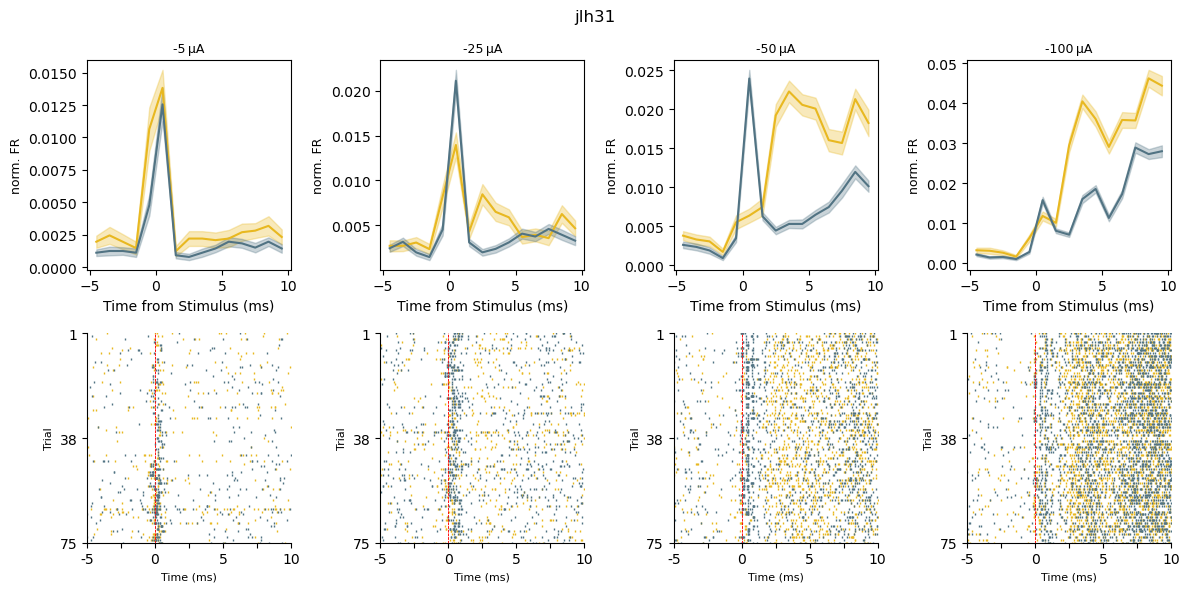

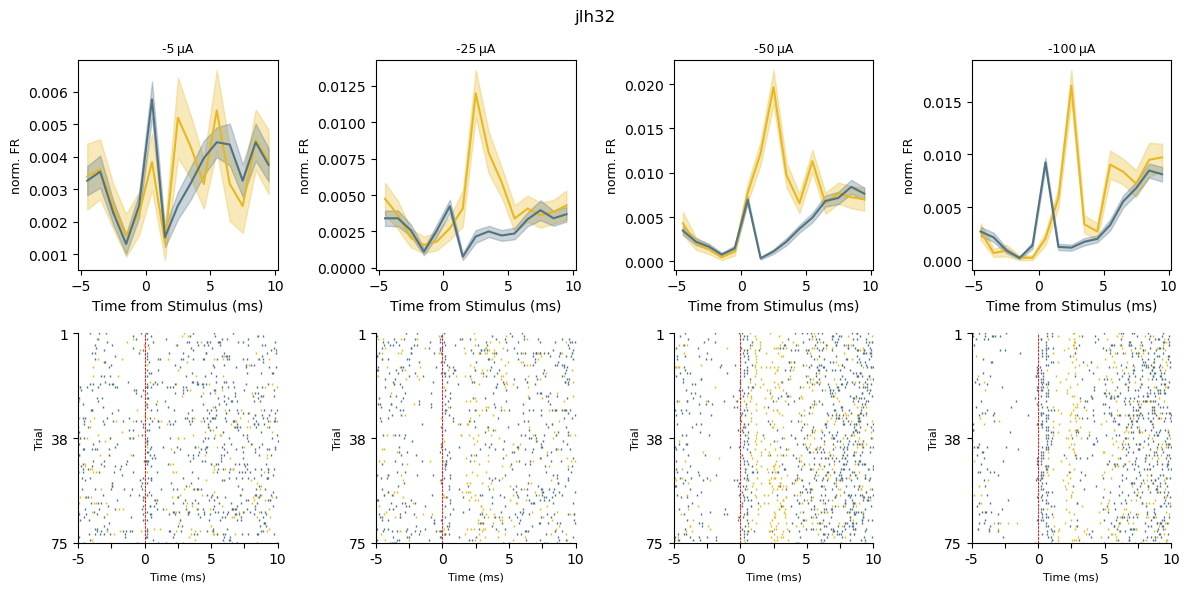

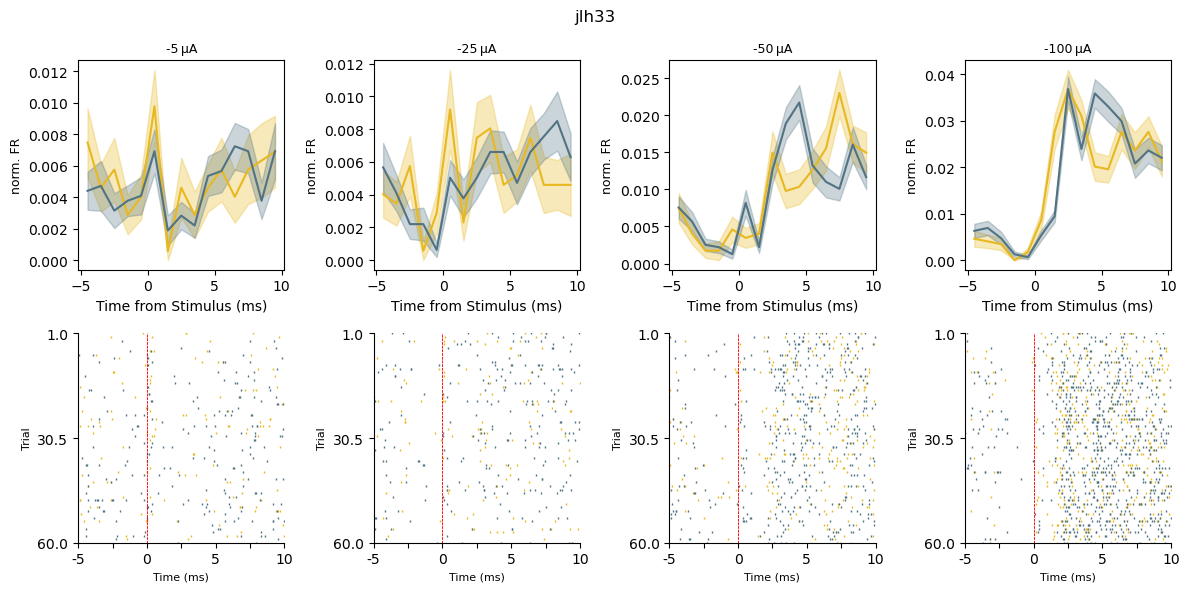

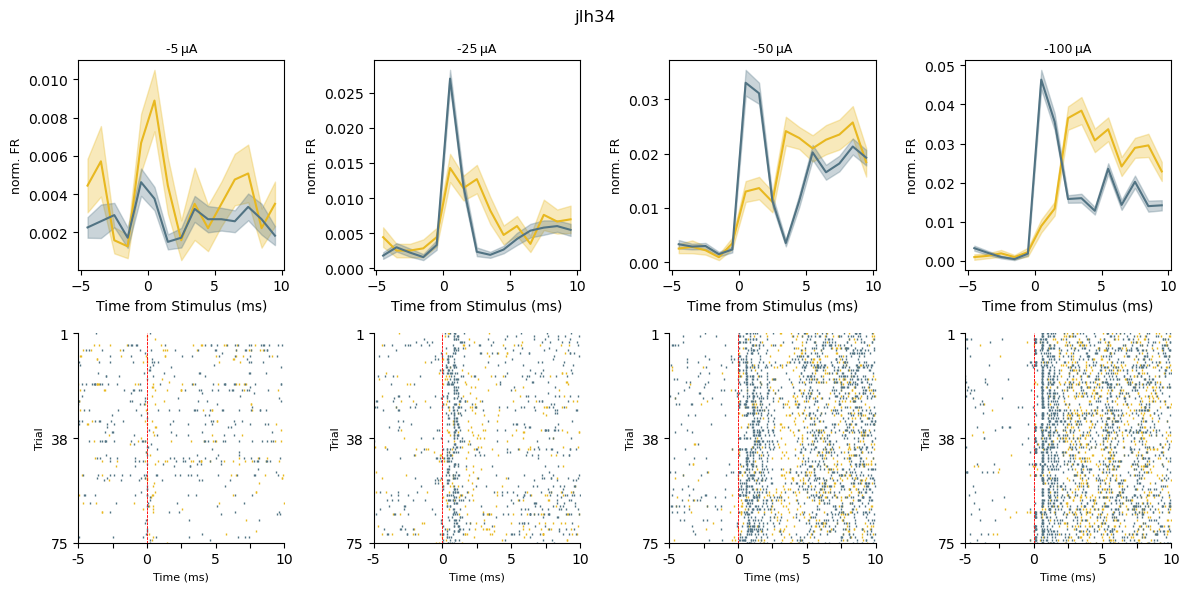

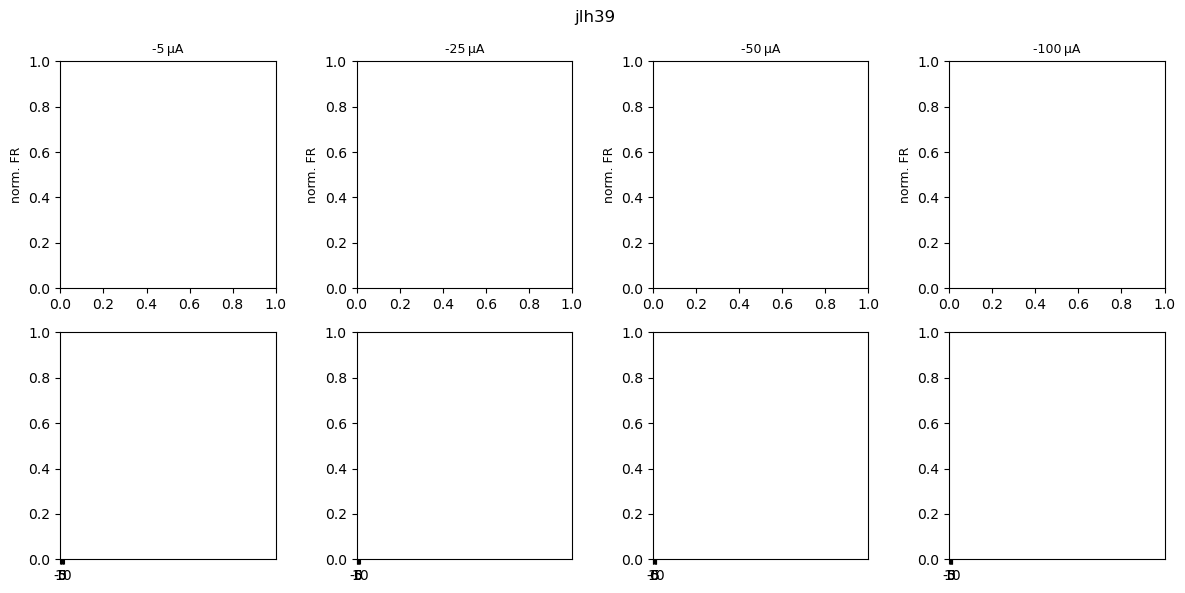

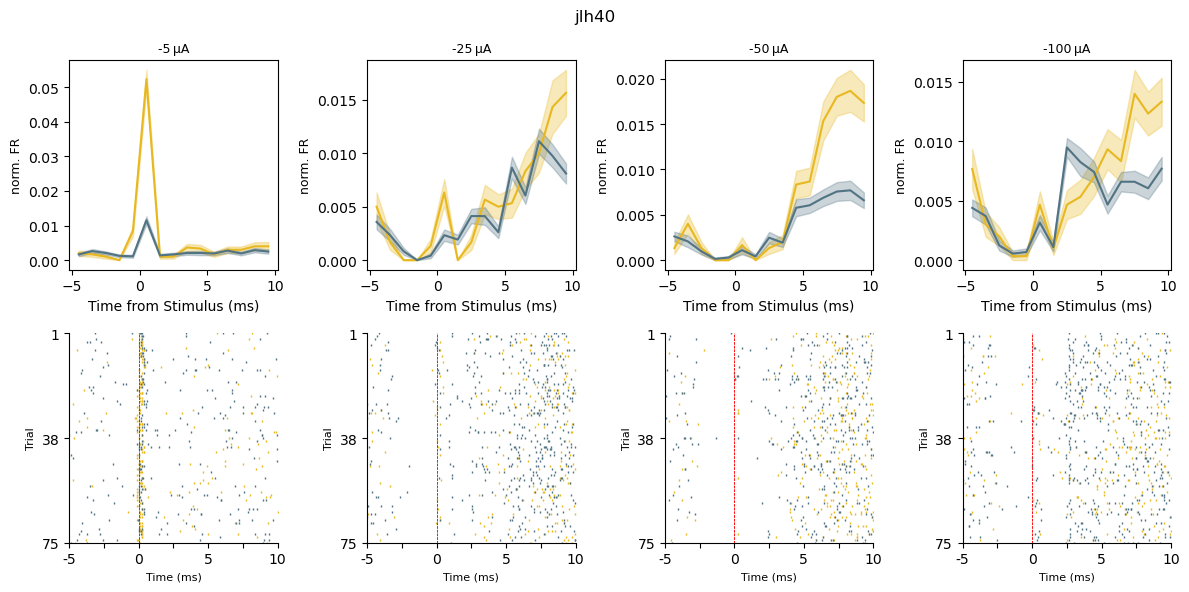

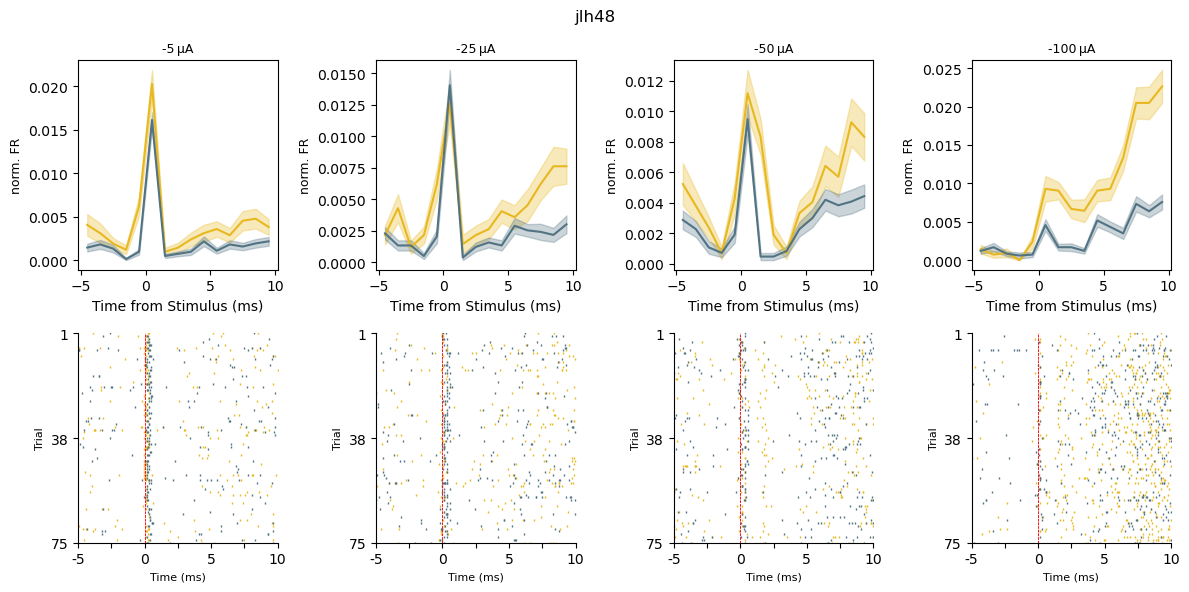

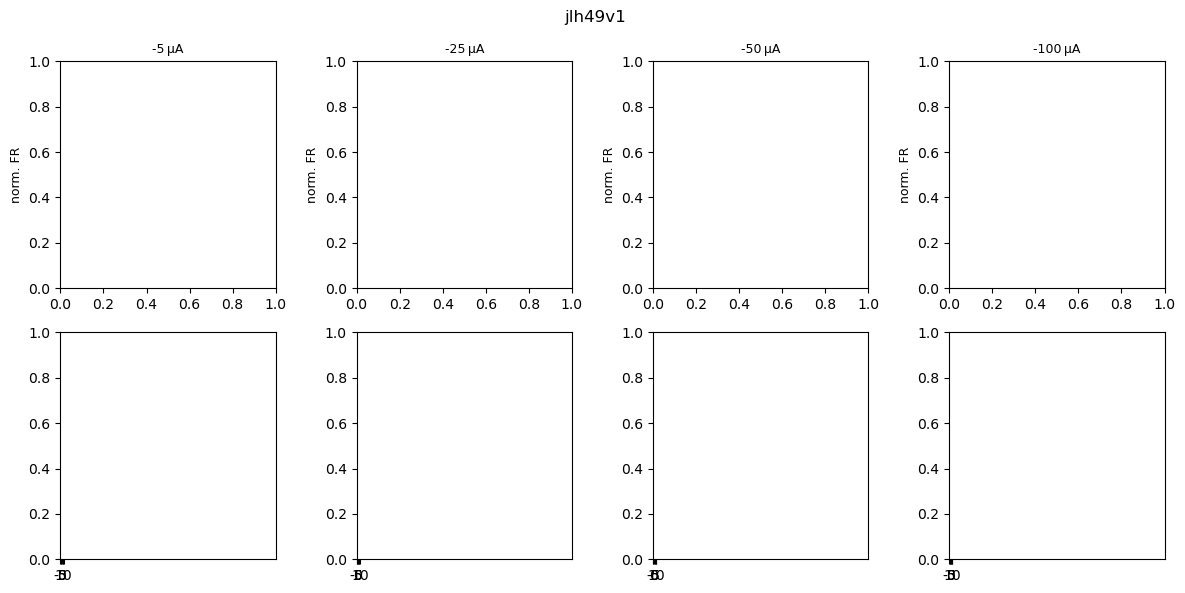

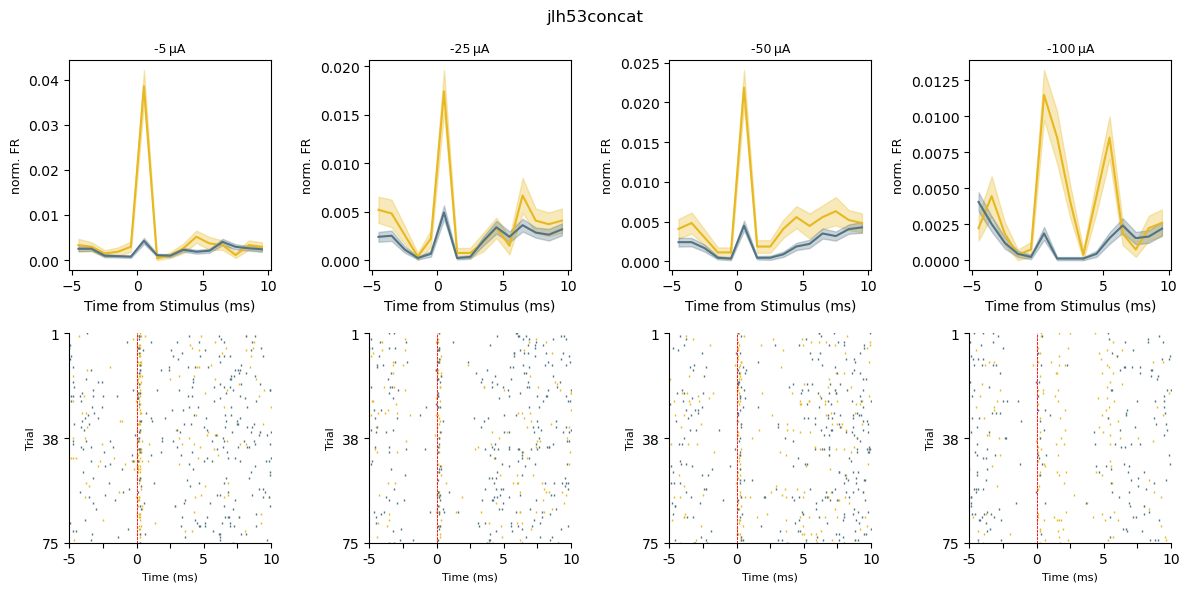

In [225]:
amps   = [-5, -25, -50, -100]              # monopolar cathodal amps
colors = {'fs': fs_color, 'rs': rs_color}  # your colour choices
pre, post, binsize = 0.005, 0.01, 0.001    # same window for all plots



all_psths_fs = {amp: [] for amp in amps}
all_vars_fs = {amp: [] for amp in amps}
all_psths_rs = {amp: [] for amp in amps}
all_vars_rs = {amp: [] for amp in amps}

for r in recordings:
    # collect cortical fs/rs spikes for this recording once
    m = r.units['brain_reg'].str.contains('area', case=False, na=False)
    cu = r.units[m & (r.units.group == 'good')]

    spikes = {
        'fs': np.sort(np.concatenate(
            cu.loc[cu.waveform_class == 'fs', 'spike_times'].values
        )),
        'rs': np.sort(np.concatenate(
            cu.loc[cu.waveform_class == 'rs', 'spike_times'].values
        ))
    }

    # figure for this recording
    fig, ax = plt.subplots(
        2, len(amps), figsize=(len(amps)*3, 6),
        sharex=False, sharey=False
    )

    for a_idx, amp in enumerate(amps):
        ax_psth  = ax[0, a_idx]
        ax_rast  = ax[1, a_idx]
        
        stim = choose_stim_parameter(r.trials, amp=amp, polarity='monopolar')[:75]
        for wf in ('fs', 'rs'):
            if wf == 'fs': 
                scale = len(cu.loc[cu.waveform_class == 'fs', 'spike_times'].values)
            else:
                scale = len(cu.loc[cu.waveform_class == 'rs', 'spike_times'].values)
            try:
                pstharr, variance, _ = psth(
                    spikes[wf], stim,
                    pre=-pre, post=post, bin_size=binsize,
                    color=colors[wf], var='sem',
                    scale = scale,
                    plot=False, plot_type='line', ax=ax_psth
                )
                psth(
                    spikes[wf], stim,
                    pre=-pre, post=post, bin_size=binsize,
                    color=colors[wf], var='sem',
                    scale = scale,
                    plot=True, plot_type='line', ax=ax_psth
                )
                raster(
                    spikes[wf], stim,
                    pre=pre, post=post,
                    labelsize=8, color=colors[wf],
                    axes=ax_rast, marker='|', marker_size=2
                )
                
                if wf == 'fs':
                    all_psths_fs[amp].append(pstharr)
                    all_vars_fs[amp].append(variance)
                else:
                    all_psths_rs[amp].append(pstharr)
                    all_vars_rs[amp].append(variance)
            except Exception as e:
                print(f"Error plotting PSTH/Raster for {r.mouse} {wf} at {amp} µA: {e}")
                continue
        # cleanup titles / ticks
        ax_psth.set_title(f'{amp} µA', fontsize=9)
        ax_rast.set_xticks(np.linspace(-pre, post, 7),
                           ['-5', '', '0', '', '5', '', '10'])
        if ax_psth.get_legend():
            ax_psth.get_legend().remove()
        ax_psth.set_ylabel('norm. FR', fontsize=9)

    fig.suptitle(f'{r.mouse}', fontsize=12)
    plt.tight_layout()
    plt.savefig(os.path.join(fs_rs_path, f'psth_raster_{r.mouse}.png'))
    plt.savefig(os.path.join(fs_rs_path, f'psth_raster_{r.mouse}.pdf'))
    

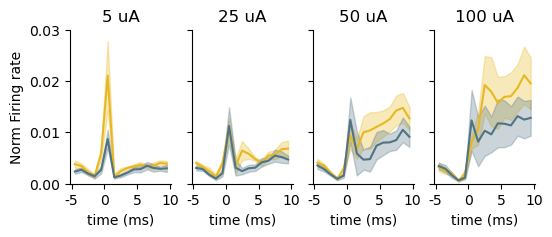

In [ ]:
pre, post, binsize = 0.005, 0.01, 0.001 
bins = np.arange(-pre, post + binsize, binsize)

fig, ax = plt.subplots(1,4, figsize = (6, 2), sharey = True)
for i, psth_arr in enumerate(all_psths_fs.values()):
    avg_psth = np.mean(psth_arr, axis =0)
    variance_psth = sem(psth_arr, axis=0)  # standard error of the mean
    plot_psth(avg_psth, variance_psth, bins[:-1] + binsize / 2, plot_type = 'line', color = fs_color, scale = 1, ax = ax[i])
    if i == 0:
        ax[i].set_ylabel('')
    else:
        ax[i].set_ylabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlabel('time (ms)')

for i, psth_arr in enumerate(all_psths_rs.values()):
    avg_psth = np.mean(psth_arr, axis =0)
    variance_psth = sem(psth_arr, axis=0)  # standard error of the mean
    plot_psth(avg_psth, variance_psth, bins[:-1] + binsize / 2, plot_type = 'line', color = rs_color, scale = 1, ax = ax[i])
    if i == 0:
        ax[i].set_ylabel('Norm Firing rate')
    else:
        ax[i].set_ylabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlabel('time (ms)')
    ax[i].set_xticks([-5, 0, 5, 10], ['-5', '0', '5', '10'])
    ax[i].set_ylim(0, 0.03)
    ax[i].set_yticks([0, 0.01, 0.02, 0.03])
    sns.despine(ax=ax[i], top=True, right=True)
    
ax[0].set_title('5 uA')
ax[1].set_title('25 uA')
ax[2].set_title('50 uA')
ax[3].set_title('100 uA')

fs_rs_path = r"C:\Users\jordan\Documents\combined_figs\single_unit\direct_response\2ms\fs_rs"

#plt.savefig(os.path.join(fs_rs_path, 'avg_psth_fs_rs.png')) 
#plt.savefig(os.path.join(fs_rs_path, 'avg_psth_fs_rs.pdf'))



In [323]:
fs_psths

[array([0.00195719, 0.00244648, 0.00195719, 0.00146789, 0.0106422 ,
        0.01382263, 0.00122324, 0.00220183, 0.00220183, 0.00207951,
        0.00220183, 0.00269113, 0.00281346, 0.00318043, 0.00232416]),
 array([0.00338983, 0.00361582, 0.00248588, 0.00158192, 0.00225989,
        0.00384181, 0.00135593, 0.00519774, 0.00429379, 0.00316384,
        0.00542373, 0.00316384, 0.00248588, 0.00451977, 0.00384181]),
 array([0.00747126, 0.0045977 , 0.00574713, 0.00287356, 0.00402299,
        0.00977011, 0.00057471, 0.0045977 , 0.00287356, 0.0045977 ,
        0.00574713, 0.00402299, 0.00574713, 0.00632184, 0.00689655]),
 array([0.00444444, 0.00571429, 0.0015873 , 0.00126984, 0.00666667,
        0.00888889, 0.00444444, 0.0015873 , 0.00349206, 0.00222222,
        0.00349206, 0.0047619 , 0.00507937, 0.00222222, 0.00349206]),
 array([0.002     , 0.00166667, 0.001     , 0.        , 0.00833333,
        0.05233333, 0.001     , 0.001     , 0.00366667, 0.00333333,
        0.00166667, 0.003     , 0.003   

In [324]:
all_psths_fs

{-5: [array([0.00195719, 0.00244648, 0.00195719, 0.00146789, 0.0106422 ,
         0.01382263, 0.00122324, 0.00220183, 0.00220183, 0.00207951,
         0.00220183, 0.00269113, 0.00281346, 0.00318043, 0.00232416]),
  array([0.00338983, 0.00361582, 0.00248588, 0.00158192, 0.00225989,
         0.00384181, 0.00135593, 0.00519774, 0.00429379, 0.00316384,
         0.00542373, 0.00316384, 0.00248588, 0.00451977, 0.00384181]),
  array([0.00747126, 0.0045977 , 0.00574713, 0.00287356, 0.00402299,
         0.00977011, 0.00057471, 0.0045977 , 0.00287356, 0.0045977 ,
         0.00574713, 0.00402299, 0.00574713, 0.00632184, 0.00689655]),
  array([0.00444444, 0.00571429, 0.0015873 , 0.00126984, 0.00666667,
         0.00888889, 0.00444444, 0.0015873 , 0.00349206, 0.00222222,
         0.00349206, 0.0047619 , 0.00507937, 0.00222222, 0.00349206]),
  array([0.002     , 0.00166667, 0.001     , 0.        , 0.00833333,
         0.05233333, 0.001     , 0.001     , 0.00366667, 0.00333333,
         0.00166667, 0

In [326]:
bins[-1]

np.float64(0.009999999999999998)

In [331]:
from scipy.stats import ks_2samp
from statsmodels.stats.multitest import multipletests
import numpy as np

alpha = 0.05
d_stats, p_vals, amps = [], [], []

# mask for 0‑10 ms (bins are in seconds here)
time_mask = (bins[:-1] >= 0) & (bins[:-1] < 0.010)

for amp in [-5, -25, -50, -100]:
    # --- stack lists into 2‑D arrays ---
    fs_arr = np.vstack(all_psths_fs[amp])   # shape: (n_units, n_bins)
    rs_arr = np.vstack(all_psths_rs[amp])

    fs_flat = fs_arr[:, time_mask].ravel()
    rs_flat = rs_arr[:, time_mask].ravel()

    d, p = ks_2samp(fs_flat, rs_flat, alternative='two-sided', mode='auto')
    d_stats.append(d); p_vals.append(p); amps.append(amp)

# Holm–Šidák correction
reject, p_adj, _, _ = multipletests(p_vals, method='holm-sidak')

for a, d, p_raw, p_corr, r in zip(amps, d_stats, p_vals, p_adj, reject):
    print(f"{a:>3} µA  KS D={d:.3f},  p_raw={p_raw:.4f},  p_adj={p_corr:.4f},  reject={r}")



 -5 µA  KS D=0.300,  p_raw=0.0035,  p_adj=0.0104,  reject=True
-25 µA  KS D=0.314,  p_raw=0.0019,  p_adj=0.0074,  reject=True
-50 µA  KS D=0.257,  p_raw=0.0192,  p_adj=0.0192,  reject=True
-100 µA  KS D=0.300,  p_raw=0.0035,  p_adj=0.0104,  reject=True


# Figure 5 specificity of e-stim parameters 

## Figure 5 b,c -- clustering responders by amplitude for cathodal polarity

In [28]:
cat_direct_df['unique_id'] = cat_direct_df['unit_id'] + '_' + cat_direct_df['recording']
# start with bipolar
cat_ids = cat_direct_df[cat_direct_df['norm_prob'] > 0.15].unique_id.unique()

C:\Users\jordan\AppData\Local\Temp\ipykernel_162228\1712914448.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_direct_df['unique_id'] = cat_direct_df['unit_id'] + '_' + cat_direct_df['recording']


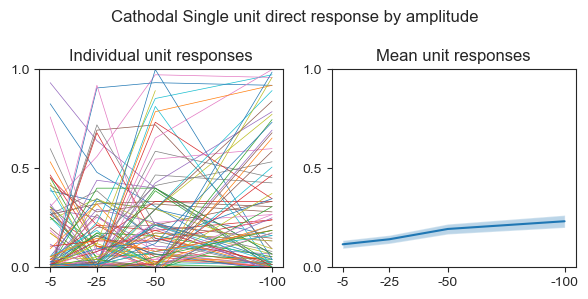

In [29]:
from scipy.stats import sem 
fig, ax = plt.subplots(1, 2, figsize = (6, 3))
ids = []
norm_probs = np.zeros((len(cat_ids), 4))
counter = 0
for i, id in enumerate(cat_ids):
    #print(bi_direct_df[bi_direct_df.unique_id == id].norm_prob.values)
    #print(bi_direct_df[bi_direct_df.unique_id == id].amplitude.values)
    norm_prob = cat_direct_df[cat_direct_df.unique_id == id].norm_prob.values
    ax[0].plot(np.abs(cat_direct_df[cat_direct_df.unique_id == id].amplitude.values), cat_direct_df[cat_direct_df.unique_id == id].norm_prob.values, lw = 0.5)
    if len(norm_prob) == 4:
       norm_probs[counter] = norm_prob
       ids.append(id)
       counter+=1
    else:
        norm_probs = np.delete(norm_probs, counter, axis=0)
    
mean_norm_probs = np.mean(norm_probs, axis = 0)
std_norm_probs = np.std(norm_probs, axis = 0)
sem_norm_probs = sem(norm_probs, axis = 0)

ax[1].plot(np.abs([-5,-25,-50,-100]), mean_norm_probs)
ax[1].fill_between(np.abs([-5,-25,-50,-100]), mean_norm_probs - sem_norm_probs, mean_norm_probs + sem_norm_probs, alpha = 0.3)
ax[1].set_ylim(0, 1)
ax[1].set_xticks([5, 25, 50, 100], ['-5', '-25', '-50', '-100'])
ax[0].set_ylim(0, 1)       
ax[0].set_xticks([5, 25, 50, 100], ['-5', '-25', '-50', '-100'])  
ax[0].set_yticks([0,  0.5, 1])
ax[1].set_yticks([0,  0.5, 1])

ax[0].set_title('Individual unit responses')
ax[1].set_title('Mean unit responses')

plt.suptitle('Cathodal Single unit direct response by amplitude')
plt.tight_layout()
#plt.savefig(r'C:\Users\jordan\Documents\combined_figs\single_unit\direct_response\2ms\cathodal_single_unit_response.png')
#plt.savefig(r'C:\Users\jordan\Documents\combined_figs\single_unit\direct_response\2ms\cathodal_single_unit_response.pdf')
    

C:\Users\jordan\AppData\Local\Temp\ipykernel_162228\1198775604.py:67: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<Figure size 354x354 with 0 Axes>

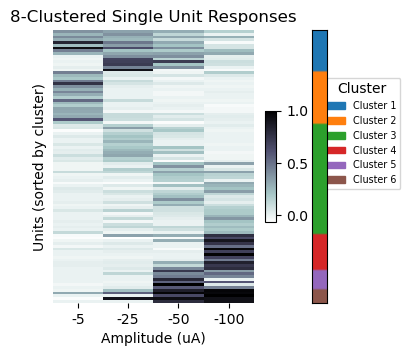

In [385]:
from scipy.cluster.hierarchy import linkage, fcluster

# hierarchical clustering
amplitudes = [-5, -25, -50, -100]  # Define your amplitudes
Z = linkage(norm_probs, method='ward')
num_clusters = 6
cluster_labels = fcluster(Z, num_clusters, criterion='maxclust')  # shape: (n_units,)

# sort data by cluster assignments ---
sort_idx = np.argsort(cluster_labels)
sorted_norm_probs = norm_probs[sort_idx]
sorted_ids = np.array(ids)[sort_idx] if ids is not None else None
sorted_cluster_labels = cluster_labels[sort_idx]

# heatmap with color bar for clusters
fig = plt.figure(figsize=(3.54, 3.54))

import matplotlib.patches as mpatches
import matplotlib.colors as mcolors

unique_clusters = np.unique(sorted_cluster_labels)
palette = sns.color_palette("tab10", n_colors=len(unique_clusters))
cluster2color = {k: palette[i] for i, k in enumerate(unique_clusters)}
cluster_colors = [cluster2color[k] for k in sorted_cluster_labels]

fig = plt.figure(figsize=(3.54, 3.54))
gs = fig.add_gridspec(1, 2, width_ratios=[15, 1], wspace=0.3)

# heatmap with colorbar at the bottom
ax0 = fig.add_subplot(gs[0])
hm = sns.heatmap(
    sorted_norm_probs,
    cmap='bone_r',
    xticklabels=amplitudes,
    yticklabels=False,
    cbar=True,
    cbar_ax=None,
    ax=ax0
)

# Get the image object and manually add colorbar
cbar = hm.collections[0].colorbar
cbar.remove()
cb = fig.colorbar(
    hm.collections[0],
    ax=ax0,
    orientation='vertical',
    pad=0.05,  # adjust for spacing
    fraction=0.05,
    aspect = 10
)
cb.set_label("Normalized Probability")

ax0.set_xlabel('Amplitude (uA)')
ax0.set_ylabel('Units (sorted by cluster)')
ax0.set_title('8-Clustered Single Unit Responses')

# cluster colorbar
ax1 = fig.add_subplot(gs[1])
ax1.imshow(np.array(cluster_colors).reshape(-1, 1, 3), aspect='auto')
ax1.set_xticks([])
ax1.set_yticks([])

handles = [mpatches.Patch(color=cluster2color[k], label=f'Cluster {k}') for k in unique_clusters]
ax0.legend(handles=handles, title='Cluster', bbox_to_anchor=(1.1, 1), loc='upper left', borderaxespad=5, fontsize='x-small')

plt.tight_layout()
#plt.savefig(r'C:\Users\jordan\Documents\combined_figs\single_unit\direct_response\cathodal_clustered_heatmap_boneheatmap_6clusts.png')
#plt.savefig(r'C:\Users\jordan\Documents\combined_figs\single_unit\direct_response\cathodal_clustered_heatmap_boneheatmap_6clusts.pdf')

cophenetic correlation coefficient: 0.702
silhouette score: 0.352
within-cluster sum of squares: 6.74
cluster sizes: {np.int32(1): np.int64(15), np.int32(2): np.int64(19), np.int32(3): np.int64(40), np.int32(4): np.int64(13), np.int32(5): np.int64(7), np.int32(6): np.int64(5)}


([<matplotlib.axis.YTick at 0x27229e42f90>,
 [Text(0, 0.0, '0.0'), Text(0, 0.5, '0.5'), Text(0, 1.0, '1.0')])

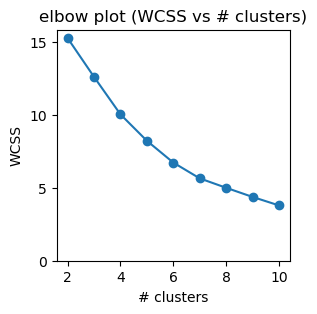

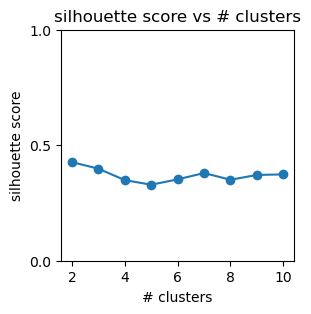

In [391]:
from scipy.cluster.hierarchy import dendrogram, cophenet
from scipy.spatial.distance import pdist
from sklearn.metrics import silhouette_score

# compute cophenetic correlation
c, coph_dists = cophenet(Z, pdist(norm_probs))
print(f"cophenetic correlation coefficient: {c:.3f}")

# silhouette score
sil_score = silhouette_score(norm_probs, cluster_labels)
print(f"silhouette score: {sil_score:.3f}")

# within-cluster sum of squares (WCSS)
def compute_wcss(X, labels):
    wcss = 0
    for clust in np.unique(labels):
        cluster_points = X[labels == clust]
        centroid = cluster_points.mean(axis=0)
        wcss += ((cluster_points - centroid)**2).sum()
    return wcss

wcss_val = compute_wcss(norm_probs, cluster_labels)
print(f"within-cluster sum of squares: {wcss_val:.2f}")

# cluster size distribution
unique, counts = np.unique(cluster_labels, return_counts=True)
print("cluster sizes:", dict(zip(unique, counts)))


# elbow plot: test different cluster numbers
max_clusters = 10
wcss_list = []
silhouette_list = []
for k in range(2, max_clusters+1):
    labels_k = fcluster(Z, k, criterion='maxclust')
    wcss_list.append(compute_wcss(norm_probs, labels_k))
    sil = silhouette_score(norm_probs, labels_k)
    silhouette_list.append(sil)

plt.figure(figsize=(3,3))
plt.plot(range(2, max_clusters+1), wcss_list, marker='o')
plt.title("elbow plot (WCSS vs # clusters)")
plt.xlabel("# clusters")
plt.ylabel("WCSS")
plt.yticks([0, 5, 10, 15])
#save_path = r'C:\Users\jordan\Documents\combined_figs\single_unit\direct_response\2ms\clustering'
#os.makedirs(save_path, exist_ok=True)
#plt.savefig(os.path.join(save_path, 'elbow_plot_wcss_ampclustering.png'))
#plt.savefig(os.path.join(save_path, 'elbow_plot_wcss_ampclustering.pdf'))

plt.figure(figsize=(3,3))
plt.plot(range(2, max_clusters+1), silhouette_list, marker='o')
plt.title("silhouette score vs # clusters")
plt.xlabel("# clusters")
plt.ylabel("silhouette score")
plt.yticks([0., 0.5, 1])
#plt.savefig(os.path.join(save_path, 'elbow_plot_silhouette_ampclustering.png'))
#plt.savefig(os.path.join(save_path, 'elbow_plot_silhouette_ampclustering.pdf'))



cluster 1 (n=15):
  amplitude -5: 0.270 ± 0.291
  amplitude -25: 0.474 ± 0.201
  amplitude -50: 0.276 ± 0.168
  amplitude -100: 0.088 ± 0.107

cluster 2 (n=19):
  amplitude -5: 0.350 ± 0.153
  amplitude -25: 0.034 ± 0.047
  amplitude -50: 0.006 ± 0.037
  amplitude -100: 0.008 ± 0.043

cluster 3 (n=40):
  amplitude -5: 0.016 ± 0.035
  amplitude -25: 0.100 ± 0.105
  amplitude -50: 0.120 ± 0.113
  amplitude -100: 0.117 ± 0.124

cluster 4 (n=13):
  amplitude -5: -0.004 ± 0.026
  amplitude -25: 0.034 ± 0.091
  amplitude -50: 0.106 ± 0.155
  amplitude -100: 0.748 ± 0.149

cluster 5 (n=7):
  amplitude -5: -0.004 ± 0.009
  amplitude -25: 0.021 ± 0.047
  amplitude -50: 0.651 ± 0.193
  amplitude -100: 0.343 ± 0.217

cluster 6 (n=5):
  amplitude -5: 0.048 ± 0.131
  amplitude -25: 0.339 ± 0.350
  amplitude -50: 0.840 ± 0.113
  amplitude -100: 0.955 ± 0.031


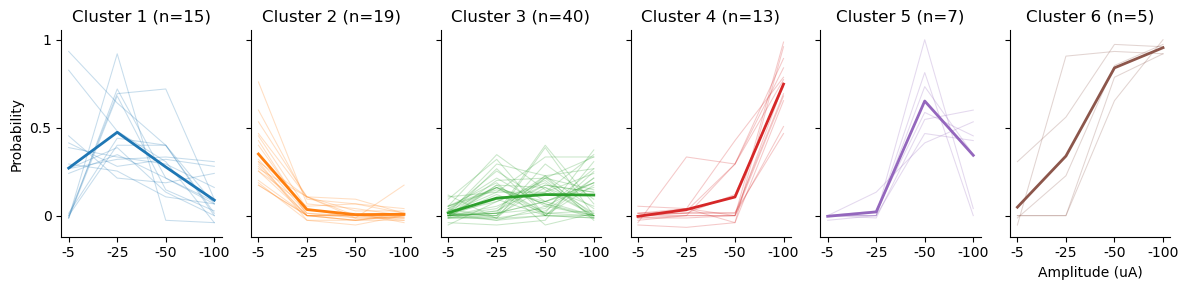

In [387]:
x = np.arange(len(amplitudes))
num_clusters = len(unique_clusters)

fig, axes = plt.subplots(
    nrows=1, ncols=num_clusters,
    figsize=(2 * num_clusters, 3),
    sharey=True
)

if num_clusters == 1:
    axes = [axes]

for i, k in enumerate(unique_clusters):
    ax = axes[i]
    idx = np.where(sorted_cluster_labels == k)[0]
    if len(idx) == 0:
        continue
    # plot individual unit responses
    for row in sorted_norm_probs[idx]:
        ax.plot(x, row, color=cluster2color[k], alpha=0.25, lw=0.75, zorder=1)

    # plot cluster mean
    cluster_data = sorted_norm_probs[idx]
    mean_response = cluster_data.mean(axis=0)
    std_response = cluster_data.std(axis=0)

    ax.plot(x, mean_response, color=cluster2color[k], lw=2, label=f'Cluster {k}', zorder=2)
    ax.set_title(f'Cluster {k} (n={len(idx)})')
    ax.set_xticks(x)
    ax.set_xticklabels(amplitudes)
    ax.set_yticks([0, 0.5, 1], labels=[])

    # print mean ± std for each amplitude
    print(f"\ncluster {k} (n={len(idx)}):")
    for amp, mean_val, std_val in zip(amplitudes, mean_response, std_response):
        print(f"  amplitude {amp}: {mean_val:.3f} ± {std_val:.3f}")

axes[0].set_yticks([0, 0.5, 1], labels=['0', '0.5', '1'])
axes[0].set_ylabel('Probability')
axes[-1].set_xlabel('Amplitude (uA)')


for ax in axes:
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

plt.tight_layout()
#plt.savefig(r'C:\Users\jordan\Documents\combined_figs\single_unit\direct_response\cathodal_clustered_lineplots_6clusts.png')
#plt.savefig(r'C:\Users\jordan\Documents\combined_figs\single_unit\direct_response\cathodal_clustered_lineplots_6clusts.pdf')

In [390]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

for i, k in enumerate(unique_clusters):
    idx = np.where(sorted_cluster_labels == k)[0]
    if len(idx) == 0:
        print(f"\ncluster {k}: no data, skipping.")
        continue

    cluster_data = sorted_norm_probs[idx]

    # build long dataframe: one row per unit × amplitude
    df = pd.DataFrame(cluster_data, columns=amplitudes)
    df_long = df.melt(var_name='amplitude', value_name='norm_prob')
    df_long['amplitude'] = df_long['amplitude'].astype(float)

    print(f"\n cluster {k} (n={len(idx)}) ---")

    # one-way anova with amplitude as continuous
    model = ols('norm_prob ~ amplitude', data=df_long).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)

    # pretty format
    anova_fmt = anova_table.copy()
    anova_fmt['F'] = anova_fmt['F'].map(lambda x: f"{x:.3f}" if pd.notnull(x) else "")
    anova_fmt['PR(>F)'] = anova_fmt['PR(>F)'].map(lambda x: f"{x:.4f}" if pd.notnull(x) else "")
    print(anova_fmt.to_string())

    # tukey HSD with amplitude as categorical
    df_long['amp_cat'] = df_long['amplitude'].astype('category')
    tukey = pairwise_tukeyhsd(endog=df_long['norm_prob'],
                              groups=df_long['amp_cat'],
                              alpha=0.05)

    print("\ntukey HSD results:")
    print(tukey.summary())



 cluster 1 (n=15) ---
             sum_sq    df       F  PR(>F)
amplitude  0.587365   1.0  11.347  0.0013
Residual   3.002357  58.0                

tukey HSD results:
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
-100.0  -50.0   0.1884 0.0783 -0.0147  0.3916  False
-100.0  -25.0   0.3858    0.0  0.1826  0.5889   True
-100.0   -5.0   0.1822 0.0938 -0.0209  0.3854  False
 -50.0  -25.0   0.1973 0.0599 -0.0058  0.4005  False
 -50.0   -5.0  -0.0062 0.9998 -0.2094  0.1969  False
 -25.0   -5.0  -0.2036 0.0494 -0.4067 -0.0004   True
----------------------------------------------------

 cluster 2 (n=19) ---
             sum_sq    df       F  PR(>F)
amplitude  0.763151   1.0  40.652  0.0000
Residual   1.389183  74.0                

tukey HSD results:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
----------------------------

## Figure 6 e, f -- clustering direct response by polarity specificity 

In [377]:
direct_df['unique_id'] = direct_df['unit_id'] + '_' + direct_df['recording']
# start with bipolar
ids = direct_df[direct_df['norm_prob'] > 0.15].unique_id.unique()

direct_df_resp = direct_df[direct_df['unique_id'].isin(ids)].copy()

pivot_df = (
    direct_df_resp
    .pivot_table(index='unique_id',
                 columns=['polarity', 'amplitude'],
                 values='norm_prob',
                 aggfunc='mean')            # multiple repeats → average
    .sort_index(axis=1, level=[0, 1])       # tidy ordering
)

# average (or max, or area‑under‑curve) across amplitudes
pol_feat = (
    direct_df_resp
    .groupby(['unique_id', 'polarity'])['norm_prob']
    .max()                          # or .max()
    .unstack(fill_value=0.)          # → unique_id × polarity
)

# normalise each unit so shape, not magnitude, drives clustering
pol_feat = pol_feat.div(pol_feat.max(axis=1), axis=0).fillna(0.0)

#from sklearn.cluster import AgglomerativeClustering
#X = pol_feat.values
#k = 6                           
#labels = AgglomerativeClustering(n_clusters=k, linkage='ward').fit_predict(X)
#pol_feat['cluster'] = labels


# uses same method as Figure 5b, but both very similar
from scipy.cluster.hierarchy import linkage, fcluster

X = pol_feat.values  
k = 6  
Z = linkage(X, method='ward')
labels = fcluster(Z, k, criterion='maxclust')
# assign to your dataframe
pol_feat['cluster'] = labels


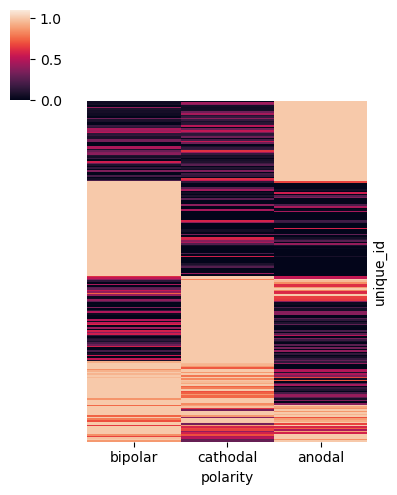

In [378]:
#e‑order the rows by cluster label
ordered_idx = (
    pol_feat                      # (unique_id × polarity)
    .sort_values('cluster')      
    .index                        
)

plot_df = pol_feat.loc[ordered_idx, ['bipolar', 'cathodal', 'anodal']]


sns.clustermap(
    plot_df,                      
    row_cluster=False,            # custom order based on previous clustering
    col_cluster=False,            
    cmap='rocket',
    yticklabels=False,
    vmin=0, vmax=1.1,
    figsize = (4, 5)

)
save_path = r'C:\Users\jordan\Documents\combined_figs\single_unit\direct_response\2ms\polarity_clusters'
if not os.path.exists(save_path):
    os.makedirs(save_path)
#plt.savefig(os.path.join(save_path, 'polarity_clusters_heatmap.png'))
#plt.savefig(os.path.join(save_path, 'polarity_clusters_heatmap.pdf'))

cophenetic correlation coefficient: 0.806
silhouette score (k=6): 0.519


([<matplotlib.axis.YTick at 0x27229df67d0>,
 [Text(0, 0.0, '0.0'), Text(0, 0.5, '0.5'), Text(0, 1.0, '1.0')])

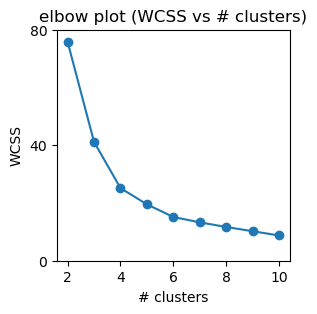

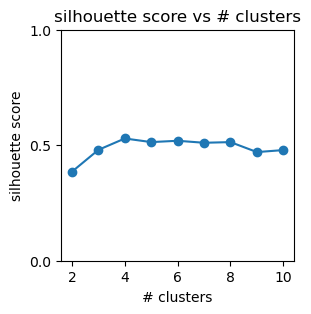

In [379]:
# cophenetic correlation
c, _ = cophenet(Z, pdist(X))
print(f"cophenetic correlation coefficient: {c:.3f}")

# silhouette score for chosen k
sil_score = silhouette_score(X, labels)
print(f"silhouette score (k={k}): {sil_score:.3f}")

# WCSS function
def compute_wcss(X, labels):
    wcss = 0
    for clust in np.unique(labels):
        cluster_points = X[labels == clust]
        centroid = cluster_points.mean(axis=0)
        wcss += ((cluster_points - centroid) ** 2).sum()
    return wcss

# WCSS + silhouette across different k
wcss_list, sil_list = [], []
ks = range(2, max_clusters + 1)
for num in ks:
    clust_labels = fcluster(Z, num, criterion='maxclust')
    wcss_list.append(compute_wcss(X, clust_labels))
    sil_list.append(silhouette_score(X, clust_labels))

# elbow plot (WCSS vs k)
plt.figure(figsize=(3, 3))
plt.plot(ks, wcss_list, marker='o')
plt.title("elbow plot (WCSS vs # clusters)")
plt.xlabel("# clusters")
plt.ylabel("WCSS")
plt.yticks([0, 40, 80])
#plt.savefig(os.path.join(save_path, 'elbow_plot_wcss_polclustering.png'))
#plt.savefig(os.path.join(save_path, 'elbow_plot_wcss_polclustering.pdf'))

# silhouette plot (silhouette vs k)
plt.figure(figsize=(3, 3))
plt.plot(ks, sil_list, marker='o')
plt.title("silhouette score vs # clusters")
plt.xlabel("# clusters")
plt.ylabel("silhouette score")
plt.yticks([0, 0.5, 1])
#plt.savefig(os.path.join(save_path, 'silhouette_polclustering.png'))
#plt.savefig(os.path.join(save_path, 'silhouette_polclustering.pdf'))



cluster 1 (n=52):
  bipolar  amp   5 µA: 0.019 ± 0.005
  bipolar  amp  25 µA: 0.021 ± 0.007
  bipolar  amp  50 µA: 0.015 ± 0.005
  bipolar  amp 100 µA: 0.012 ± 0.005
  cathodal amp   5 µA: 0.019 ± 0.005
  cathodal amp  25 µA: 0.022 ± 0.005
  cathodal amp  50 µA: 0.029 ± 0.012
  cathodal amp 100 µA: 0.021 ± 0.007
  anodal   amp   5 µA: 0.135 ± 0.025
  anodal   amp  25 µA: 0.115 ± 0.017
  anodal   amp  50 µA: 0.142 ± 0.023
  anodal   amp 100 µA: 0.133 ± 0.023

cluster 2 (n=61):
  bipolar  amp   5 µA: 0.152 ± 0.029
  bipolar  amp  25 µA: 0.123 ± 0.017
  bipolar  amp  50 µA: 0.129 ± 0.021
  bipolar  amp 100 µA: 0.137 ± 0.024
  cathodal amp   5 µA: 0.015 ± 0.009
  cathodal amp  25 µA: 0.021 ± 0.010
  cathodal amp  50 µA: 0.018 ± 0.009
  cathodal amp 100 µA: 0.034 ± 0.013
  anodal   amp   5 µA: 0.015 ± 0.005
  anodal   amp  25 µA: 0.010 ± 0.009
  anodal   amp  50 µA: -0.003 ± 0.007
  anodal   amp 100 µA: 0.005 ± 0.005

cluster 3 (n=16):
  bipolar  amp   5 µA: 0.018 ± 0.015
  bipolar  amp  2

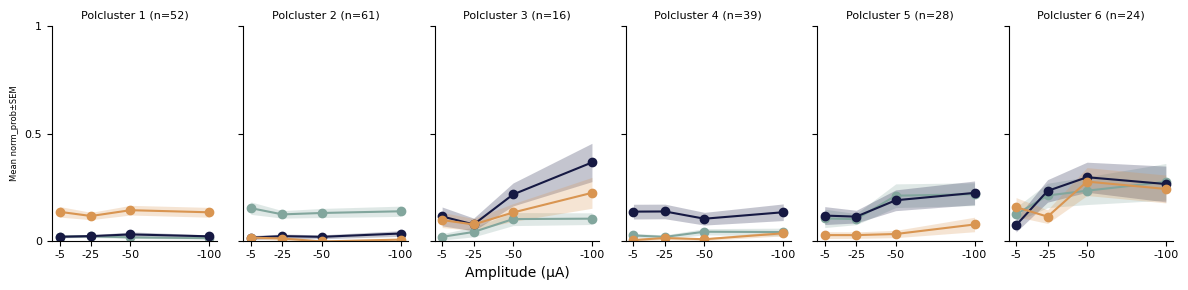

In [381]:
colors = {'bipolar': '#82A69D',
          'cathodal': '#161943',
          'anodal'  : '#D99551'}


fig, axes = plt.subplots(1, 6, figsize=(12, 3), sharex=True, sharey=True)

for c in np.sort(pol_feat['cluster'].unique()):
    ax = axes[c-1]

    units = pol_feat.index[pol_feat['cluster'] == c]
    sub   = direct_df[direct_df['unique_id'].isin(units)].copy()

    sub['abs_amp'] = sub['amplitude'].abs()              # positive x‑axis

    # mean and SEM of norm_prob
    g = sub.groupby(['abs_amp', 'polarity'])['norm_prob']
    mean_df = g.mean().unstack('polarity').sort_index()  # ascending amp
    sem_df  = g.sem().unstack('polarity').reindex(mean_df.index)

    print(f"\ncluster {c} (n={len(units)}):")
    for pol in ['bipolar', 'cathodal', 'anodal']:
        if pol in mean_df.columns:
            for amp, mean_val, sem_val in zip(mean_df.index,mean_df[pol],sem_df[pol]):
                print(f"  {pol:8s} amp {amp:3d} µA: {mean_val:.3f} ± {sem_val:.3f}")
            
            x = mean_df.index
            y = mean_df[pol]
            e = sem_df[pol]

            ax.plot(x, y, lw=1.5, marker='o', color=colors[pol], label=pol)
            ax.fill_between(x, y - e, y + e,
                            color=colors[pol], alpha=0.25, linewidth=0)

    axes[2].set_xlabel('Amplitude (µA)')
    axes[0].set_ylabel('Mean norm_prob±SEM', fontsize = 6)
    ax.set_title(f'Polcluster {c} (n={len(units)})', fontsize = 8)
    ax.set_ylim(0, 1)
    ax.set_yticks([0, 0.5, 1], ['0', '0.5', '1'], fontsize = 8)
    ax.set_xticks([5, 25, 50, 100], ['-5', '-25', '-50', '-100'], fontsize = 8)
    # ax.legend(frameon=False)          # uncomment if you want the legend
    sns.despine(ax=ax, top=True, right=True)  
plt.tight_layout()
save_path = r'C:\Users\jordan\Documents\combined_figs\single_unit\direct_response\2ms\polarity_clusters'
if not os.path.exists(save_path):
    os.makedirs(save_path)
#plt.savefig(os.path.join(save_path, 'polarity_clusters_mean_norm_prob.png'))
#plt.savefig(os.path.join(save_path, 'polarity_clusters_mean_norm_prob.pdf'))

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# loop over clusters and run two-way ANOVA
for c in np.sort(pol_feat['cluster'].unique()):
    units = pol_feat.index[pol_feat['cluster'] == c]
    sub   = direct_df[direct_df['unique_id'].isin(units)].copy()

    sub['abs_amp'] = sub['amplitude'].abs().astype(float)
    sub['polarity'] = sub['polarity'].astype('category')

    if sub.empty:
        print(f"\ncluster {c}: no data, skipping.")
        continue

    print(f"\n cluster {c} (n={len(units)}) ---")

    model = ols('norm_prob ~ abs_amp * C(polarity)', data=sub).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)

    # format p-values and F values nicely
    anova_fmt = anova_table.copy()
    anova_fmt['F'] = anova_fmt['F'].map(lambda x: f"{x:.3f}" if pd.notnull(x) else "")
    anova_fmt['PR(>F)'] = anova_fmt['PR(>F)'].map(lambda x: f"{x:.4f}" if pd.notnull(x) else "")

    print(anova_fmt.to_string())



 cluster 1 (n=52) ---
                       sum_sq     df       F  PR(>F)
C(polarity)          1.667358    2.0  86.523  0.0000
abs_amp              0.000002    1.0   0.000  0.9878
abs_amp:C(polarity)  0.003005    2.0   0.156  0.8557
Residual             5.771579  599.0                

 cluster 2 (n=61) ---
                       sum_sq     df       F  PR(>F)
C(polarity)          1.858678    2.0  54.750  0.0000
abs_amp              0.000060    1.0   0.004  0.9528
abs_amp:C(polarity)  0.008787    2.0   0.259  0.7721
Residual             8.487166  500.0                

 cluster 3 (n=16) ---
                       sum_sq     df       F  PR(>F)
C(polarity)          0.480184    2.0   7.147  0.0010
abs_amp              0.785867    1.0  23.395  0.0000
abs_amp:C(polarity)  0.177089    2.0   2.636  0.0744
Residual             5.979213  178.0                

 cluster 4 (n=39) ---
                       sum_sq     df       F  PR(>F)
C(polarity)          1.088412    2.0  28.700  0.0000
abs_amp